<h1><center>Final Assignment - ML <br>
            Narendra Parigi <br>
            HR Analytics <br>
            12089265 <br>
</center></h1>

Executives would like to see companies doing well with most of them search for metrics to quantify with work towards the target. For decades, the Department of Human Resources assumed that their position in the enterprise was significant, but there has also been doubting among directors as to whether or not to devote funds to human resources. HR Analytics deals with the study of personnel and the application of the systematic method to human capital in the business to improve employee engagement and retention. Considerable research has been done in this field and has shown that human capital is the company's largest asset and that the retention of human capital is very important. But, the biggest challenge to the human resource department is the employee attrition. The following are the biggest challenges organizations facing due to attrition.

- Loss of domain knowledge and experience when an employee leaves the company.
- Expensive to train new employees
- Time-consuming to gain knowledge and to be productive for new employees.
- Slows down the project progress and impacts financially.

Here in this exercise, we will try to answer the following questions using the synthetic dataset created by IBM data scientist.

- What factors influence the employees to leave the company?
- Which departments have the most attrition?
- What kind of suggestions we can provide based on the model and learned characteristics?
- Does the model bring value to the company?
- Does the company able to save money using the model and by how much?

#### <a> 1.Import Libraries </a>

Let us import the important and required models.

In [1]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as patches

from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples
from sklearn.metrics import classification_report


pd.options.display.max_columns = None
%matplotlib inline
warnings.filterwarnings('ignore')

Using TensorFlow backend.


#### <a> 2.Data Loading </a>

The HR dataset is loaded into pandas dataframe. Created a new variable "Label" based on the feature "Attrition".

In [2]:
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_hr['Label'] = df_hr['Attrition'].replace(to_replace=['Yes','No'], value=[1,0])
print('The size of the dataframe: {}'.format(df_hr.shape[0]))
print('\nThe following are the samples from data set:')
df_hr.head(5)

The size of the dataframe: 1470

The following are the samples from data set:


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Label  
0                        0                     5      1  
1                        1                     7      0  
2                        0                     0      1  
3                        3                     0      0  
4                        2                     2      0

There multiple features available describing the characteristics of an employee with attrition and no attrition. The features are briefly described in the following table.

| Feature      | Description |
| ----------- | ----------- |
|  Age      | Age of an employee.       |
| Attrition   | “Yes” in case of attrition or “No” in case of no attrition.        |
| BusinessTravel   | Travel information.        |
| DailyRate   | Daily rate of an employee.        |
| Department   | Department where the employee is working.        |
| DistanceFromHome      | Distance from home.       |
| Education   | 1-5, higher the rating then higher the education level.        |
| EducationField   | Employees’ study field.        |
| EmployeeCount   | always “1”.        |
| EmployeeNumber   | 1-4, higher the rating then higher the environment satisfaction.        |
| EnvironmentSatisfaction      | 1-4, higher the rating then higher the environment satisfaction.       |
| Gender   | Gender of an employee.       |
| HourlyRate   | Hourly rate of an employee.        |
| JobInvolvement   | 1-4, higher the rating then higher the job involvement.        |
| JobLevel   | 1-5, higher the rating then higher the job level.        |
| JobRole      | Role of an employee.       |
| JobSatisfaction   | 1-4, higher the rating then higher the job satisfaction.        |
| MaritalStatus   | Marital status of an employee.        |
| MonthlyIncome   | Monthly income of an employee.        |
| MonthlyRate   | Monthly rate of an employee but is higher than monthly income, it does not make sense.       |
| NumCompaniesWorked      | Number of companies in which employee worked.       |
| Over18   | “Y” if an employee is over 18 else “N”.        |
| OverTime   | “Yes” if an employee is working overtime else “No”        |
| PercentSalaryHike   | Salary hike compare to previous year.       |
| PerformanceRating   | Performance rating in the previous year.        |
| RelationshipSatisfaction      | 1-4, higher the rating then higher the relationship satisfaction.       |
| StandardHours   | Number of hours an employee works.        |
| StockOptionLevel   | 1 if employee holds stocks else 0.        |
| TotalWorkingYears   | Total experience of an employee.       |
| TrainingTimesLastYear   | Number of times an employee trained last year.        |
| WorkLifeBalance      | 1-4, higher the rating then higher the work life balance.       |
| YearsAtCompany   | Number of years an employee stayed at work.        |
| YearsInCurrentRole   | Number of years an employee stayed in current level.        |
| YearsSinceLastPromotion   | Number of years since the last promotion.        |
| YearsWithCurrManager   | Number of years with current manager.        |

#### <a> 2.Exploratory Data Analysis </a>

Let us perform the exploratory data analysis to understand what factors influence the employees to quit the organizations.

#### <a> 2.1 Check For Null/NaN Values </a>

Verify if any of the columns have null values so, we can impute the data using different methods.

In [3]:
print('The number of NaN value in data set: ', df_hr.isna().sum().sum())
print('The list of columns in the data set with NaN values: {}'.format(list(df_hr.columns[df_hr.isna().any()])))

The number of NaN value in data set:  0
The list of columns in the data set with NaN values: []


#### <a> 2.2 Explore Categorical Features </a>

Let us plot the distribution of categorical columns in the data set.

In [4]:
cat_features = df_hr.columns[df_hr.dtypes=='object']
print('The list of categorical columns in the data set:\n{}'.format(list(cat_features)))

The list of categorical columns in the data set:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [5]:
def plot_categorical_col_dis(df, column):
    """ plot column distribution """
    plt.figure(figsize=(15, 8))
    ax = df[column].value_counts().plot(kind='bar', fontsize=12)
    ax.set_title("Distribution of {}".format(column), fontsize=12)
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height(), str(round((i.get_height()/total)*100,2))+'%', fontsize=12, color='black')

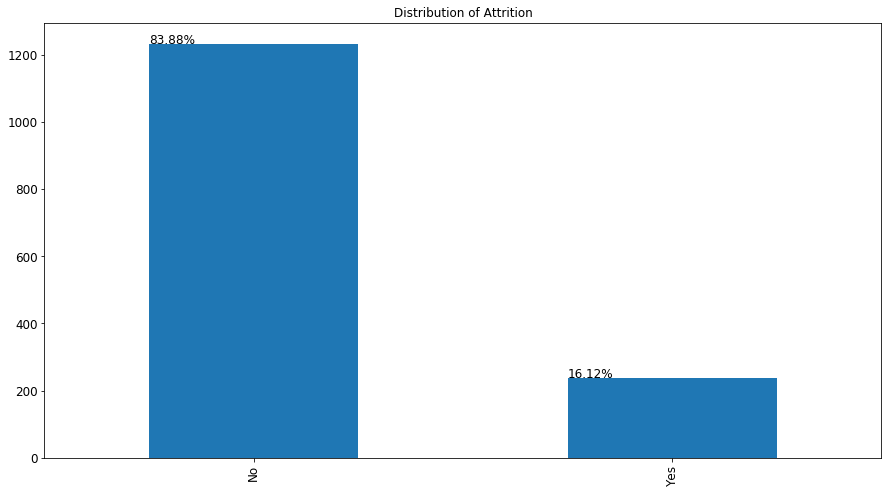

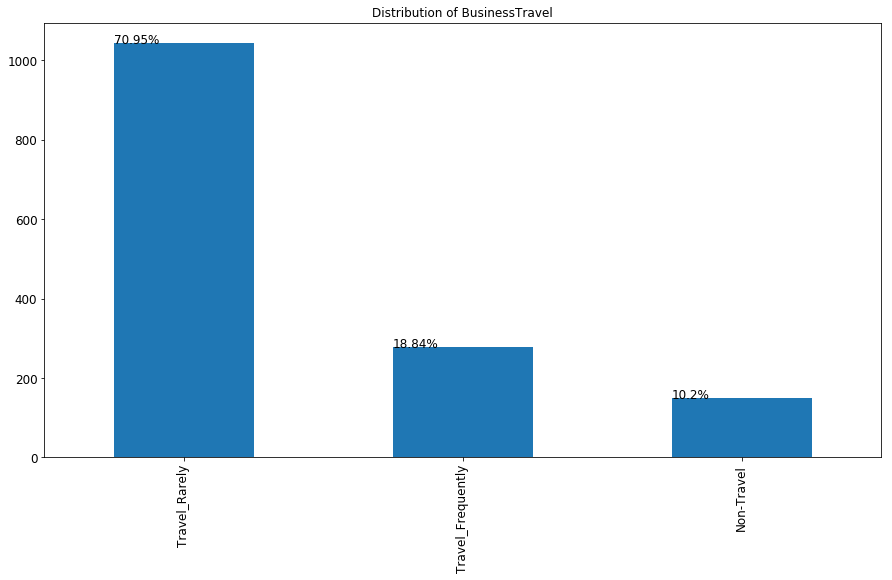

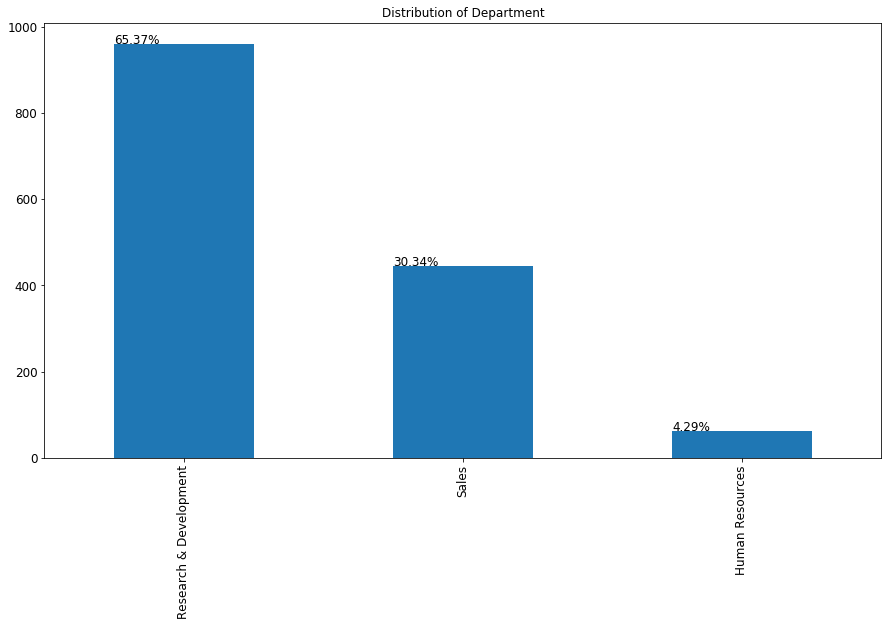

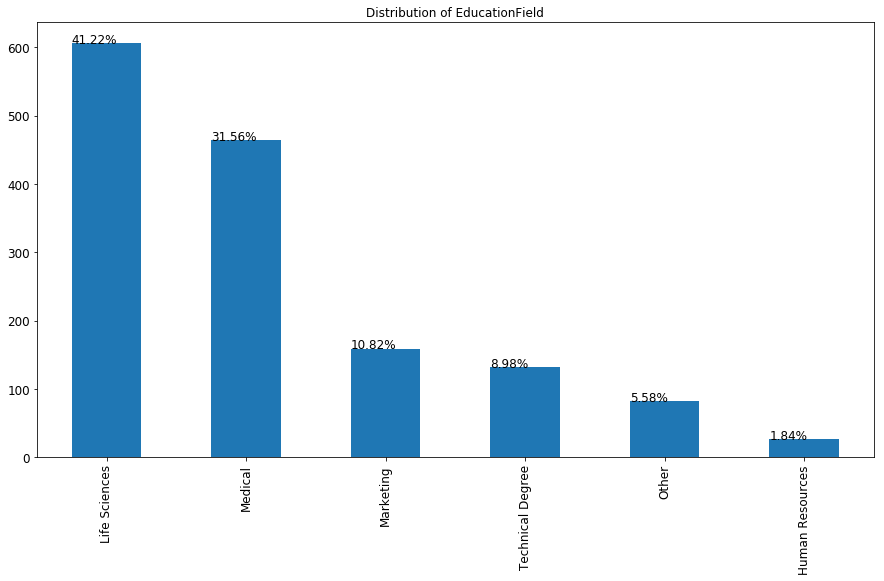

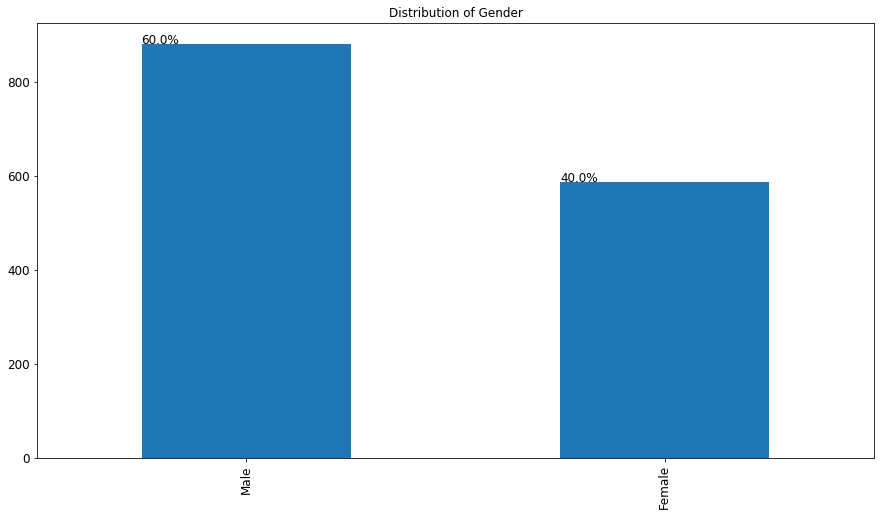

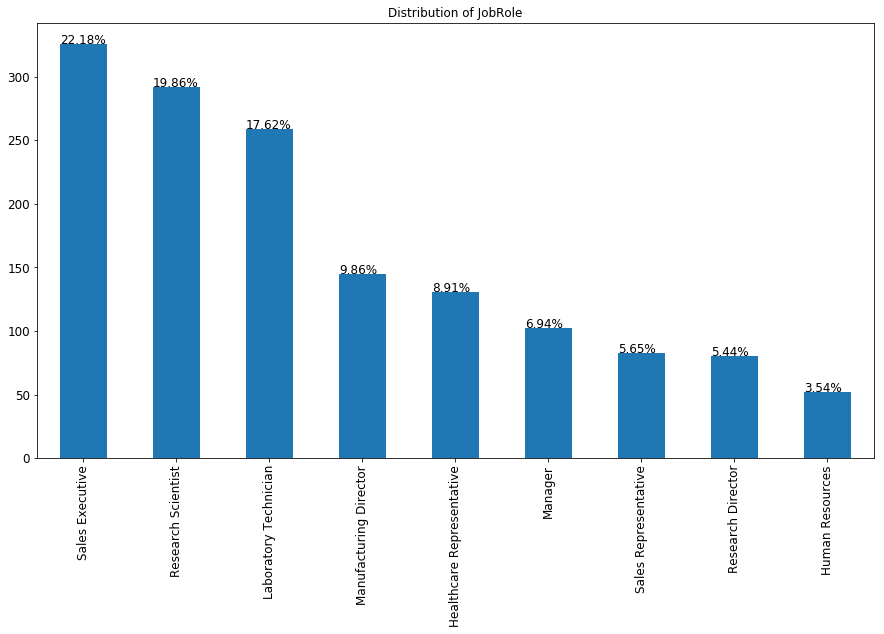

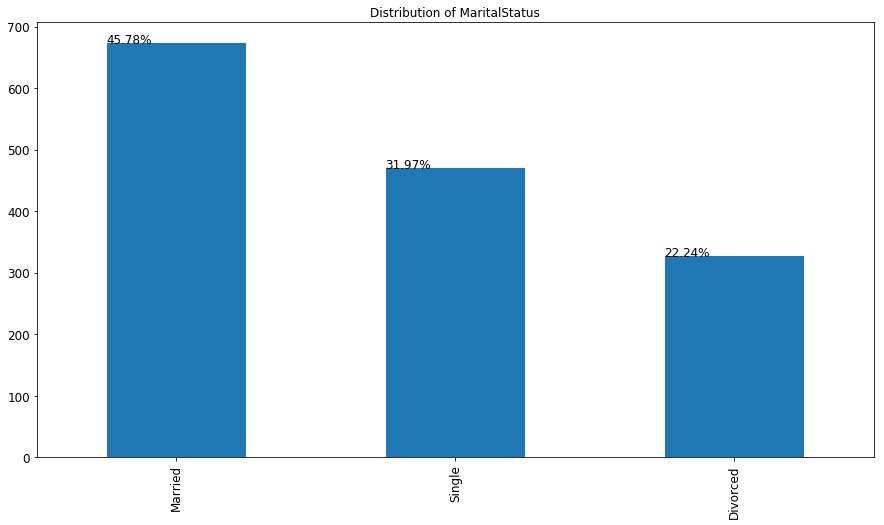

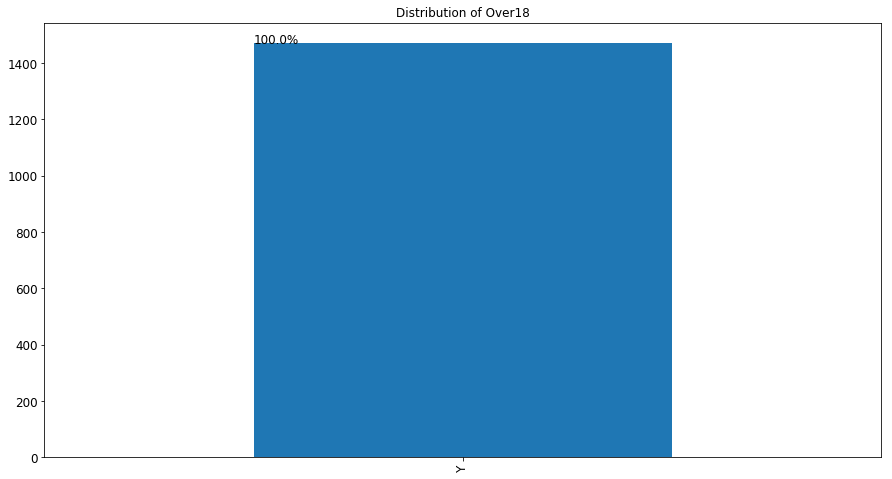

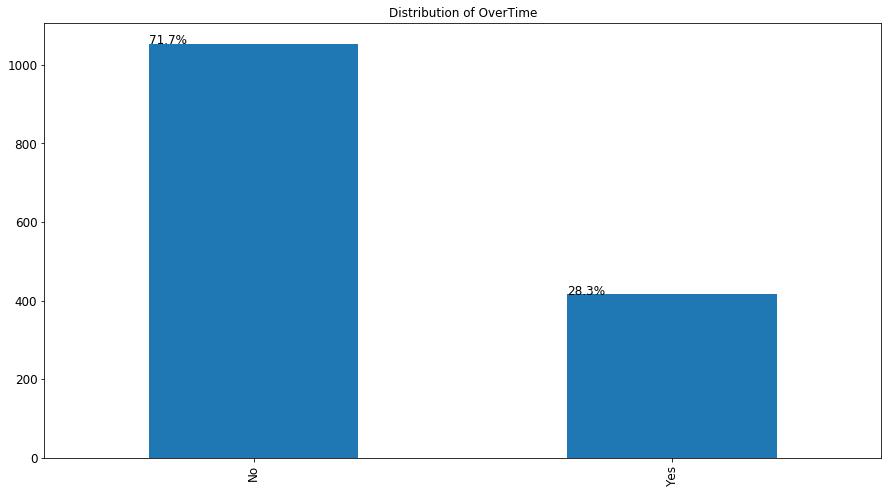

In [6]:
for column in cat_features:
    plot_categorical_col_dis(df_hr, column)

<b> Observations:</b>
- In the dataset, 83.88% data points are tagged as "No" <b>Attrition</b> and 16.12% data points are tagged as "Yes" <b>Attrition</b>. 
- The target variable <b>Attrition</b> distribution is imbalanced in data set, we should consider this while modeling.
- There are three kinds of <b>BusinessTravel</b>, the following is the distributions
    - Tarvel_Rarely(70.95%)
    - Travel_Frequently(18.84%)
    - Non-Travel(10.2%)
- The feature <b> Over18 </b> is constant so, we ingnore this column for both training and prediction.
- The feature <b> OverTime </b> states whether the employee works over time or not, the following is the distribution.
    - No (71.7%)
    - Yes (28.3%)


##### <a> 2.2.1 Categorical Features With Respect To Target Variable </a>

Let us understand which categorical features stronlgy influence towards attrition.

In [7]:
def plot_categorical_col_vs_target(df, column, target, normalized=False):
    """ plot the relationship between column and target """
    if not normalized:  
        crosstab_service = pd.crosstab(df[column], df[target])
        ax = crosstab_service.plot(kind='bar', stacked = True, figsize=(15, 8))
    else:
        crosstab_service = pd.crosstab(df[column], df[target])
        crosstab_service_norm = crosstab_service.div(crosstab_service.sum(1), axis = 0)
        crosstab_service_norm.plot(kind='bar', stacked = True, figsize=(15, 8))

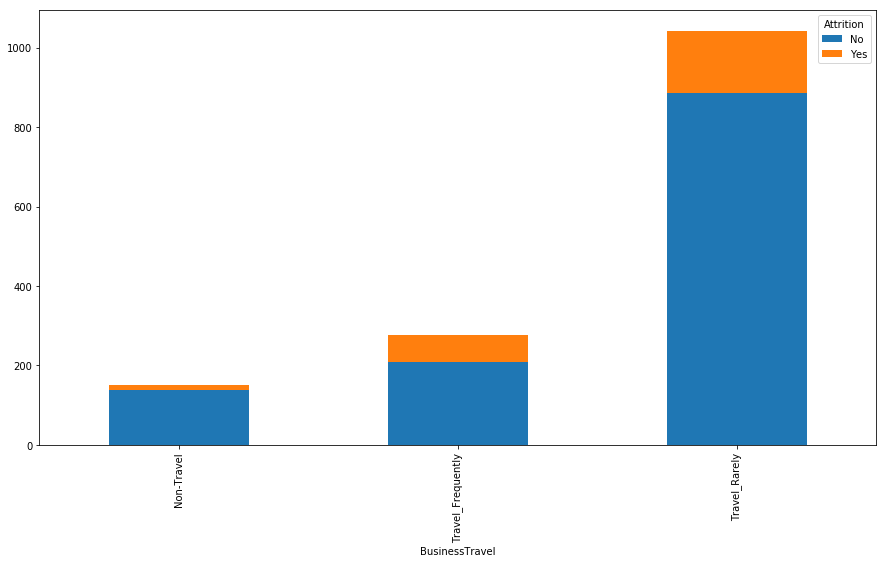

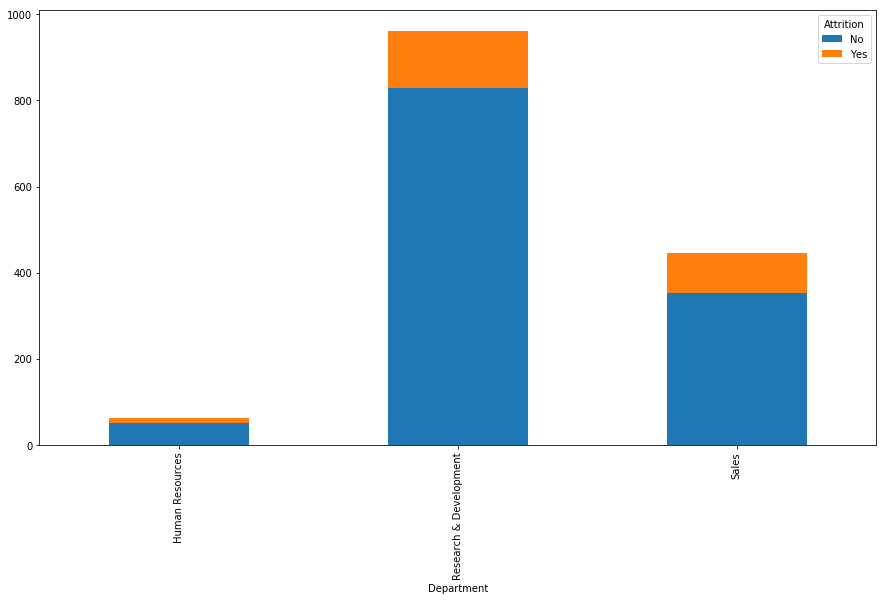

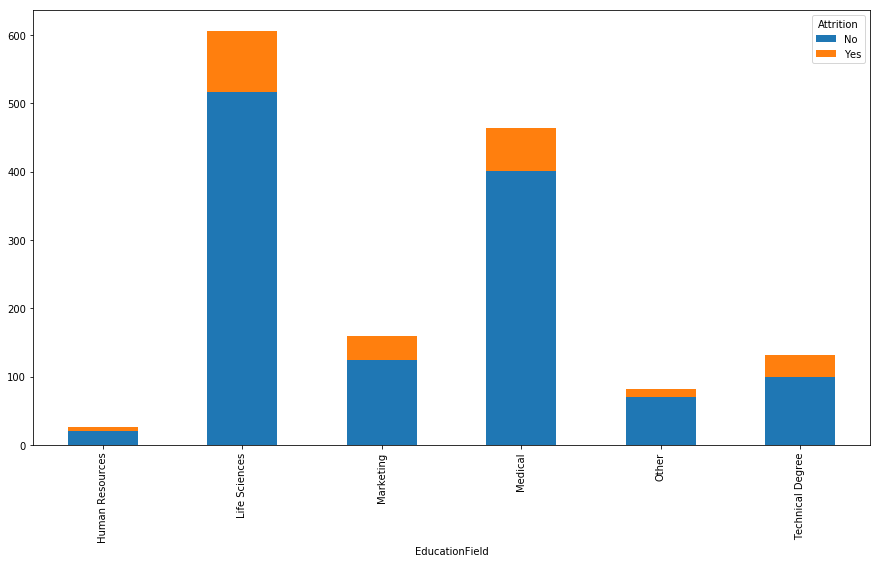

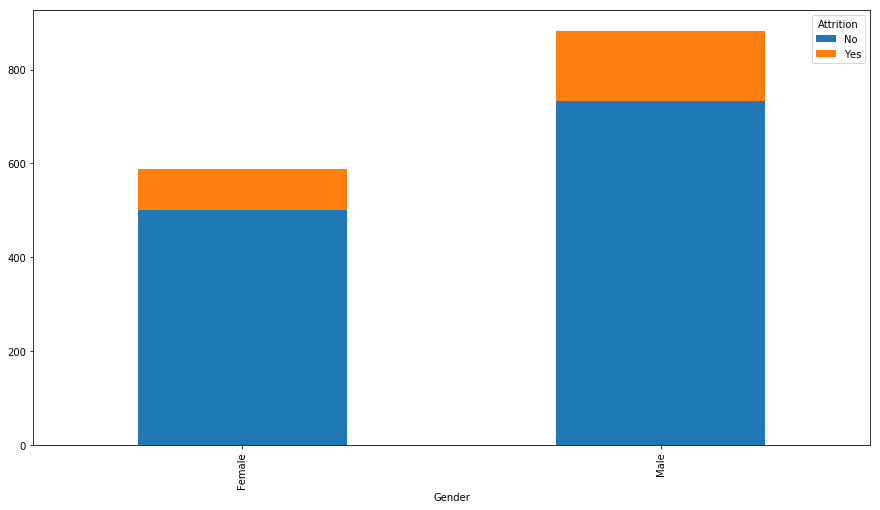

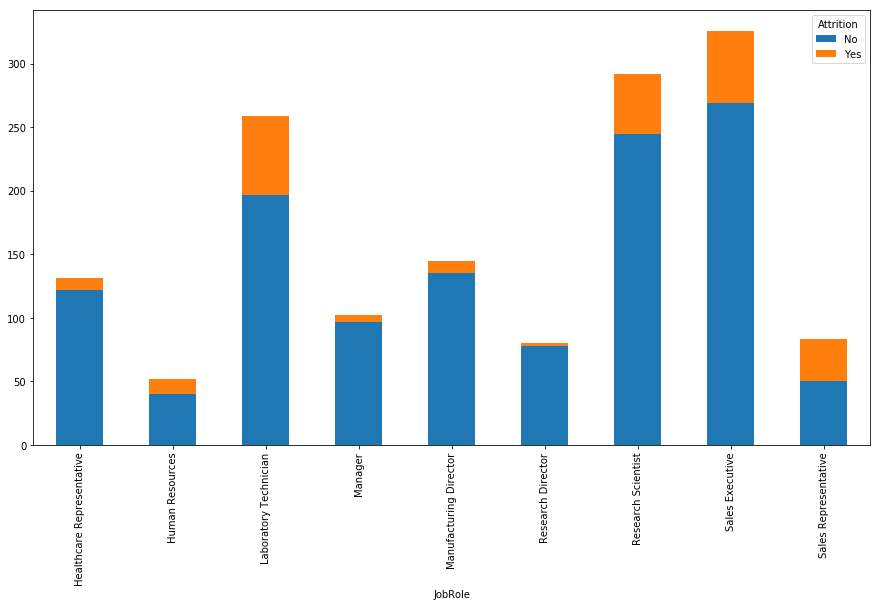

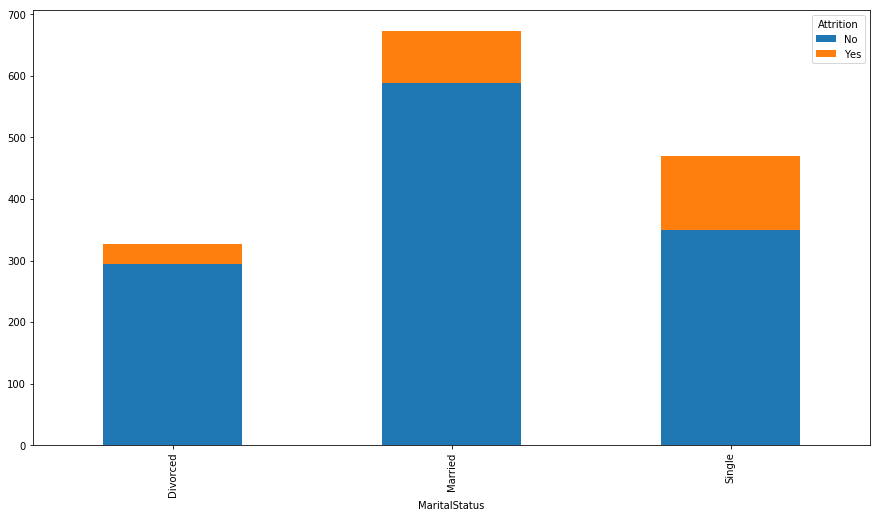

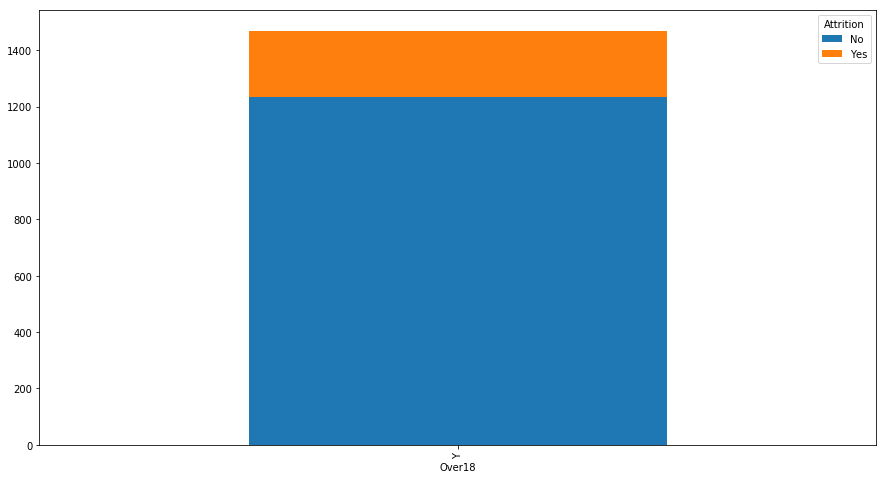

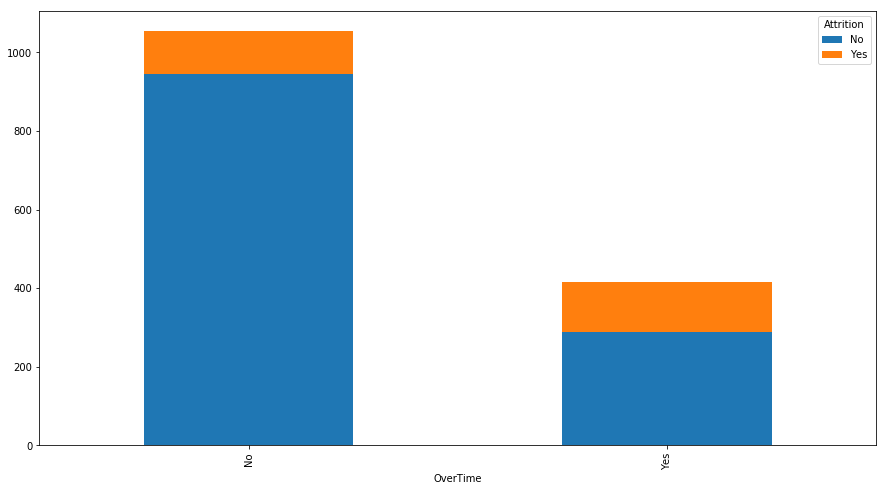

In [8]:
for column in cat_features:
    if column!='Attrition':
        plot_categorical_col_vs_target(df_hr, column, 'Attrition')

<b>Observations:</b>
- It is difficult to understand the impact of each category column on target without normalization. The above plots are good at explaining the distribution but not the influence.

Normalized plots

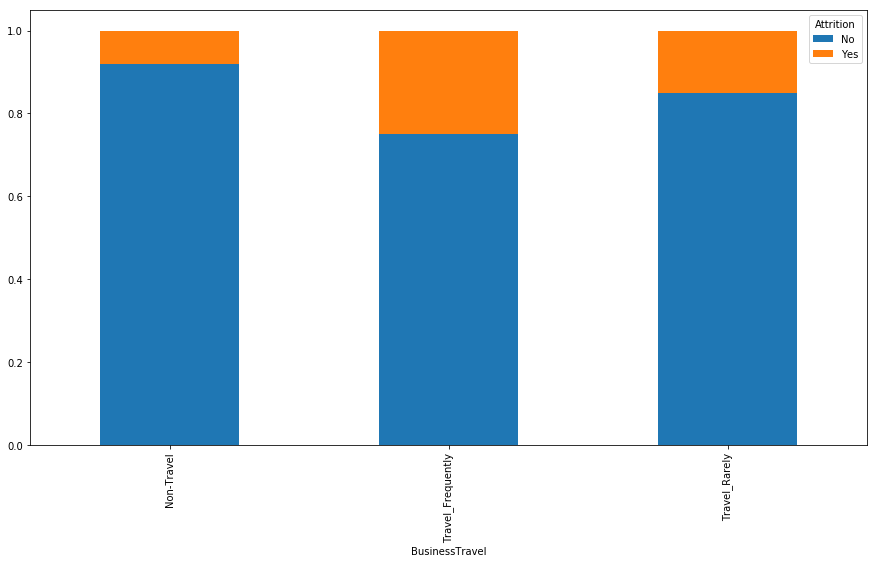

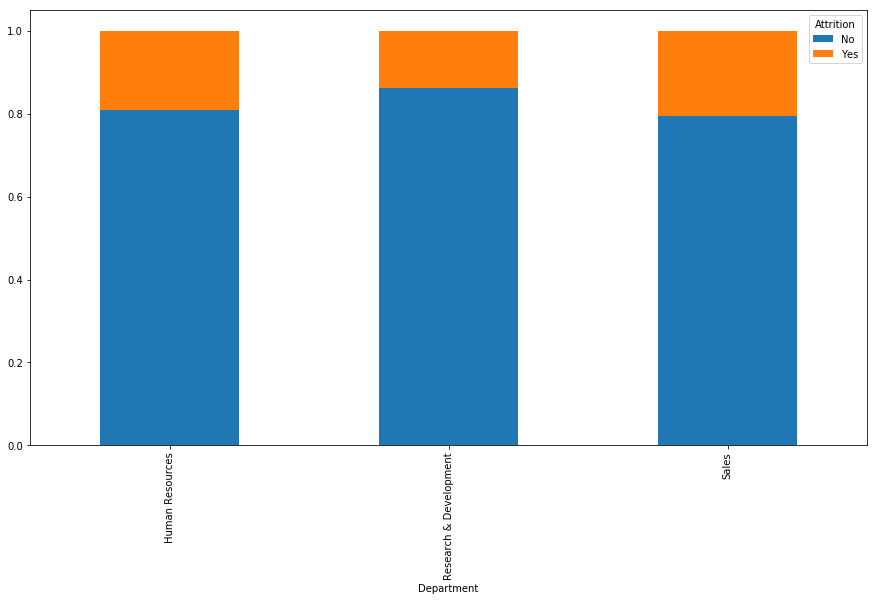

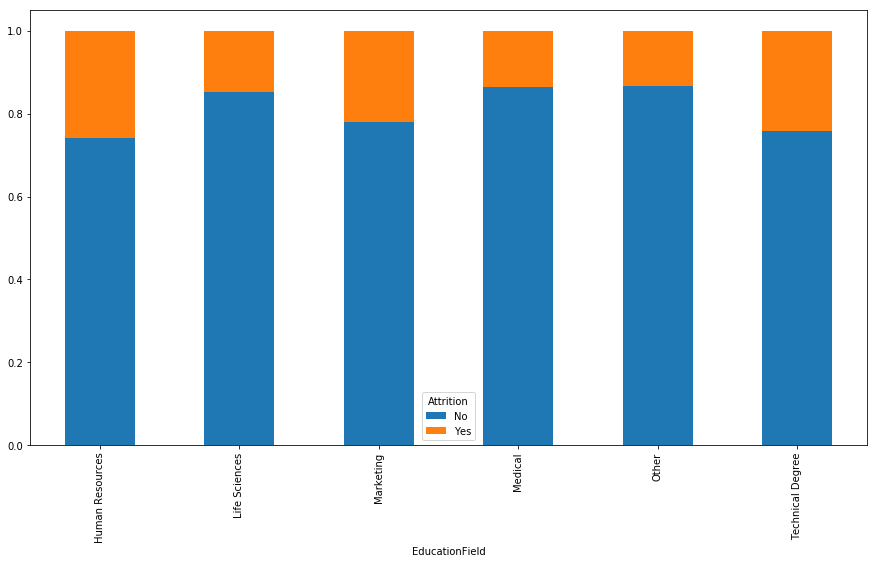

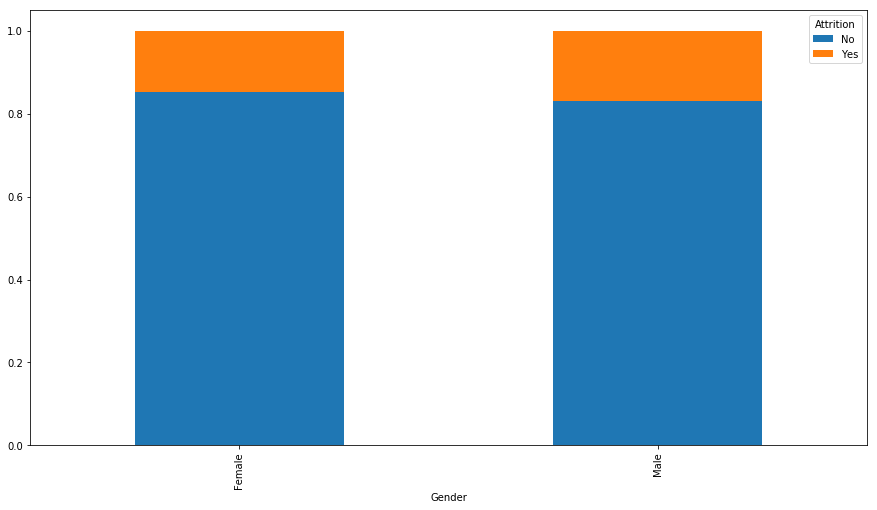

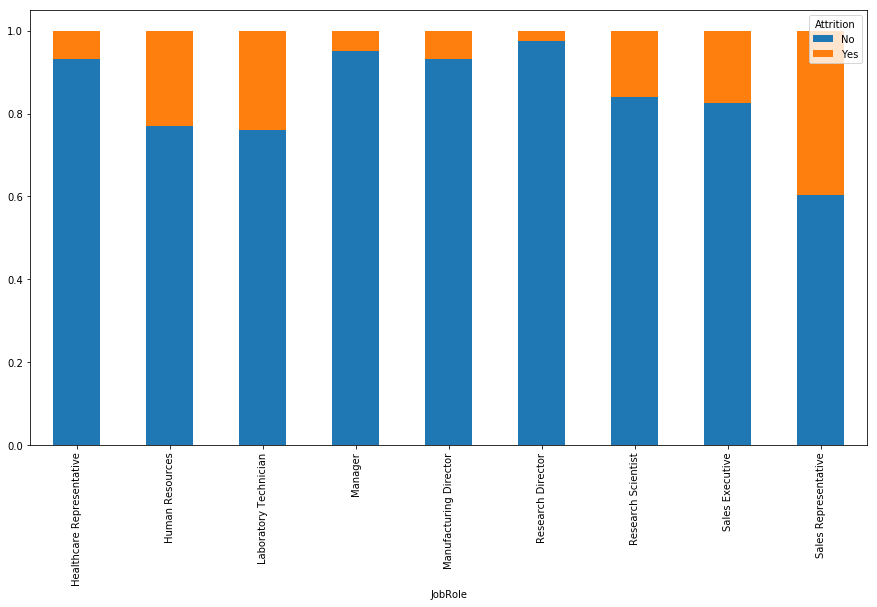

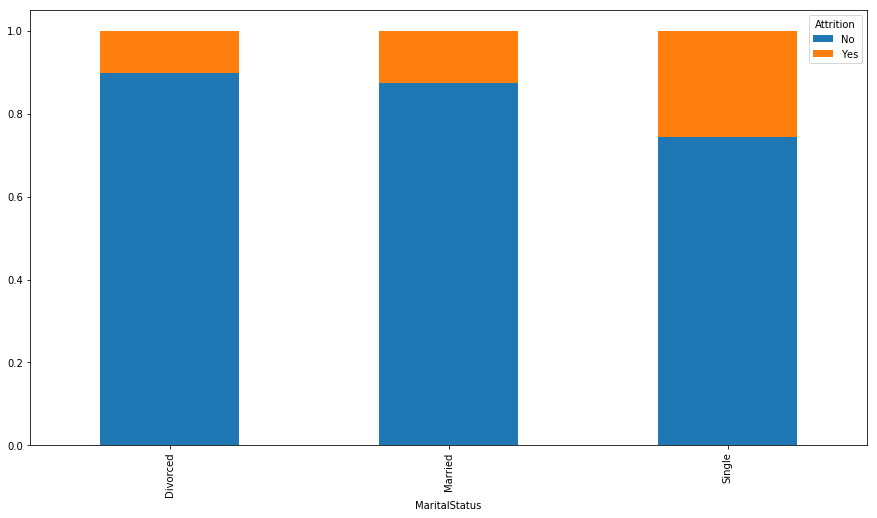

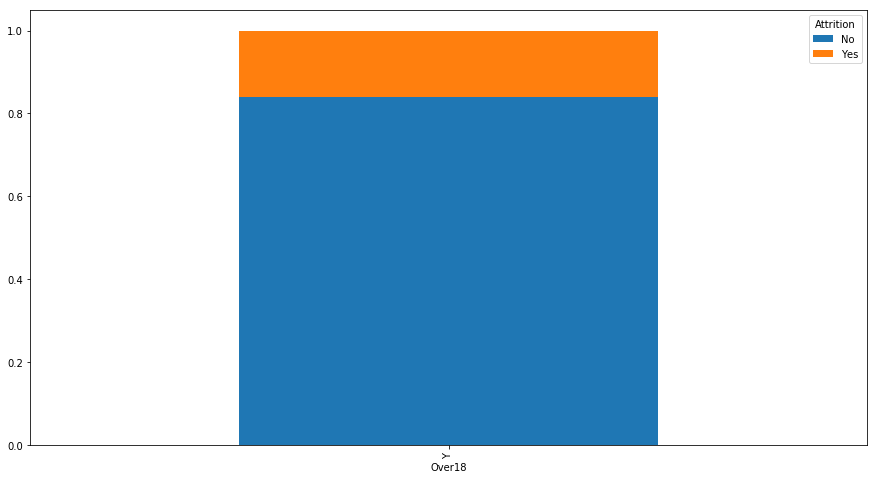

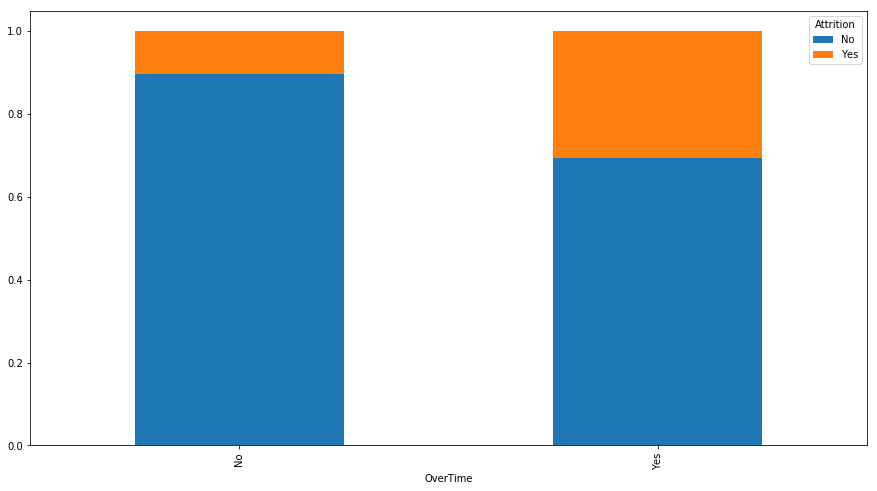

In [9]:
for column in cat_features:
    if column!='Attrition':
        plot_categorical_col_vs_target(df_hr, column, 'Attrition', normalized=True)

<b>Observations:</b>

- <b>OverTime</b> The people who work over time are more tend to leave the company.
- <b>MaritalStatus</b> The people who are single more tend to quit the job than married and divorced.
- <b>Department</b> The sales and human resource representatives have higher attrition compare to Research & Development.
    - Research & Development department has less attrition because the research work is time consuming and researchers dont change jobs very often.
- <b>EducationField</b> The people with education in Human Resources, Technical Degree, and Marketing are more tend to quit their jobs. 
- <b>Gender</b> The gender feature has neutral impact on the attrition variable, it may be because of the synthetic data.
- <b>JobRole</b> The employees in Sales Representative, Laboratory Technician, and Human Resources are more tend to quit the job.
- <b>BusinessTravel</b> People who travel more frequently tend to change the job more often.

#### <a> 2.3 Explore Boolean Features </a>

Let us plot the distribution of boolean columns in the data set.

In [10]:
bool_features = df_hr.columns[df_hr.dtypes=='bool']
print('The list of boolean columns in the data set:\n{}'.format(list(bool_features)))

The list of boolean columns in the data set:
[]


<b> Observations:</b>
- There are no boolean features in the data set.

#### <a> 2.4 Explore Numerical Features </a>

Let us plot the distribution of numerical columns in the data set.

In [11]:
num_columns = df_hr.columns[(df_hr.dtypes!='bool') & (df_hr.dtypes!='object')]
print('The list of numerical columns in the data set:\n{}'.format(list(num_columns)))

The list of numerical columns in the data set:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Label']


In [12]:
df_hr[num_columns].describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

##### <a> 2.4.1 Features With Zero Variance </a>

Find the features with zero variance since these feartures will not help the model learn the characteristics of the problem.

In [13]:
df_hr[num_columns].describe().transpose()[df_hr[num_columns].describe().transpose()['std'] <= 0]

count  mean  std   min   25%   50%   75%   max
EmployeeCount  1470.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
StandardHours  1470.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0

<b> Observations:</b>

- The feature <b> EmployeeCount </b> has zero variance, it takes constant value. We will not consider <b>EmployeeCount</b> feature for both training and prediction.
- The feature <b> StandardHours </b> has zero variance, it takes constant value. We will not consider <b>StandardHours</b> feature for both training and prediction.

##### <a> 2.4.2 Features With High Variance</a>

Find the features with high variance.

In [14]:
df_hr[num_columns].describe().transpose().sort_values('std', ascending=False).head(10)

count          mean          std     min      25%  \
MonthlyRate        1470.0  14313.103401  7117.786044  2094.0  8047.00   
MonthlyIncome      1470.0   6502.931293  4707.956783  1009.0  2911.00   
EmployeeNumber     1470.0   1024.865306   602.024335     1.0   491.25   
DailyRate          1470.0    802.485714   403.509100   102.0   465.00   
HourlyRate         1470.0     65.891156    20.329428    30.0    48.00   
Age                1470.0     36.923810     9.135373    18.0    30.00   
DistanceFromHome   1470.0      9.192517     8.106864     1.0     2.00   
TotalWorkingYears  1470.0     11.279592     7.780782     0.0     6.00   
YearsAtCompany     1470.0      7.008163     6.126525     0.0     3.00   
PercentSalaryHike  1470.0     15.209524     3.659938    11.0    12.00   

                       50%       75%      max  
MonthlyRate        14235.5  20461.50  26999.0  
MonthlyIncome       4919.0   8379.00  19999.0  
EmployeeNumber      1020.5   1555.75   2068.0  
DailyRate            802.0   1157.00   1499.0  
HourlyRate            66.0     83.75    100.0  
Age                   36.0     43.00     60.0  
DistanceFromHome       7.0     14.00     29.0  
TotalWorkingYears     10.0     15.00     40.0  
YearsAtCompany         5.0      9.00     40.0  
PercentSalaryHike     14.0     18.00     25.0

<b> Observations:</b>
- **MonthlyRate**, and **MonthlyIncome** seems to have high variance.
- **EmployeeNumber** is surrogate column, we will not consider this column for prediction and training.

##### <a> 2.4.3 Explore The Correlation Amongst Features </a>

Plot the correlation matrix among numerical features.

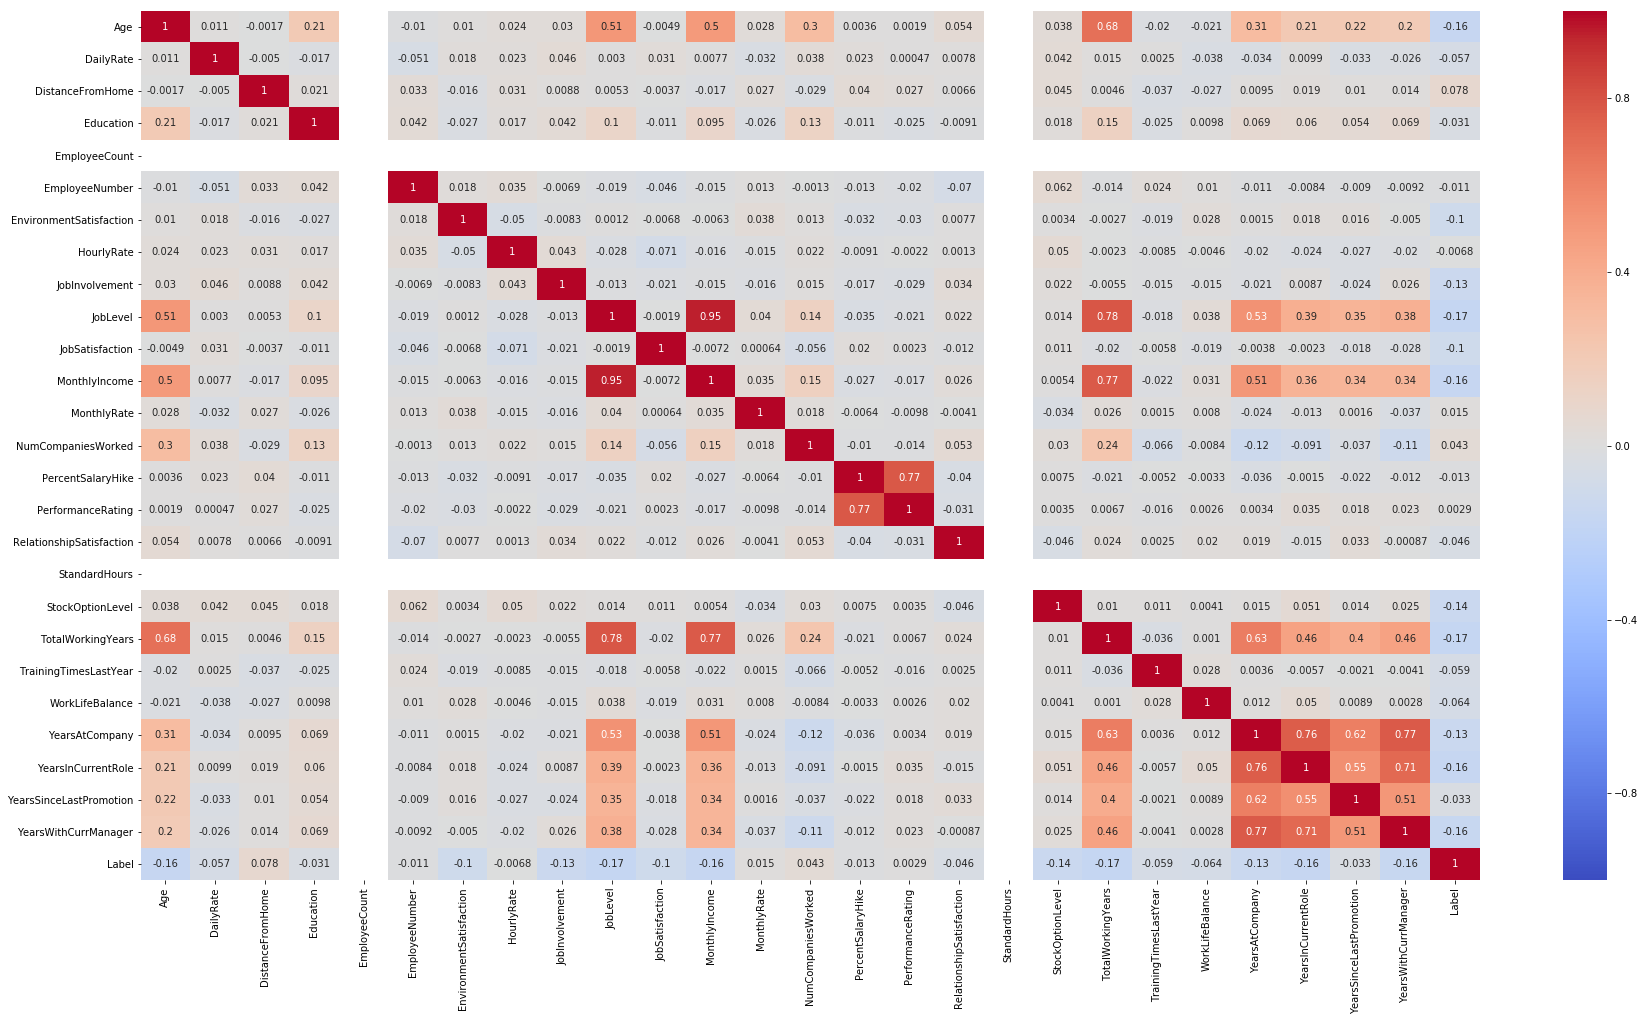

In [15]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_hr[num_columns].corr(), vmin=-1,  cmap='coolwarm',annot=True)

<b> Observations:</b>
- The features <b>StandardHours, EmployeeCount</b> are not correlated with any columns, because they take constant values.
- The feature <b>MonthlyIncome</b> is highly correlated with the feature <b>JobLevel</b>. It can be understood intuitively that the higher the job level the higher the salary will be.
- The feature <b>PercentSalaryHike</b> is highly correlated with the feature <b>PerformanceRating</b>, It can be also understood intuitively that the higher the rating the higher the salary hike will be.
- We don't see any features, which are significantly correalated with target feature <b>Label</b>.

##### <a> 2.4.4 Explore Distribution Of Numerical Features  </a>

Plot the distribution of numerical features.

In [16]:
def plot_histograms(dataframe, features, rows, cols, log1p=False):
    """ plot histograms """
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        if log1p:
            dataframe[feature].hist(log=True, bins=20,ax=ax,facecolor='green')
        else:
            dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')
    fig.tight_layout()
    plt.show()

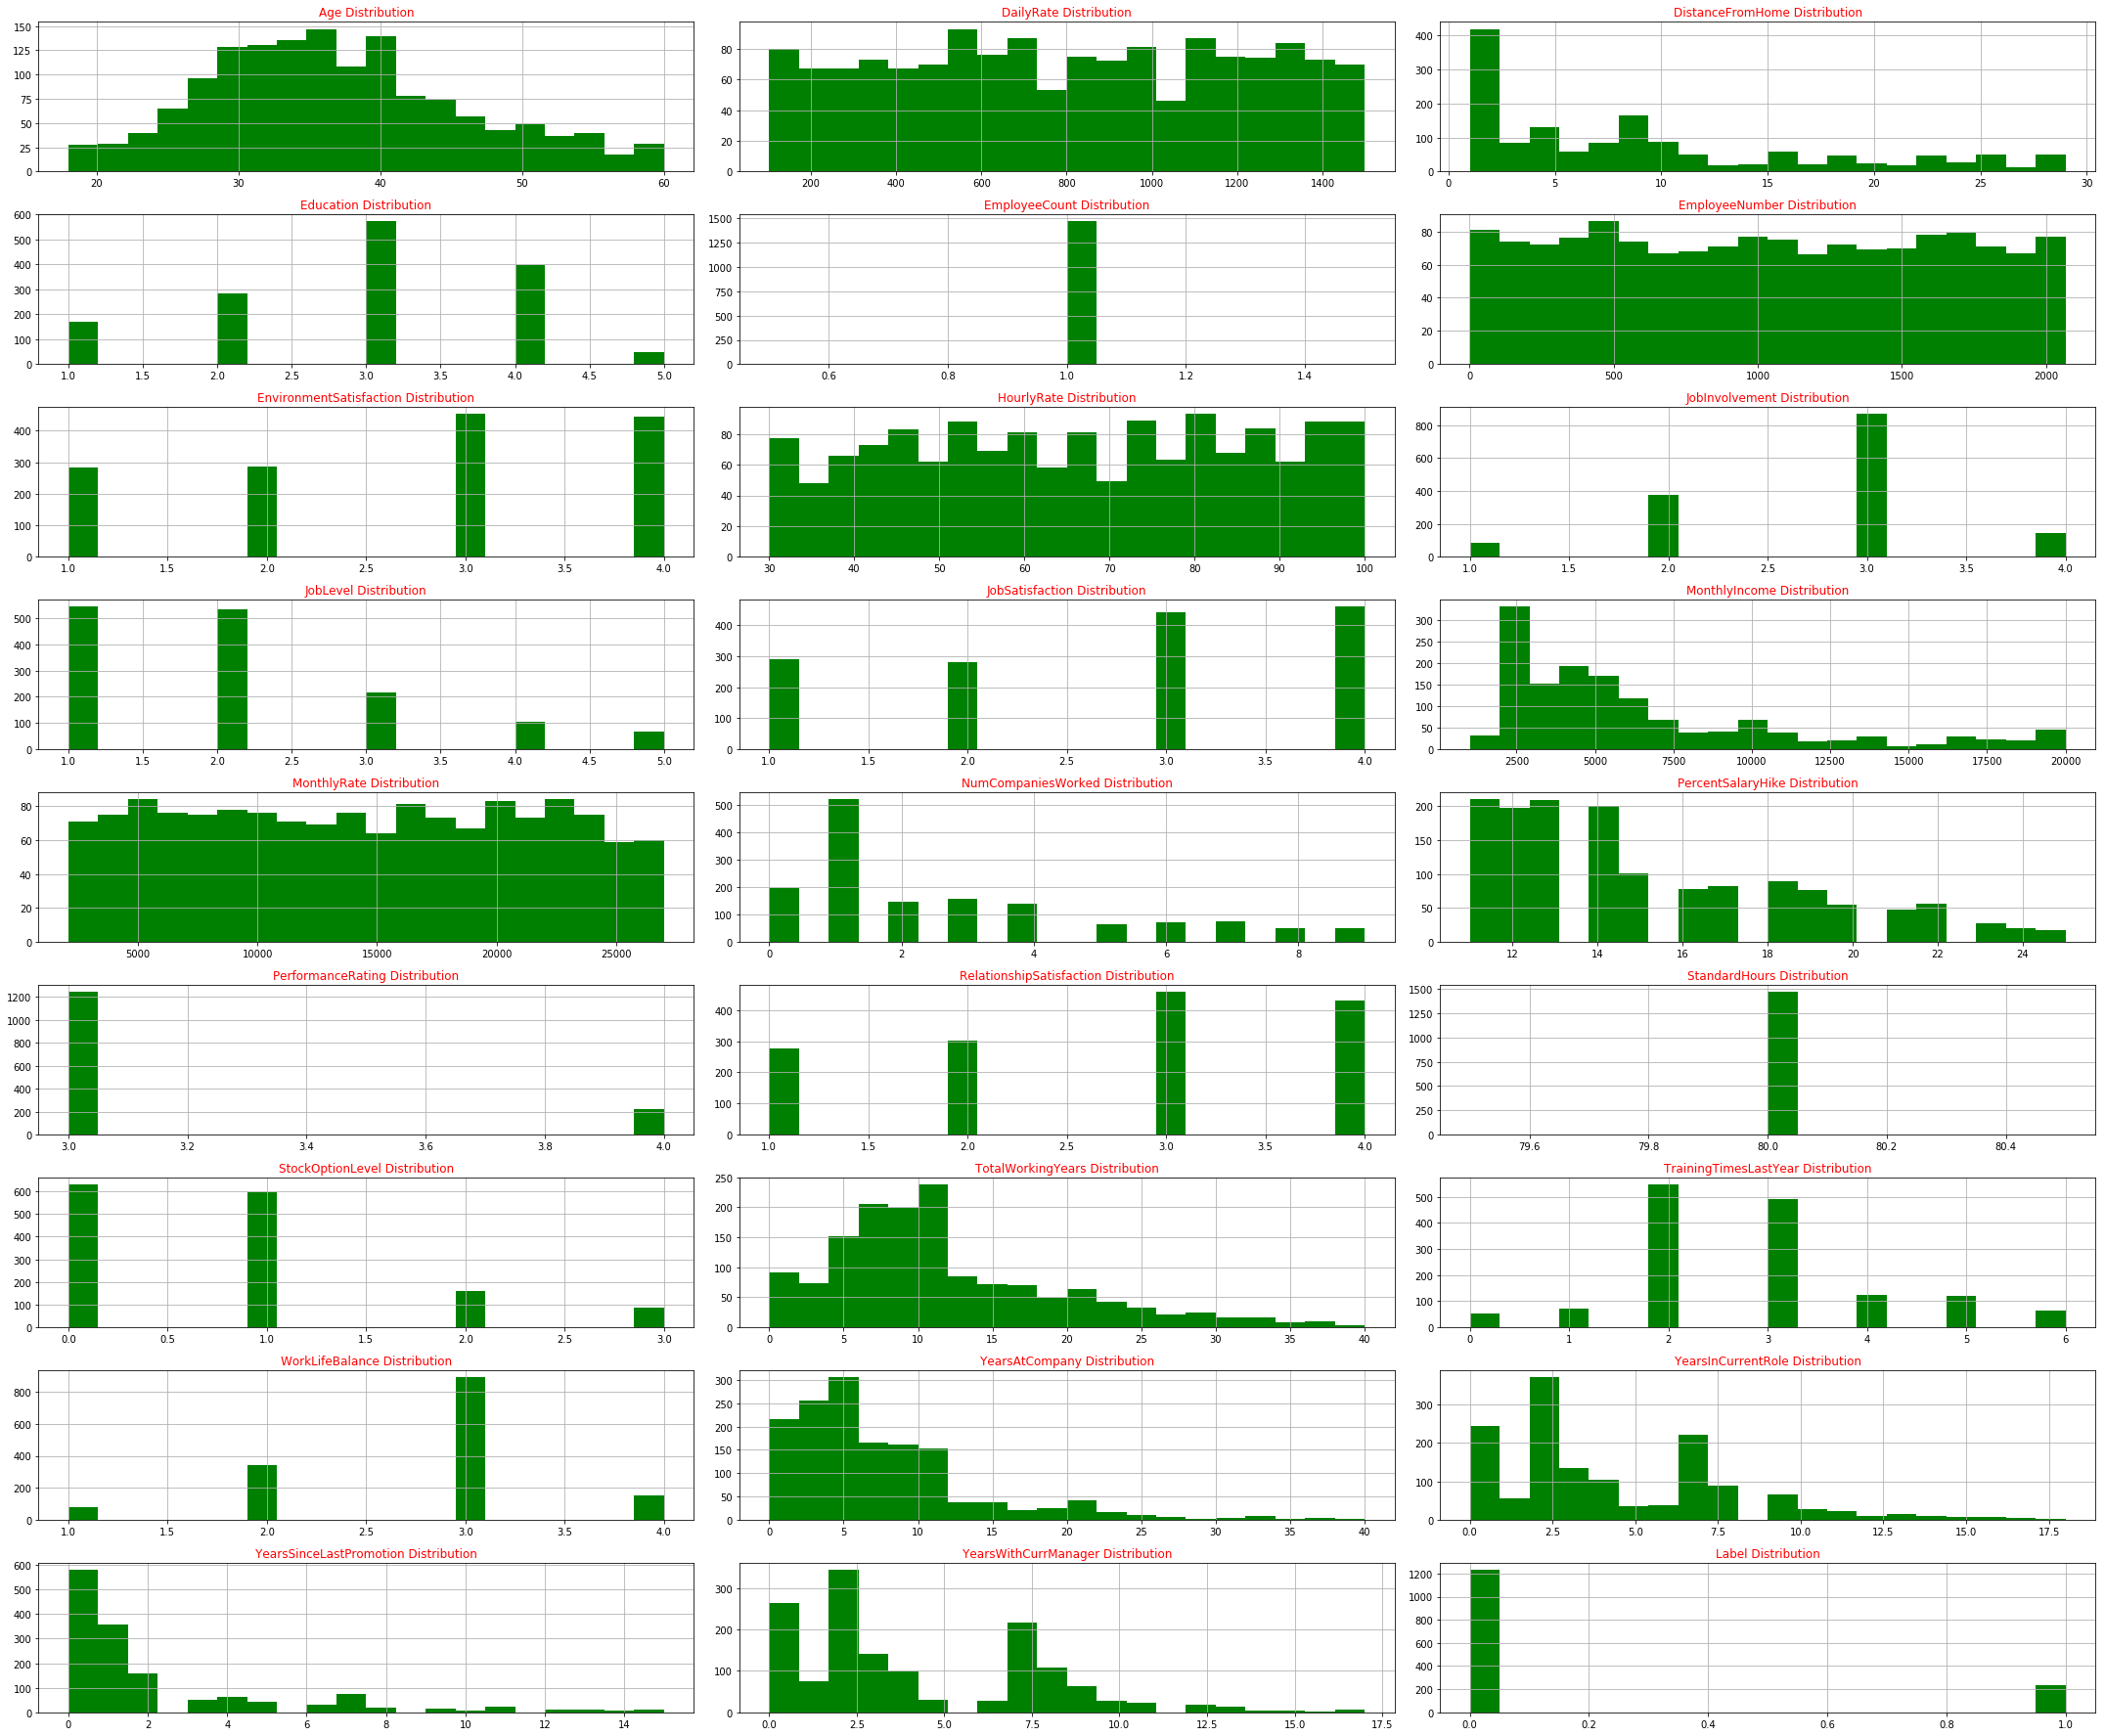

In [17]:
plot_histograms(df_hr,num_columns,11,3)

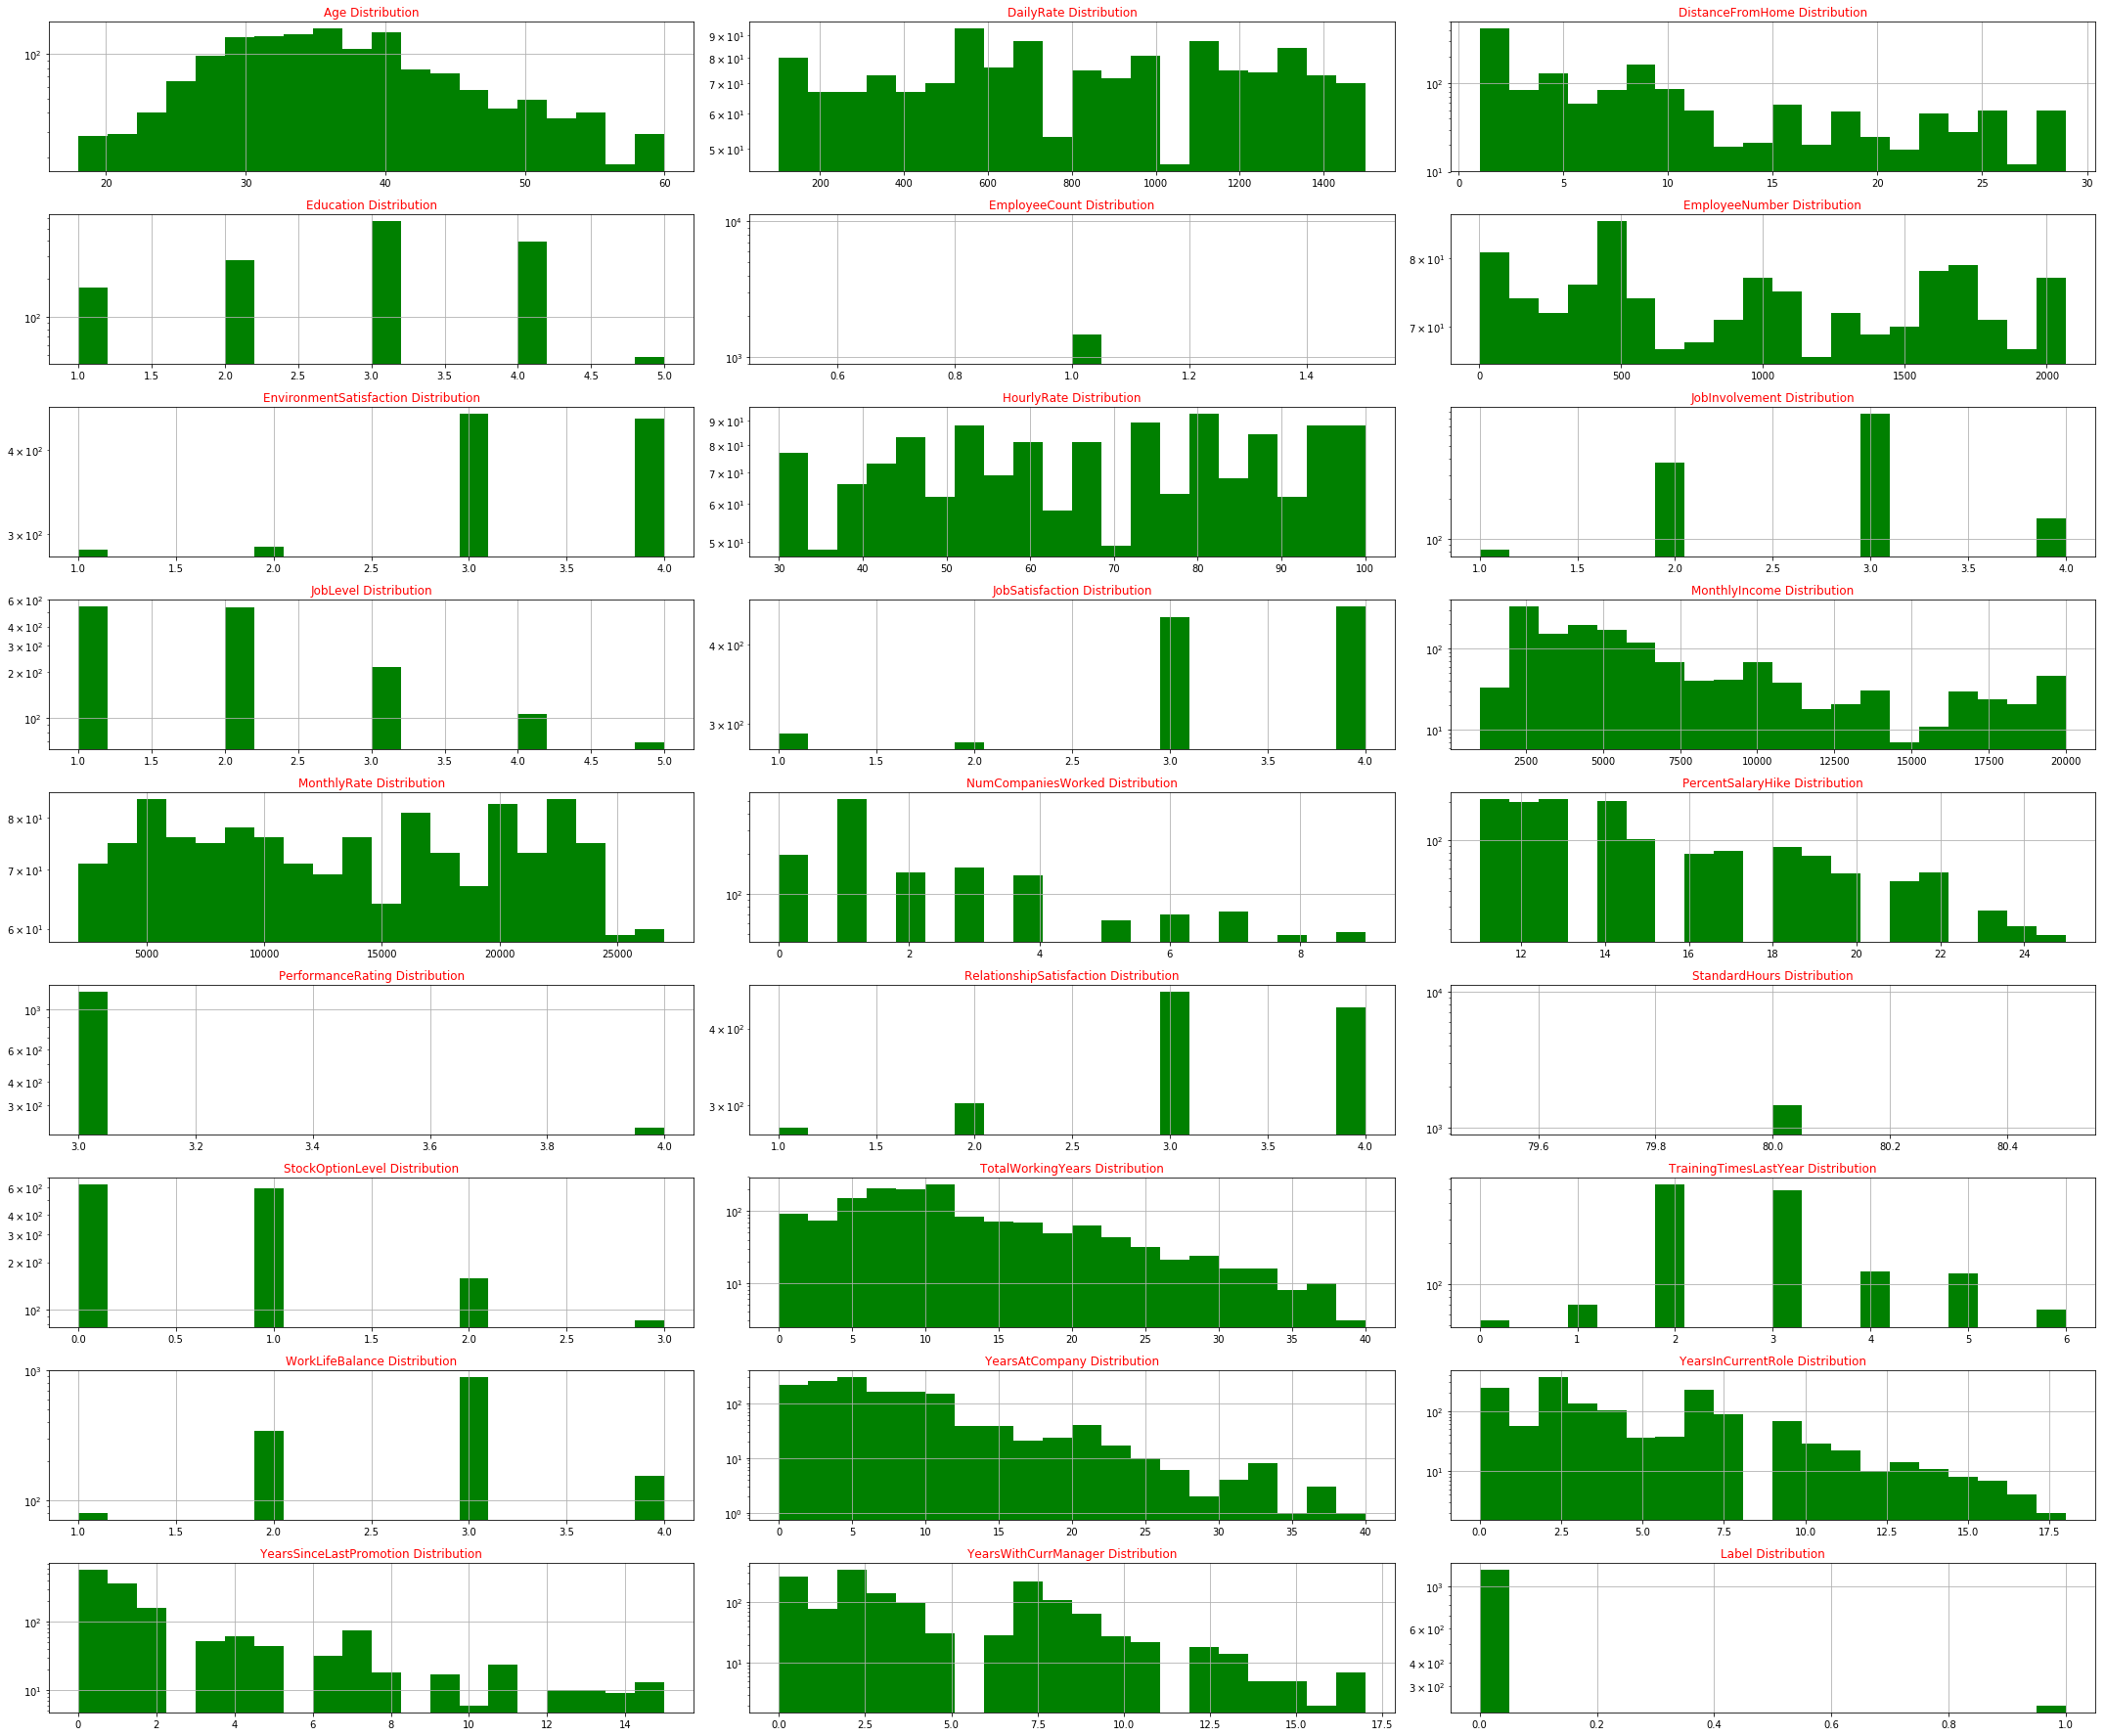

In [18]:
plot_histograms(df_hr,num_columns,11,3, True)

<b> Observations: </b>

- The following plots do not give us any clear and satisfactory results.
- The feature <b>StandardHours, EmployeeCount</b> are taking constant values.
- We will scale the features while modeling.

##### <a> 2.4.5 Numerical Features With Respect To Target Variable </a>

Let us understand which numerical features stronlgy influence towards attrition.

In [19]:
def plot_numerical_col_vs_target(df, column, is_log=False):
    """ plot the relationship between column and target """
    plt.subplot(2, 1, 1)
    bt_col_yes = df[df.Attrition == "Yes"][column]
    bt_col_no = df[df.Attrition == "No"][column]
    (n, bins, patches) = plt.hist([bt_col_yes, bt_col_no], bins=30, stacked = True, log=is_log)

    plt.legend(['Attrition = Yes', 'Attrition = No'], loc='best') 
    plt.title('Histogram of {} with Attrition overlay'.format(column)) 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    plt.subplot(2, 1, 2)
    n_table = np.column_stack((n[0], n[1]))
    n_norm = n_table / n_table.sum(axis=1)[:, None]
    ourbins = np.column_stack((bins[0:30], bins[1:31]))

    p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1]-ourbins[:, 0])
    p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1]-ourbins[:, 0], bottom = n_norm[:,0])

    plt.legend(['Attrition = Yes', 'Attrition = No'], loc='best') 
    plt.title('Normalized Histogram of {} with Attrition overlay'.format(column)) 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

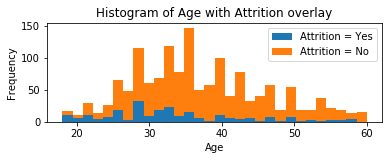

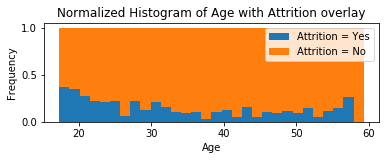

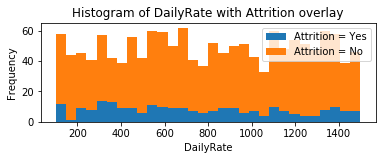

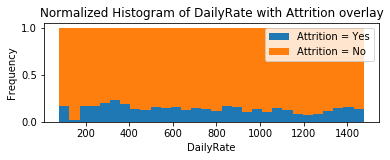

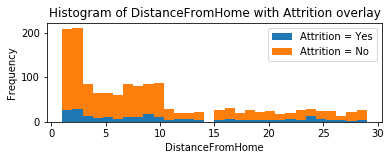

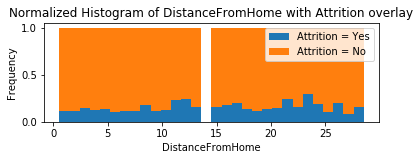

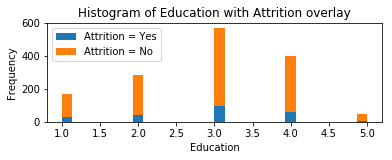

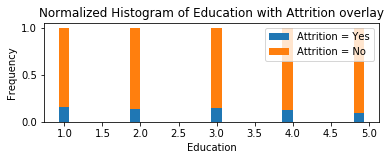

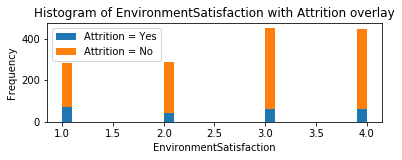

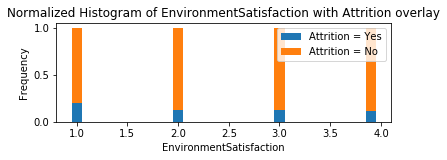

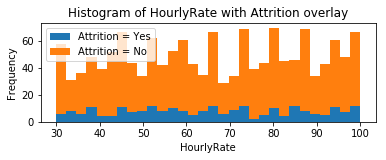

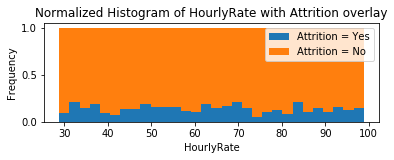

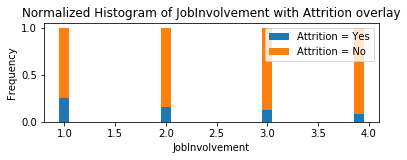

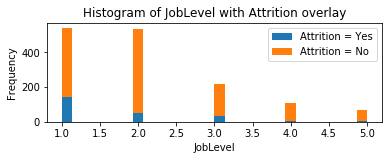

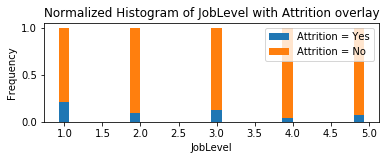

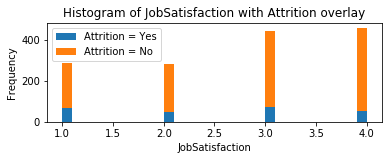

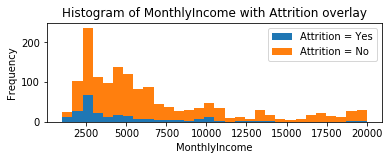

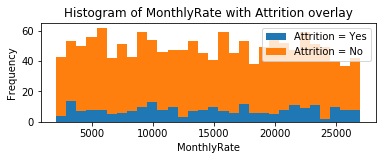

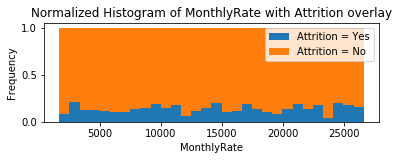

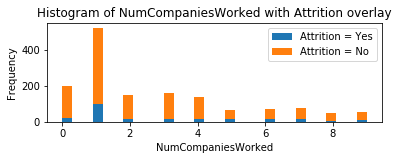

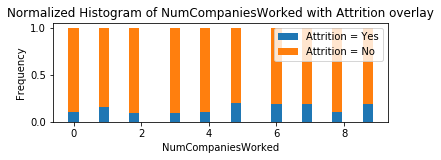

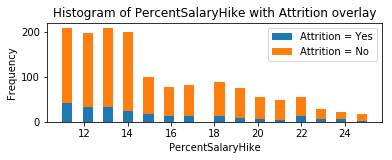

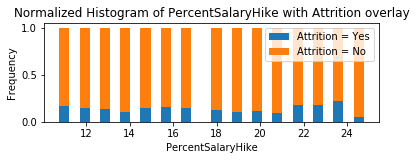

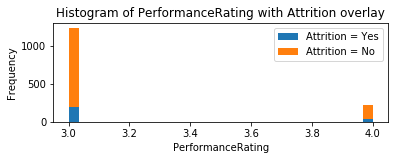

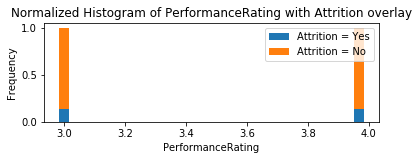

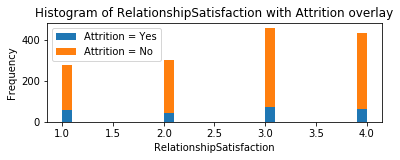

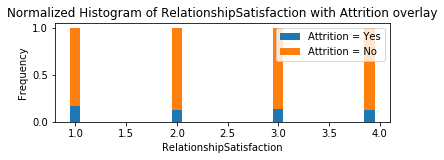

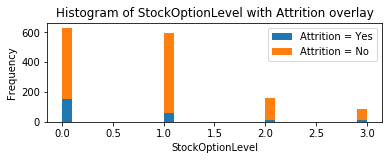

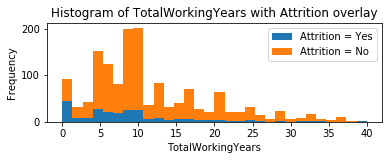

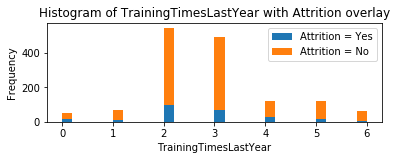

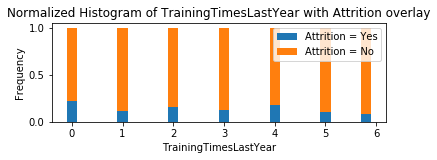

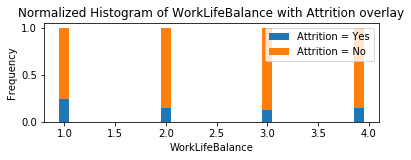

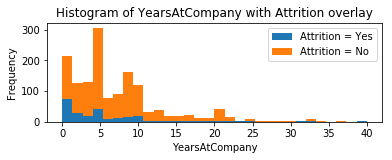

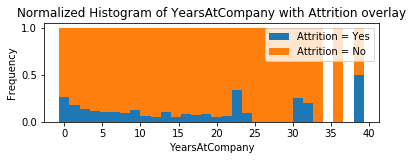

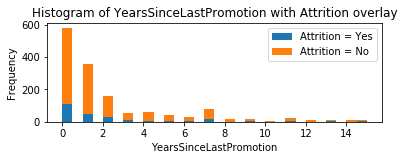

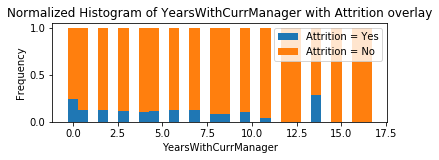

In [20]:
for column in num_columns:
    if column not in ['Label','EmployeeNumber','EmployeeCount', 'StandardHours']:
        plot_numerical_col_vs_target(df_hr, column, is_log=False)

<b>Observations: </b>
- Without normalization, 
    - It is difficult to understand the impact of each column on target. The above plots are good at explaining the distribution but not the influence.
- With normalization,
    - <b>Age</b> The younger employees are more tend to quit the jobs.
    - The employees with low <b>JobLevel</b>, <b>MonthlyIncome</b>, <b>YearsAtCompany<b>, and <b>TotalWorkingYears</b> are more likely to quit thier job.

#### <a> 4.Modeling </a>

Let us model using machine learning algorithms and see if the model identifies the findings which we saw till now. First, we deal with classification problem using different algorithms and the models are evaluated based on different metrics. Metrics to evaluate the models.

- Confusion matrix, Precision, Recall, F1-score, and AUC
- FNR (False Negative Rate): Total number of points incorrectly classified as "No Attrition" / Total number of points actually belongs to class "Attrition".  The lower the FNR better the model in reducing the cost towards company.

We need a false negative rate(FNR) to be low since classifying Attrition as No Attrition (loss of an employee) is costlier than classifying No Attrition as Attrition (HR or Manager has to spend extra resources to increase the performance an employee and to retain the employees).

##### <a>4.1 Preprocessing </a>

Data preprocessing.

###### <a>4.1.1 Test train split </a>

In [60]:
cnames = df_hr.columns
exclude_features = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'Label', 'Attrition']

X_features = [feature for feature in cnames if feature not in exclude_features]
y_feature = ['Label']

X = df_hr[X_features]
y = df_hr[y_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### <a>4.1.3 Scale the numerical features </a>

Scaling the training and test features to improve the performance and also brings the feature scale further close to each other.

In [61]:
numerical_features = X_train.select_dtypes(exclude=['object','category','bool']).columns.tolist()

In [62]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features]= scaler.transform(X_test[numerical_features])

##### <a>4.1.2 Create dummies for categorical features </a>

In [63]:
X_train= pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)
X_train.head()

Age  DailyRate  DistanceFromHome  Education  \
714   1.413691   0.794212         -1.017728  -0.847202   
135  -0.098346  -1.440722         -0.409362  -0.847202   
1271 -1.718387  -1.143549         -0.287688  -1.796844   
477   1.413691   1.088928         -0.774382   0.102440   
806   1.629697   0.470024         -0.287688   1.052081   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
714                  1.201147   -0.033242        0.403897  1.749208   
135                 -0.623178    0.846345        0.403897 -0.039103   
1271                -0.623178   -1.743551        0.403897 -0.933258   
477                 -1.535340    1.579335        0.403897  2.643363   
806                 -0.623178    0.992943        0.403897  0.855052   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
714          1.174489       2.284799    -1.077670            2.531721   
135         -0.649736      -0.314845    -1.613426            1.335055   
1271        -0.649736      -0.786862    -1.366719           -0.659387   
477         -0.649736       2.451946    -0.882336           -0.659387   
806         -0.649736       0.833690     0.151210            1.733944   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
714            1.839399           2.296604                  0.287781   
135            1.293547           2.296604                  1.216076   
1271          -0.616935          -0.435426                 -0.640515   
477           -1.162787          -0.435426                  0.287781   
806            1.020621          -0.435426                  1.216076   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
714           0.203426           2.648882              -1.389417   
135           1.347281          -0.534305              -2.168975   
1271         -0.940429          -1.298270               0.169700   
477           0.203426           2.648882              -0.609859   
806          -0.940429           0.866297               0.949258   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
714         -1.073695       -0.320287           -0.058998   
135          0.361152       -0.650028           -0.605921   
1271         0.361152       -0.979769           -1.152845   
477          0.361152        4.131212            0.214464   
806          0.361152        0.174324            0.487926   

      YearsSinceLastPromotion  YearsWithCurrManager  \
714                 -0.360310             -0.285677   
135                 -0.682149             -0.853720   
1271                -0.360310             -1.137742   
477                  2.536244              0.850408   
806                  0.605208             -1.137742   

      BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
714                           0                                 0   
135                           0                                 0   
1271                          0                                 0   
477                           0                                 1   
806                           0                                 0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
714                              1                           0   
135                              1                           0   
1271                             1                           0   
477                              0                           1   
806                              1                           0   

      Department_Research & Development  Department_Sales  \
714                                   1                 0   
135                                   1                 0   
1271                                  0                 1   
477                                   0                 0   
806                                   1                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
714    

##### <a>4.1.4 Oversampling data points </a>

In [64]:
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(X_train, y_train)
print('The number of data points 0 vs 1: {0[0]} vs {0[1]}'.format(np.bincount(y_train_oversample['Label'])))

The number of data points 0 vs 1: 853 vs 853


##### <a>4.1.5 Adding polynomial features </a>

In [65]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train.columns))
X_test_poly = pd.DataFrame(X_test_poly, columns=poly.get_feature_names(X_test.columns))

print('The size of the X_train after polynomial features: rows {0[0]}, cols {0[1]}'.format(X_train_poly.shape))
print('The size of the X_test after polynomial features: rows {0[0]}, cols {0[1]}'.format(X_test_poly.shape))

The size of the X_train after polynomial features: rows 1029, cols 1327
The size of the X_test after polynomial features: rows 441, cols 1327


In [66]:
(X_train.shape, X_test.shape, X_train_poly.shape, X_test_poly.shape, X_train_oversample.shape)

((1029, 51), (441, 51), (1029, 1327), (441, 1327), (1706, 51))

##### <a> 4.2. Classification </a>

In [67]:
def grid_search_cv(X, y, model, param_grid, weight):
    """ Function to do grid search for classifiers """
    if model.lower()=='logisticregression':
        tuned_parameters = {"C":np.logspace(-6, 3, 10)}
        clf = LogisticRegression(solver='lbfgs',
                                 random_state=42,
                                 class_weight=weight, 
                                 verbose=0)
        logreg_cv = GridSearchCV(clf, 
                                 tuned_parameters, 
                                 cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                 return_train_score=True)
        logreg_cv.fit(X,y)
        
        return logreg_cv.best_params_, logreg_cv.best_score_, logreg_cv.best_estimator_, logreg_cv.cv_results_
    
    elif model.lower()=='svm':
        tuned_parameters = param_grid
        clf = LinearSVC(class_weight=weight)
        svc_cv = GridSearchCV(clf,
                              tuned_parameters,
                              cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                              return_train_score=True)
        svc_cv.fit(X,y)
        
        return svc_cv.best_params_, svc_cv.best_score_, svc_cv.best_estimator_, svc_cv.cv_results_
    
    elif model.lower()=='randomforest':
        clf = RandomForestClassifier(random_state = 42, class_weight=weight)
        rf_cv = GridSearchCV(estimator = clf, param_grid = param_grid, cv=5, n_jobs=-1, verbose=2,
                             return_train_score=True)
        rf_cv.fit(X,y)
        return rf_cv.best_params_, rf_cv.best_score_, rf_cv.best_estimator_, rf_cv.cv_results_

In [68]:
def plot_roc_curve(predictions, testdata):
    """ plot roc curve """
    fpr, tpr, thresholds = roc_curve(predictions, testdata['Label'])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(15,8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="best")
    plt.show()

In [69]:
def plot_confusion_matrix(testdata, predictions):
    """ plot confusion matrix """
    cm = confusion_matrix(testdata['Label'], predictions)
    obs = np.sum(cm)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['No Attrition','Attrition']
    plt.title('No Attrition or Attrition confusion matrix')
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str('{:.2f}'.format(cm[i][j]/obs*100)) + "%")
    plt.show()

In [70]:
def plot_train_test_scores(cv_results, model):
    """ plot train test scores """
    if model.lower() != 'randomforest':
        results_logit = pd.DataFrame(cv_results)
        ax = results_logit.plot('param_C', 'mean_train_score', label='lr_mean_train_score', figsize=(15,8))
        results_logit.plot('param_C', 'mean_test_score', ax=ax, label='lr_mean_test_score')
        ax.fill_between(results_logit.param_C.astype(np.float),
                         results_logit['mean_train_score'] + results_logit['std_train_score'],
                         results_logit['mean_train_score'] - results_logit['std_train_score'], alpha=0.2)
        ax.fill_between(results_logit.param_C.astype(np.float),
                         results_logit['mean_test_score'] + results_logit['std_test_score'],
                         results_logit['mean_test_score'] - results_logit['std_test_score'], alpha=0.2)

        plt.legend(loc='best')
        plt.xscale("log")
    else:
        results_rf = pd.DataFrame(cv_results)
        results_rf['param_msl_mss_n'] = results_rf['param_min_samples_leaf'].astype(str) \
                                        + '_' + results_rf['param_min_samples_split'].astype(str)\
                                        + '_' + results_rf['param_n_estimators'].astype(str)
        ax = results_rf.plot('param_msl_mss_n', 'mean_train_score', label='rf_mean_train_score', figsize=(15,8))
        results_rf.plot('param_msl_mss_n', 'mean_test_score', ax=ax, label='rf_mean_test_score')
        ax.fill_between(results_rf.param_msl_mss_n.astype(np.float),
                         results_rf['mean_train_score'] + results_rf['std_train_score'],
                         results_rf['mean_train_score'] - results_rf['std_train_score'], alpha=0.2)
        ax.fill_between(results_rf.param_msl_mss_n.astype(np.float),
                         results_rf['mean_test_score'] + results_rf['std_test_score'],
                         results_rf['mean_test_score'] - results_rf['std_test_score'], alpha=0.2)
        plt.legend(loc='best')

In [71]:
def plot_feature_importance(best_model, testdata):
    """ plot feature importance """
    fig, axes = plt.subplots(1, 1, figsize=(15, 15))
    for ax, coef, classname in zip([axes], best_model.coef_, ['Attrition']):
        ax.barh(range(len(testdata.columns)), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
        ax.set_xlim(best_model.coef_.min() - .1, best_model.coef_.max() + .1)

        ax.set_title(classname)
        ax.set_frame_on(False)
        ax.set_yticks(())
    axes.set_yticks(range(len(testdata.columns)))
    axes.set_yticklabels(testdata.columns)
    plt.tight_layout()

In [72]:
def plot_feature_importance_poly(best_model, testdata):
    """ plot feature importance """
    fig, axes = plt.subplots(1, 1, figsize=(15, 20))
    for ax, coef, classname in zip([axes], [best_model.coef_[0][0:100]], ['Attrition']):
        ax.barh(range(len(testdata.columns[0:100])), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
        ax.set_xlim(coef.min() - .1, coef.max() + .1)

        ax.set_title(classname)
        ax.set_frame_on(False)
        ax.set_yticks(())
    axes.set_yticks(range(len(testdata.columns[0:100])))
    axes.set_yticklabels(testdata.columns[0:100])
    plt.tight_layout()

###### <a> 4.2.1 Logistic Regression </a>

In [73]:
start_time = time.time()
param_grid = {"C":np.logspace(-6, 3, 10)}
best_params, best_score, best_model, cv_results = grid_search_cv(X_train, 
                                                                 y_train,
                                                                 'LogisticRegression',
                                                                 param_grid,
                                                                 'balanced')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9585719108581543 seconds ---


In [74]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best params: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.770
best params: {'C': 0.1}
test-set score: 0.771


In [75]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test['Label'] != y_pred).sum()
accuracy = metrics.accuracy_score(y_test['Label'], y_pred)
print('misclassified datapoints: {} \n'.format(count_misclassified))
print('accuracy: {:.3f} \n '.format(accuracy))
print('the classification report: \n {}'.format(classification_report(y_test['Label'], y_pred)))

misclassified datapoints: 101 

accuracy: 0.771 
 
the classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.86       380
           1       0.34      0.69      0.45        61

    accuracy                           0.77       441
   macro avg       0.64      0.74      0.65       441
weighted avg       0.86      0.77      0.80       441



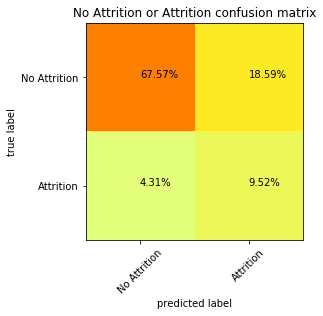

In [76]:
plot_confusion_matrix(y_test, y_pred)

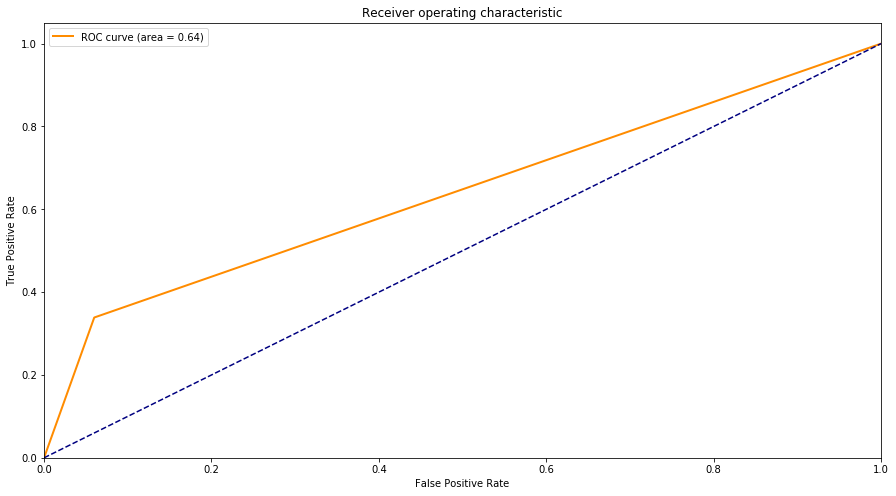

In [77]:
plot_roc_curve(y_pred, y_test)

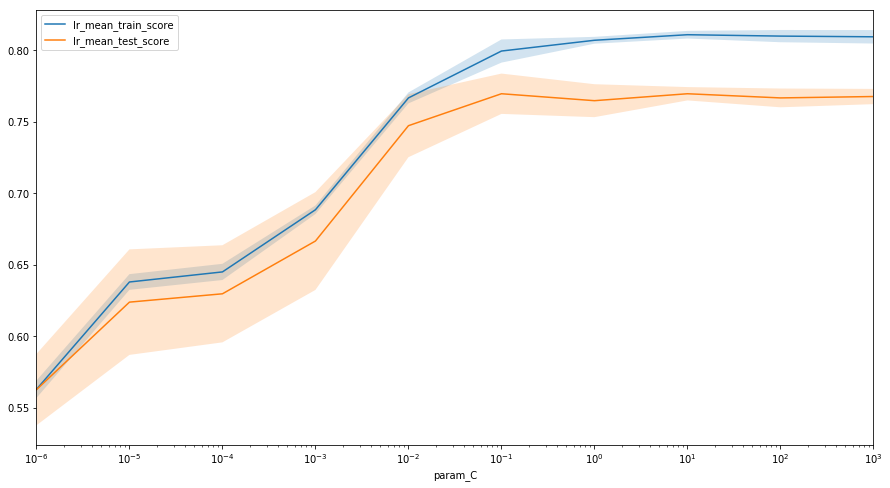

In [78]:
plot_train_test_scores(cv_results, 'logisticregression')

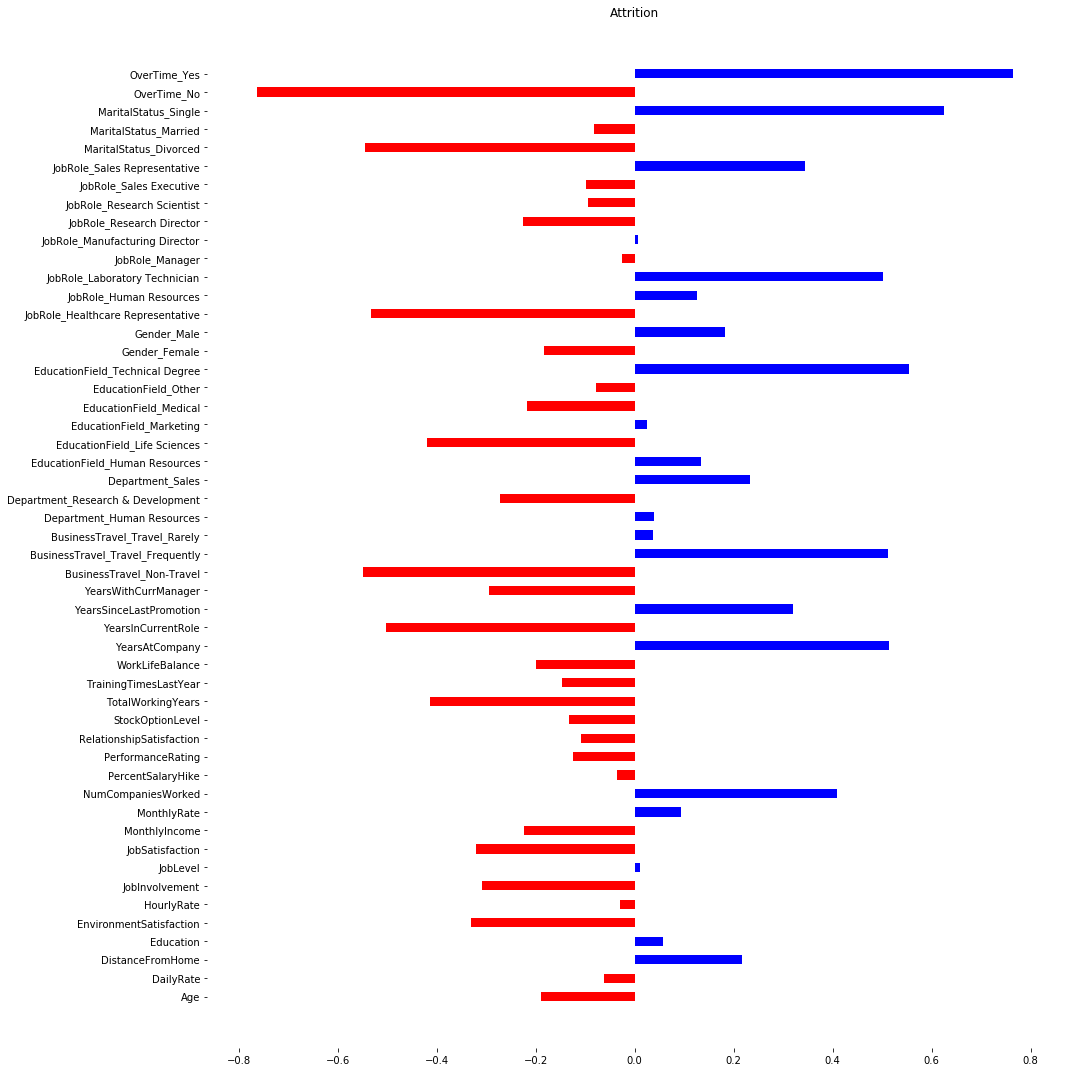

In [79]:
plot_feature_importance(best_model, X_test)

The following are the important features which correlates to the attrition negatively and positively.

Features positively correlated to the attrition.

- Males tend to leave the company frequently.
- Single people tend to leave the company frequently.
- Overtime employees are more likely to leave the company first.
- People who travel often tend to be more likely to leave the company.
- The higher the years since the last promotion, the more people are likely to quit.
- Sales Representative, Laboratory Technician, and Technical Degree employees likely to leave the company.
- The higher the years since the last promotion, the longer the employee works in the company, the more companies an employee has worked, and the greater the company's distance from home, the more people are likely to quit.

Features negatively correlated to the attrition.

- Non-travel employees tend to stay in the company.
- Healthcare representative employees are likely to stay in the company.
- Divorced employees tend to stay in the company compare to single and married employees.
- The employees who studied Life Sciences and Research & Development tend to stay in the company.
- Non-overtime employees tend to stay in the company and are negatively correlated with attrition.
- The higher the monthly income, and monthly rate, the more the employees tend to stay in the company.
- The higher the job satisfaction, environment satisfaction, and Job involvement, the more the employees tend to stay in the company.

##### <a> 4.2.2 Linear SVC </a>

In [80]:
start_time = time.time()
param_grid = {"C":np.logspace(-6, 3, 10)}
best_params, best_score, best_model, cv_results = grid_search_cv(X_train,
                                                                 y_train,
                                                                 'svm',
                                                                 param_grid,
                                                                 'balanced')
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9068200588226318 seconds ---


In [81]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best params: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.822
best params: {'C': 10.0}
test-set score: 0.805


In [82]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test['Label'] != y_pred).sum()
accuracy = metrics.accuracy_score(y_test['Label'], y_pred)
print('misclassified datapoints: {} \n'.format(count_misclassified))
print('accuracy: {:.3f} \n '.format(accuracy))
print('the classification report: \n {}'.format(classification_report(y_test['Label'], y_pred)))

misclassified datapoints: 86 

accuracy: 0.805 
 
the classification report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       380
           1       0.36      0.52      0.43        61

    accuracy                           0.80       441
   macro avg       0.64      0.69      0.65       441
weighted avg       0.84      0.80      0.82       441



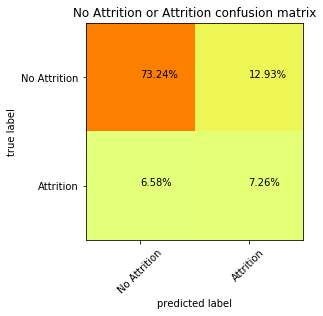

In [83]:
plot_confusion_matrix(y_test, y_pred)

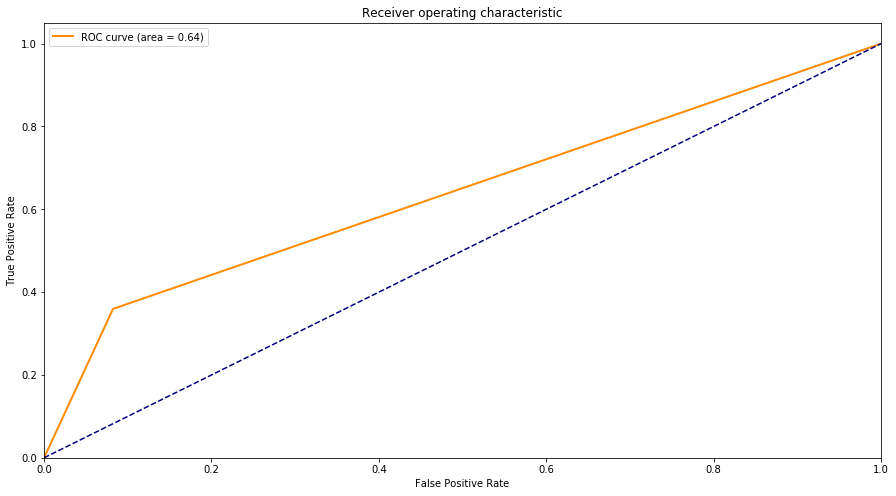

In [84]:
plot_roc_curve(y_pred, y_test)

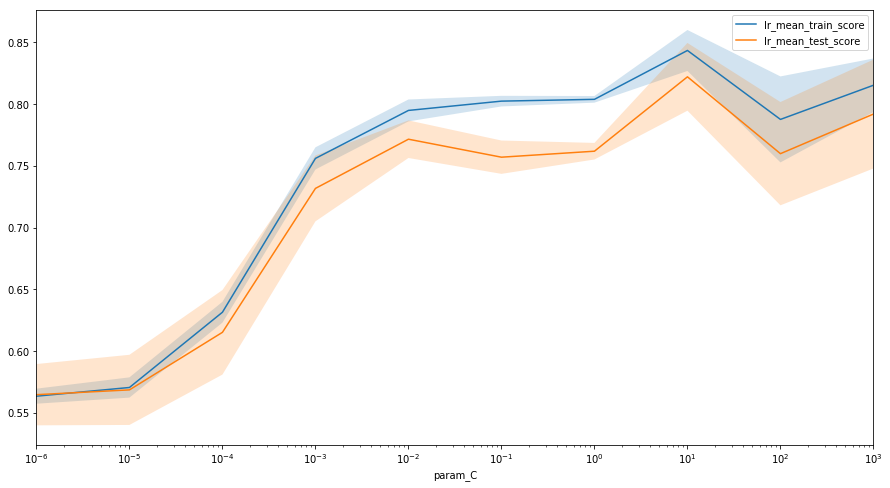

In [85]:
plot_train_test_scores(cv_results, 'svm')

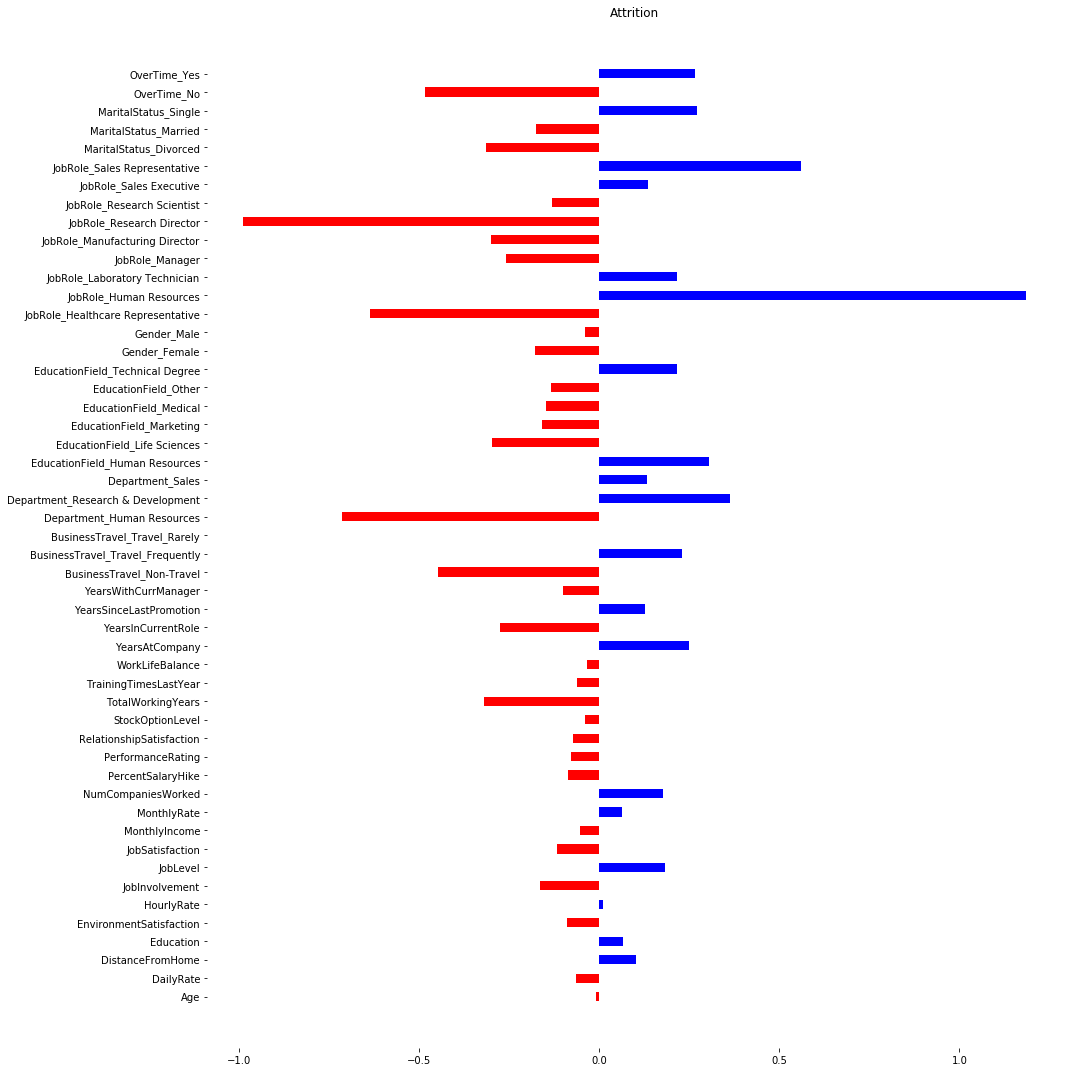

In [86]:
plot_feature_importance(best_model, X_test)

##### <a> 4.2.3 Random Forest classifier </a>

In [87]:
start_time = time.time()
param_grid = {'bootstrap': [True],
              'min_samples_leaf': [2, 4, 8],
              'min_samples_split': [2, 4, 8, 16],
              'n_estimators': [100, 150, 200, 300]}
best_params, best_score, best_model, cv_results = grid_search_cv(X_train,
                                                                 y_train,
                                                                 'randomforest',
                                                                 param_grid,
                                                                 'balanced')
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   37.0s finished


--- 37.343015909194946 seconds ---


In [88]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best params: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.864
best params: {'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
test-set score: 0.871


In [89]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test['Label'] != y_pred).sum()
accuracy = metrics.accuracy_score(y_test['Label'], y_pred)
print('misclassified datapoints: {} \n'.format(count_misclassified))
print('accuracy: {:.3f} \n '.format(accuracy))
print('the classification report: \n {}'.format(classification_report(y_test['Label'], y_pred)))

misclassified datapoints: 57 

accuracy: 0.871 
 
the classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       380
           1       0.56      0.33      0.41        61

    accuracy                           0.87       441
   macro avg       0.73      0.64      0.67       441
weighted avg       0.85      0.87      0.86       441



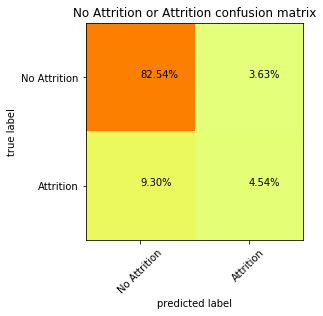

In [90]:
plot_confusion_matrix(y_test, y_pred)

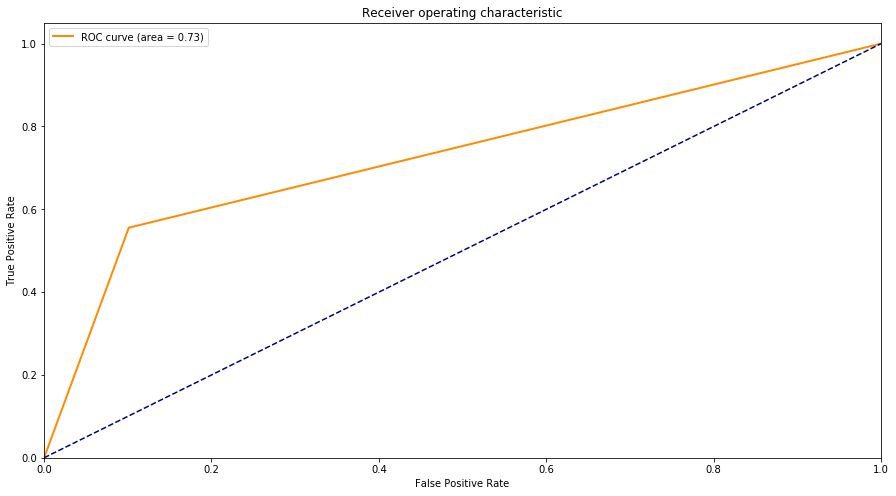

In [91]:
plot_roc_curve(y_pred, y_test)

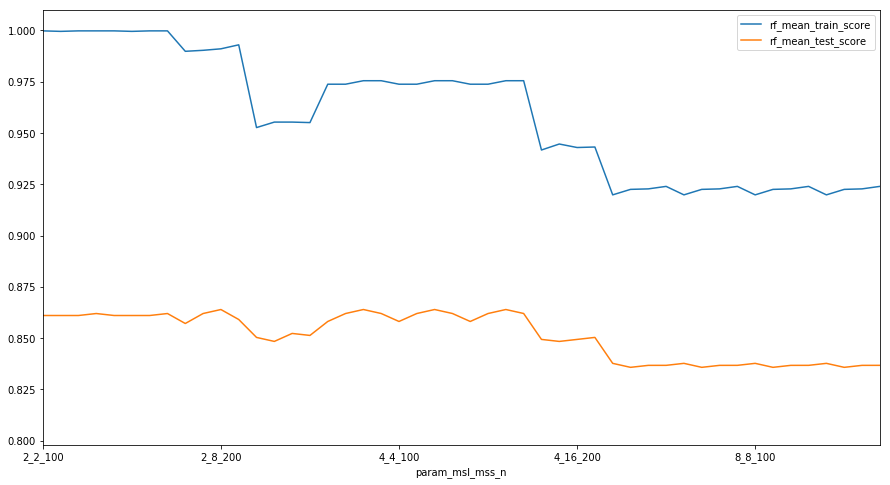

In [92]:
plot_train_test_scores(cv_results, 'randomforest')

Top features based on randomforest classifier.

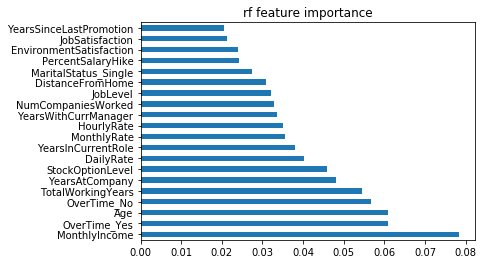

In [93]:
feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh', title='rf feature importance')

Feature importance using SHAP.

SHAP can provide positive and negative relationship between target and features.

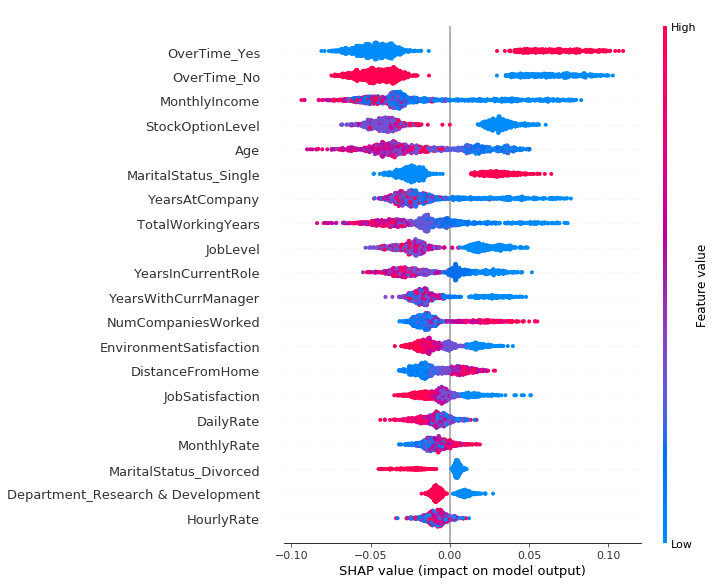

In [94]:
shap_values = shap.TreeExplainer(best_model).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

- <b>Feature importance:</b> Variables are ranked in descending order.
- <b>Impact:</b> The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- <b>Original value:</b> Color shows whether that variable is high (in red) or low (in blue) for that observation.
- <b>Correlation:</b> OverTimeYes has high and positive effect on the attrition. Similarly, MaritalStatus_Single also has positive effect on the attrition. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.

###### <a> 4.2.4 Logistic Regression - oversampling </a>

Let us train the logistic classifier model with oversampling train data set and validate the results on test data set.

In [99]:
start_time = time.time()
param_grid = {"C":np.logspace(-6, 3, 10)}
best_params, best_score, best_model, cv_results = grid_search_cv(X_train_oversample, 
                                                                 y_train_oversample,
                                                                 'LogisticRegression',
                                                                 param_grid,
                                                                 None)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.0307199954986572 seconds ---


In [100]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best params: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test, y_test)))

best mean cross-validation score: 0.785
best params: {'C': 1.0}
test-set score: 0.753


In [101]:
y_pred = best_model.predict(X_test)
count_misclassified = (y_test['Label'] != y_pred).sum()
accuracy = metrics.accuracy_score(y_test['Label'], y_pred)
print('misclassified datapoints: {} \n'.format(count_misclassified))
print('accuracy: {:.3f} \n '.format(accuracy))
print('the classification report: \n {}'.format(classification_report(y_test['Label'], y_pred)))

misclassified datapoints: 109 

accuracy: 0.753 
 
the classification report: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       380
           1       0.31      0.66      0.42        61

    accuracy                           0.75       441
   macro avg       0.62      0.71      0.63       441
weighted avg       0.85      0.75      0.78       441



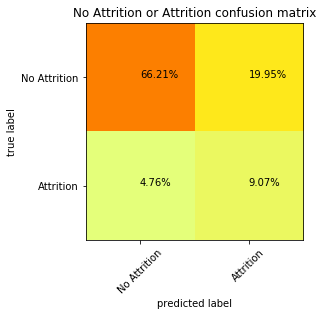

In [102]:
plot_confusion_matrix(y_test, y_pred)

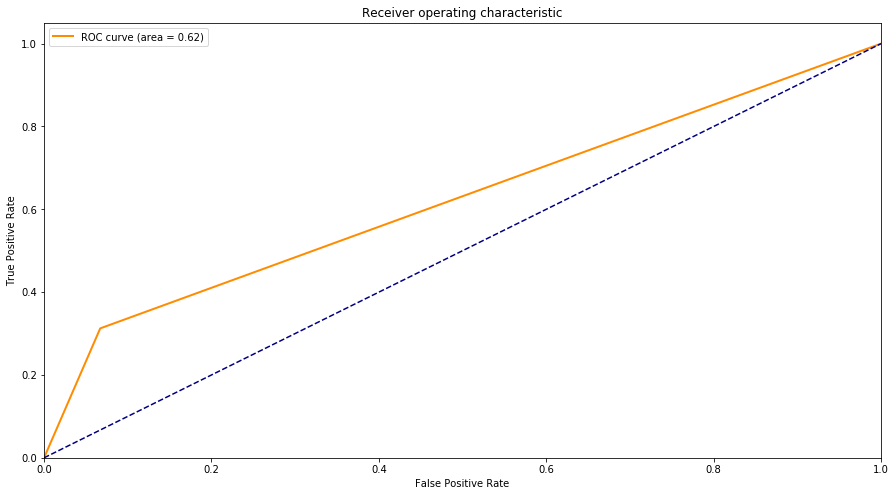

In [103]:
plot_roc_curve(y_pred, y_test)

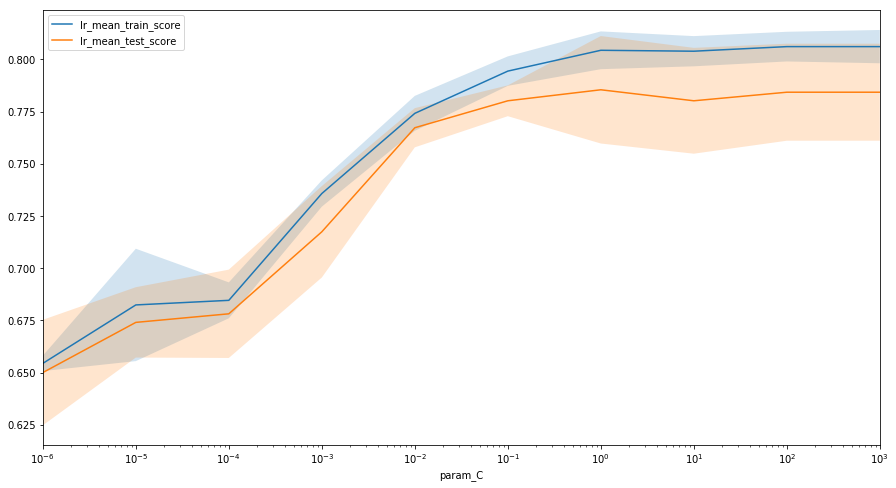

In [104]:
plot_train_test_scores(cv_results, 'logisticregression')

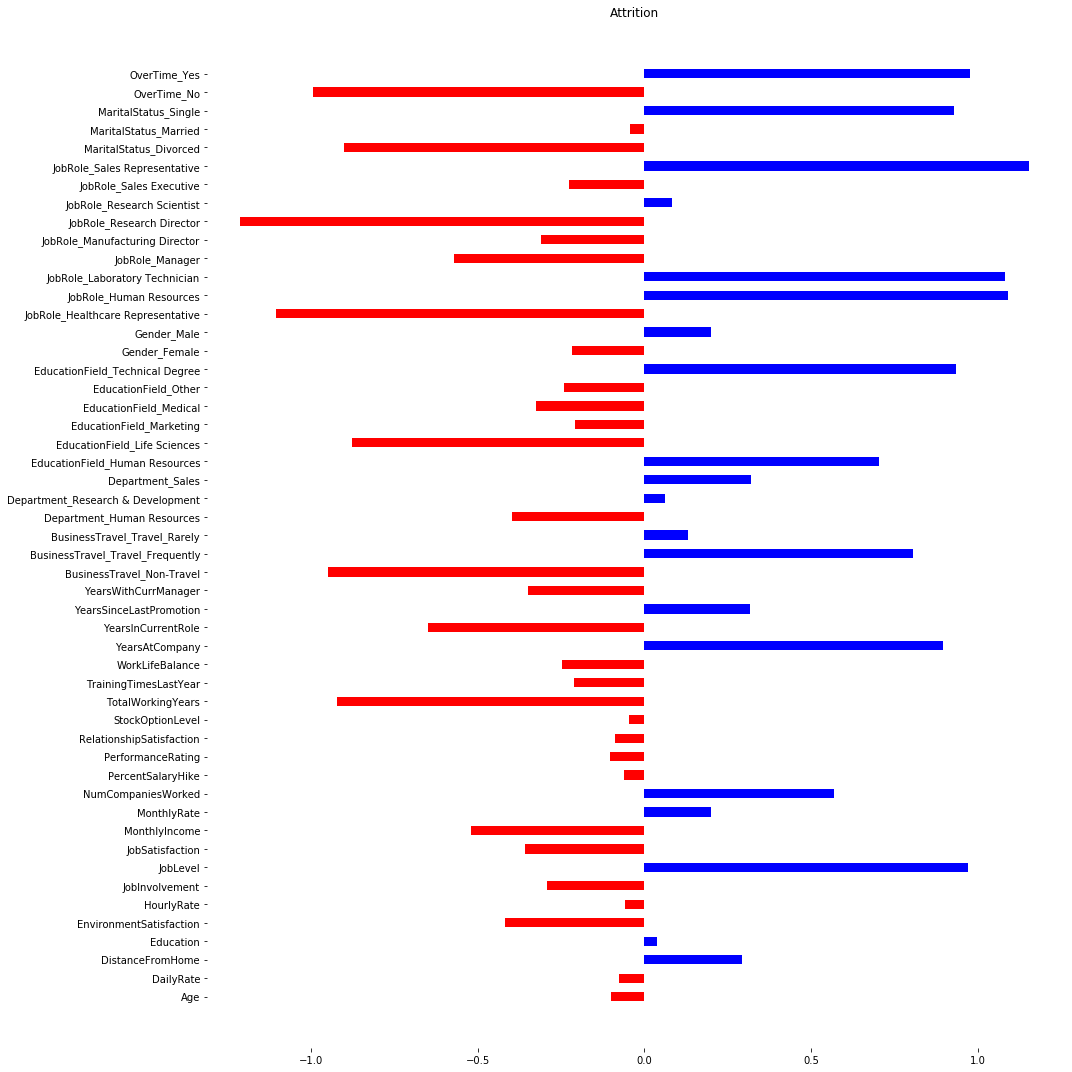

In [105]:
plot_feature_importance(best_model, X_test)

###### <a> 4.2.5 Logistic Regression - polynomial features </a>

Let us train the logistic classifier model with polynomial train data set and validate the results on test data set.

In [106]:
start_time = time.time()
param_grid = {"C":np.logspace(-6, 3, 10)}
best_params, best_score, best_model, cv_results = grid_search_cv(X_train_poly, 
                                                                 y_train,
                                                                 'LogisticRegression',
                                                                 param_grid,
                                                                 'balanced')
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.451617002487183 seconds ---


In [107]:
print('best mean cross-validation score: {:.3f}'.format(best_score))
print('best params: {}'.format(best_params))
print('test-set score: {:.3f}'.format(best_model.score(X_test_poly, y_test)))

best mean cross-validation score: 0.813
best params: {'C': 0.01}
test-set score: 0.825


In [108]:
y_pred = best_model.predict(X_test_poly)
count_misclassified = (y_test['Label'] != y_pred).sum()
accuracy = metrics.accuracy_score(y_test['Label'], y_pred)
print('misclassified datapoints: {} \n'.format(count_misclassified))
print('accuracy: {:.3f} \n '.format(accuracy))
print('the classification report: \n {}'.format(classification_report(y_test['Label'], y_pred)))

misclassified datapoints: 77 

accuracy: 0.825 
 
the classification report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       380
           1       0.40      0.51      0.45        61

    accuracy                           0.83       441
   macro avg       0.66      0.69      0.67       441
weighted avg       0.85      0.83      0.83       441



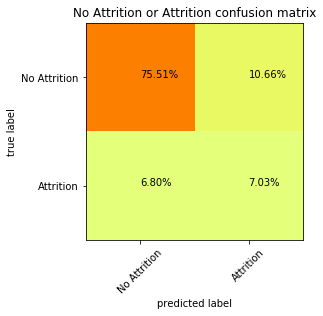

In [109]:
plot_confusion_matrix(y_test, y_pred)

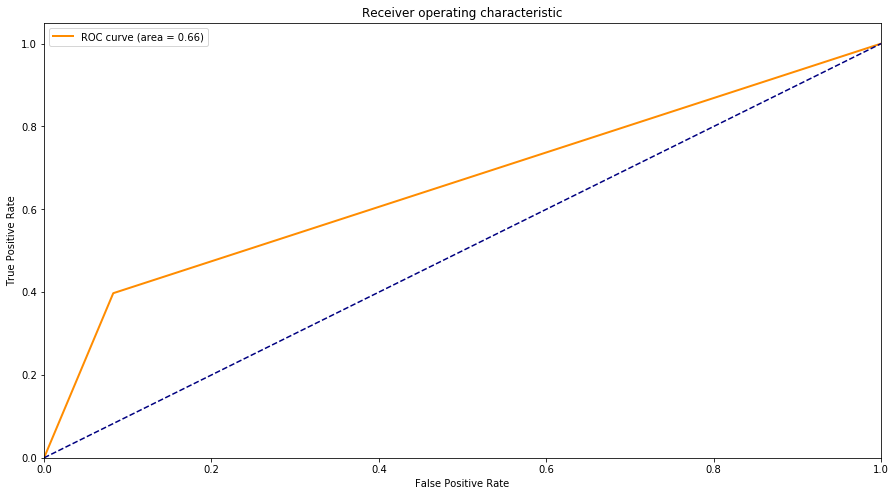

In [110]:
plot_roc_curve(y_pred, y_test)

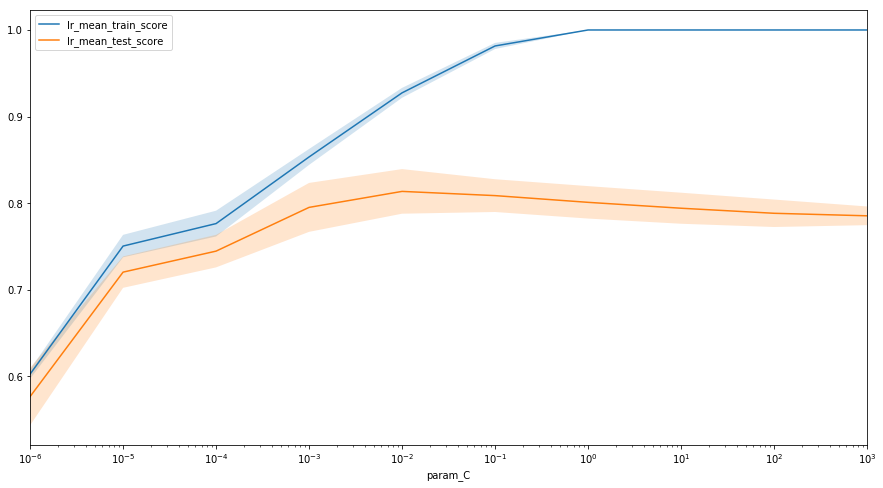

In [111]:
plot_train_test_scores(cv_results, 'logisticregression')

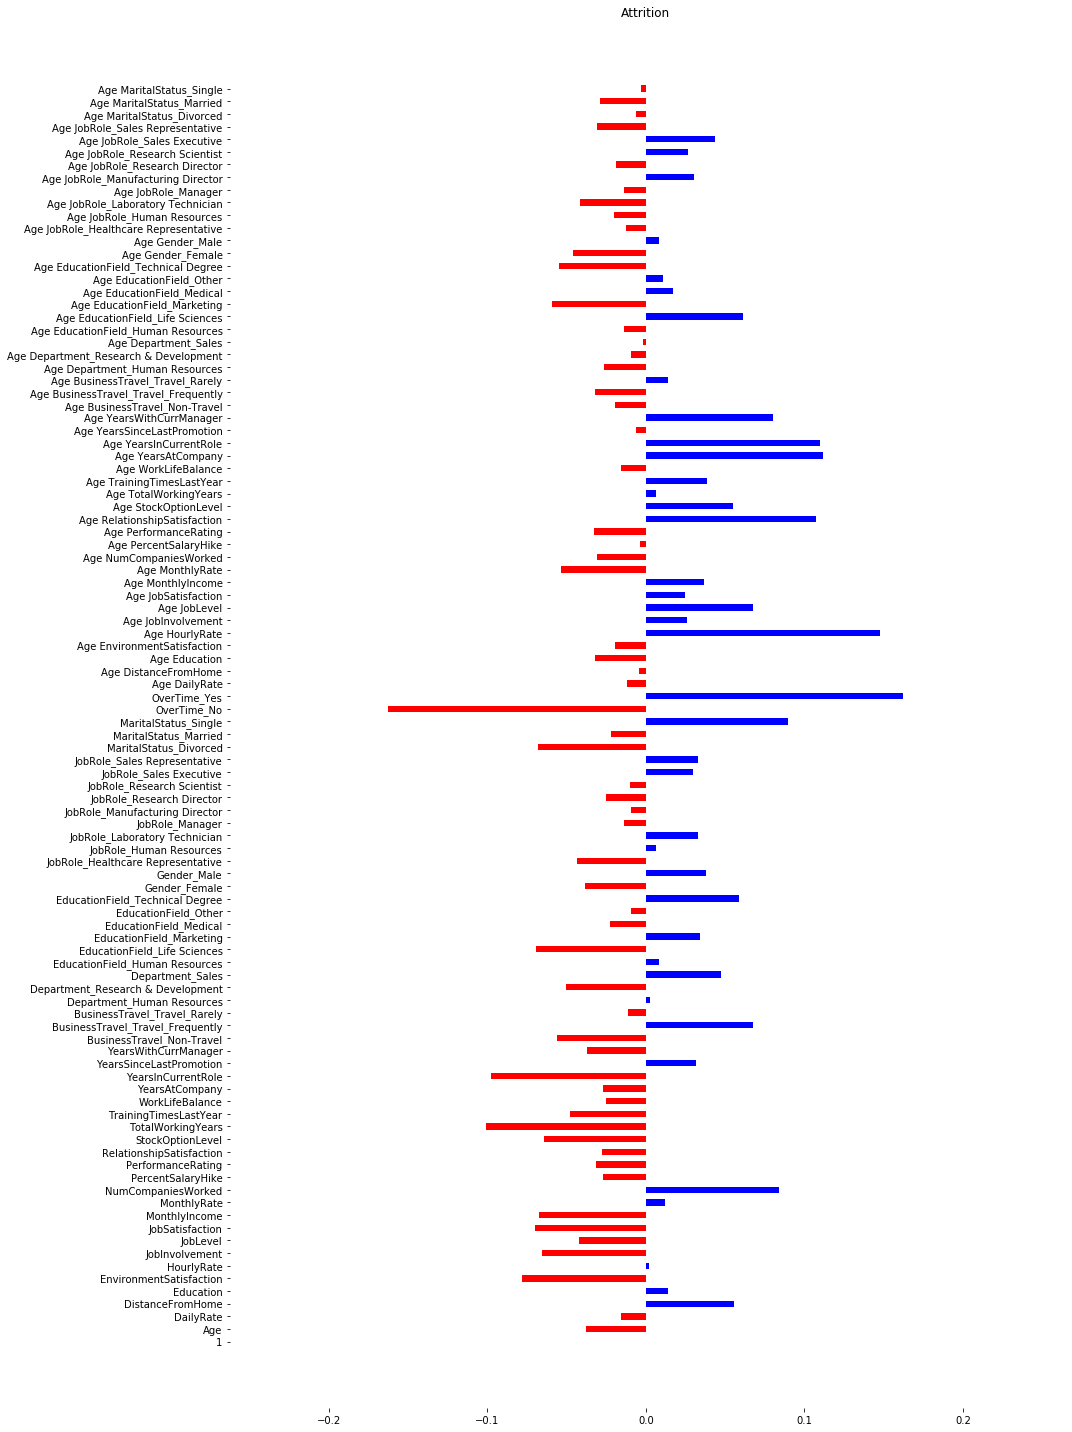

In [112]:
plot_feature_importance_poly(best_model, X_test_poly)

##### <a> 4.3. Clustering </a>

In [113]:
def silhouette_plot(X, cluster_labels, ax=None):
    """ plot silhoutte"""
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.tab10 if len(labels) <= 10 else plt.cm.tab20
    for i in labels:
        ith_cluster_silhouette_values = silhouette_scores[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

###### <a>4.3.1 Scale the numerical features </a>

Scaling the training and test features to improve the performance and also brings the feature scale further close to each other.

In [114]:
X_data = X.copy(deep=True)
numerical_features = X_data.select_dtypes(exclude=['object','category','bool']).columns.tolist()

In [115]:
scaler = StandardScaler()
scaler.fit(X_data[numerical_features])
X_data[numerical_features] = scaler.transform(X_data[numerical_features])

##### <a>4.3.2 Create dummies for categorical features </a>

In [116]:
X_data= pd.get_dummies(X_data)
feature_cols = X_data.columns
X_data.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.446350   0.742527         -1.010909  -0.891688                -0.660531   
1  1.322365  -1.297775         -0.147150  -1.868426                 0.254625   
2  0.008343   1.414363         -0.887515  -0.891688                 1.169781   
3 -0.429664   1.461466         -0.764121   1.061787                 1.169781   
4 -1.086676  -0.524295         -0.887515  -1.868426                -1.575686   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0    1.383138        0.379672 -0.057788         1.153254      -0.108350   
1   -0.240677       -1.026167 -0.057788        -0.660853      -0.291719   
2    1.284725       -1.026167 -0.961486         0.246200      -0.937654   
3   -0.486709        0.379672 -0.961486         0.246200      -0.763634   
4   -1.274014        0.379672 -0.961486        -0.660853      -0.644858   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0     0.726020            2.125136          -1.150554          -0.426230   
1     1.488876           -0.678049           2.129306           2.346151   
2    -1.674841            1.324226          -0.057267          -0.426230   
3     1.243211           -0.678049          -1.150554          -0.426230   
4     0.325900            2.525591          -0.877232          -0.426230   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                 -1.584178         -0.932014          -0.421642   
1                  1.191438          0.241988          -0.164511   
2                 -0.658973         -0.932014          -0.550208   
3                  0.266233         -0.932014          -0.421642   
4                  1.191438          0.241988          -0.678774   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.171982        -2.493820       -0.164613           -0.063296   
1               0.155707         0.338096        0.488508            0.764998   
2               0.155707         0.338096       -1.144294           -1.167687   
3               0.155707         0.338096        0.161947            0.764998   
4               0.155707         0.338096       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                -0.679146              0.245834                          0   
1                -0.368715              0.806541                          0   
2                -0.679146             -1.155935                          0   
3                 0.252146             -1.155935                          0   
4                -0.058285             -0.595227                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1 

##### <a>4.3.4 Normalize the data points </a>

In [117]:
transformer = Normalizer().fit(X_data)
X_data_transform = transformer.transform(X_data)

###### <a> 4.3.1 K-MEANS </a>

<b> K based on elbow method </b>

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. Inertia makes the assumption that clusters are convex and isotropic. Below, we apply K-Means clustering with different k values and capture the error. Error is defined as the sum of the squared distance between each member of the cluster and its centroid.

Text(0, 0.5, 'Inertia')

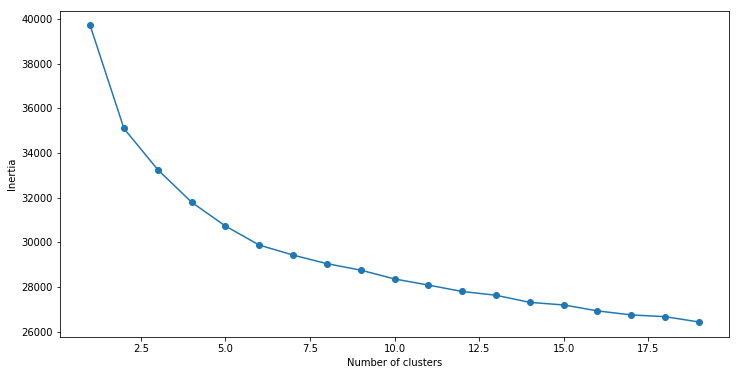

In [118]:
error = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(X_data[feature_cols])
    error.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'error':error})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['error'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Based on the plot above, the k value lies somewhere between 5 and 8. We will cluster the dataset with 6.

<i> <b> K-MEANS with 6 clusters </b> </i>

In [119]:
k = 6
kmeans = KMeans(n_jobs = -1, n_clusters = k, random_state=42)
kmeans.fit(X_data[feature_cols])
pred = kmeans.predict(X_data[feature_cols])
X_data['cluster'] = pred
print('the cluster distribution: \n{}'.format(X_data.cluster.value_counts()))

the cluster distribution: 
2    386
4    329
5    321
1    189
3    130
0    115
Name: cluster, dtype: int64


Apply PCA (dimension reduction) for visualization.

In [120]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_data_transform)
print('The two components explains {0:.2f} of variance in the data set'.format(pca.explained_variance_ratio_.sum()))
X_data_pc = pd.DataFrame(data = components, columns = ['pc_1', 'pc_2'])
X_data_pc['cluster'] = pred

The two components explains 0.21 of variance in the data set


Visualizing the clusters

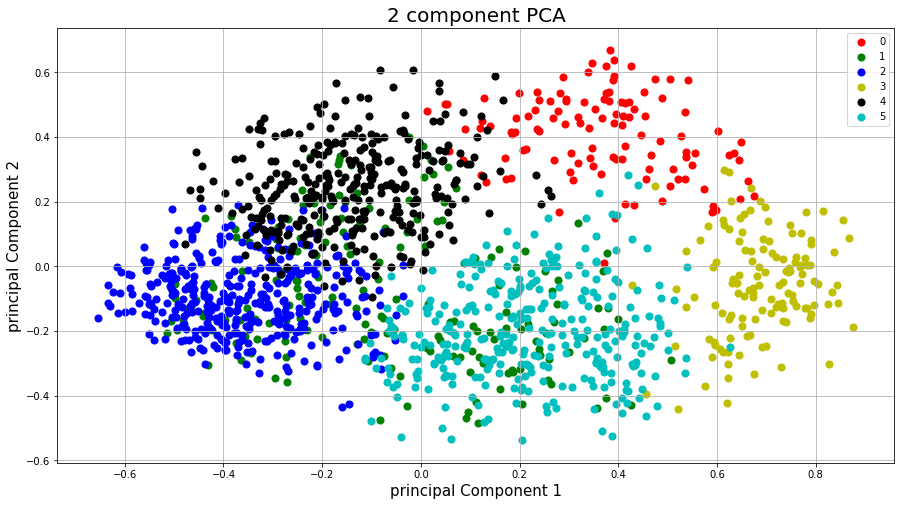

In [121]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal Component 1', fontsize = 15)
ax.set_ylabel('principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
clusters = range(k)
colors = ['r', 'g', 'b', 'y', 'k', 'c']
for cluster, color in zip(clusters, colors):
    indices = X_data_pc['cluster'] == cluster
    ax.scatter(X_data_pc.loc[indices, 'pc_1'], X_data_pc.loc[indices, 'pc_2'], c=color, s=50)
ax.legend(clusters)
ax.grid()

Based on the plot, we can see 5 distinct clusters but the cluster 1 is overlapping with other clusters.

<i> <b> Understanding k=6 clusters </b> </i>

In [122]:
X_raw = X.copy(deep=True)
X_raw['cluster'] = pred

In [123]:
cat_features = X_raw.columns[X_raw.dtypes=='object']
num_columns = X_raw.columns[(X_raw.dtypes!='bool') & (X_raw.dtypes!='object')]

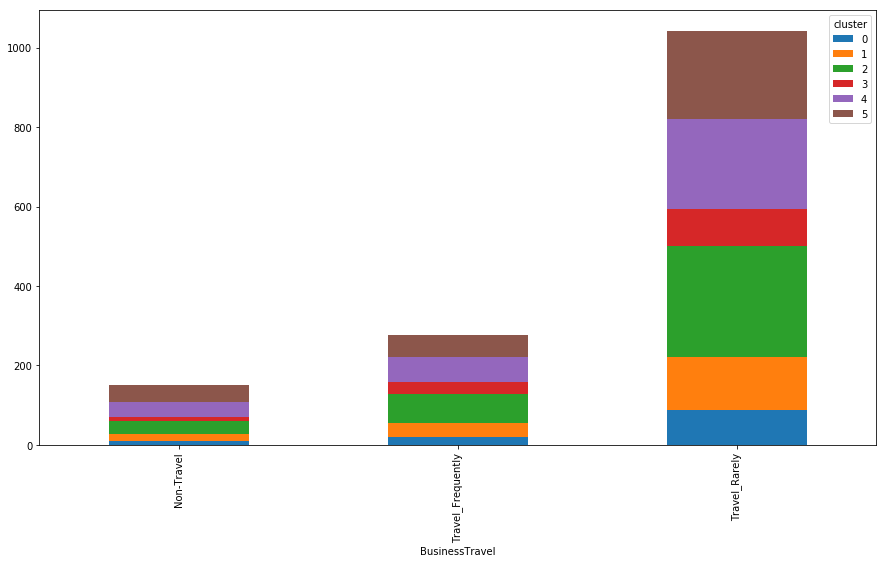

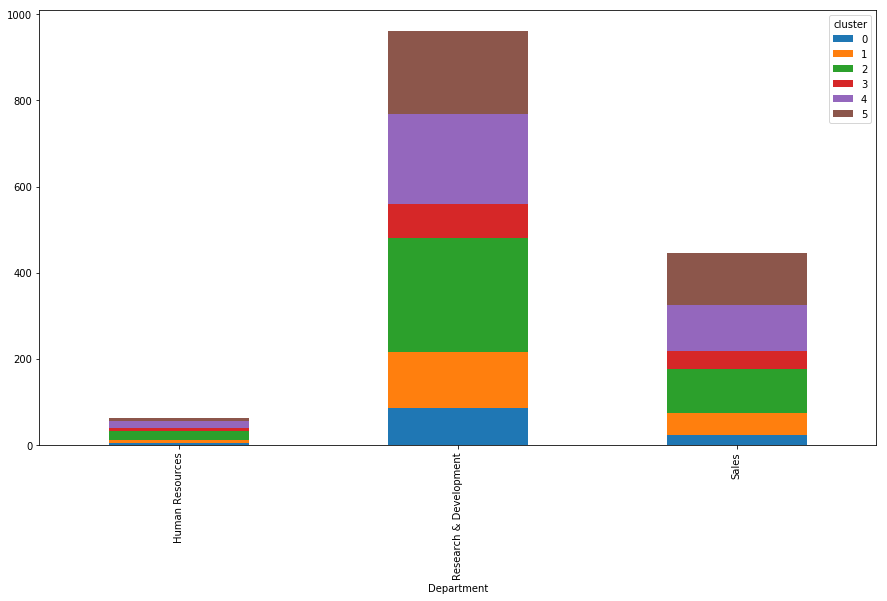

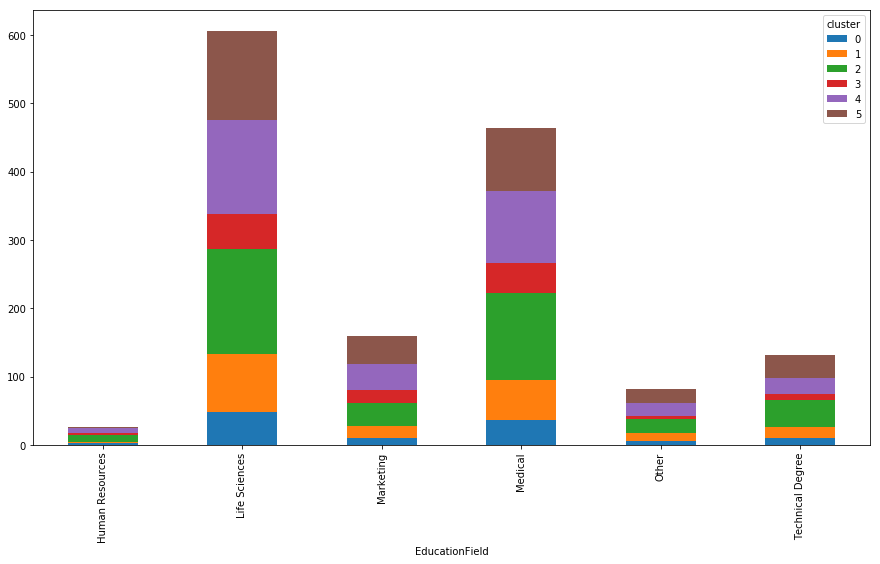

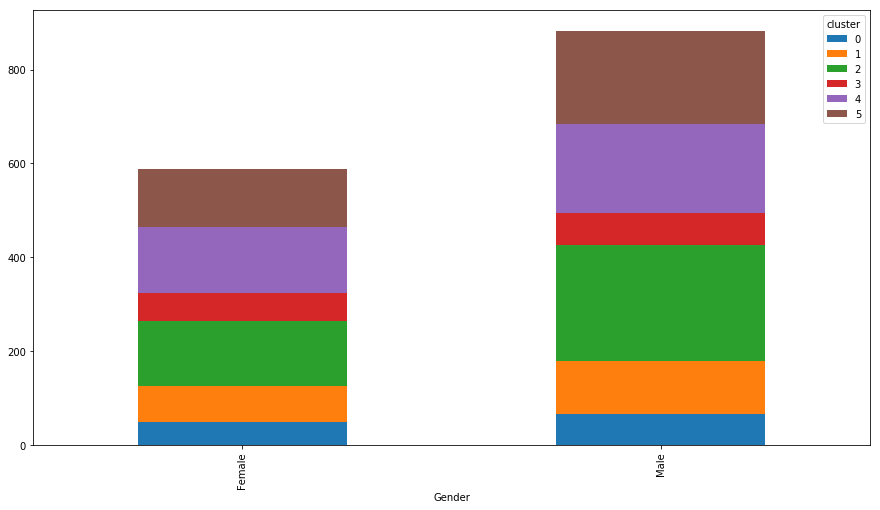

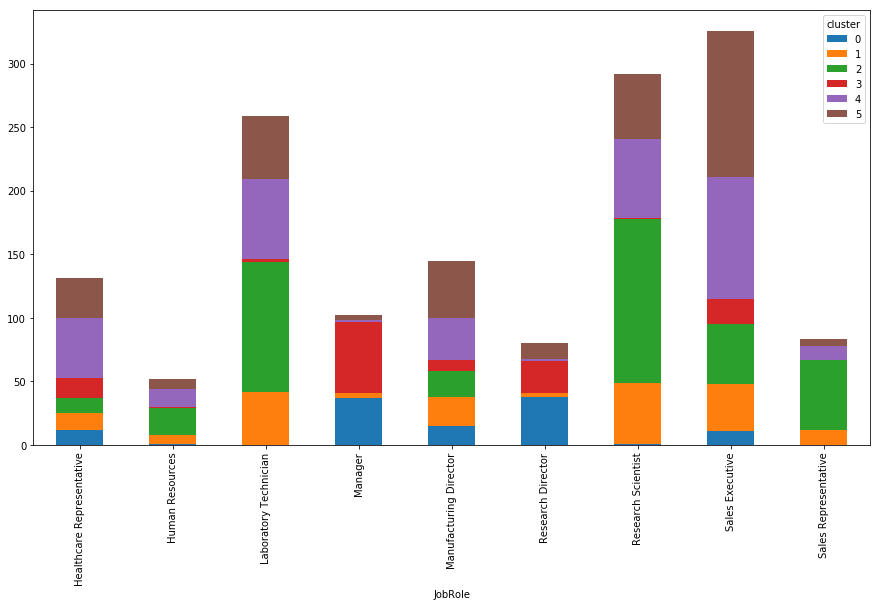

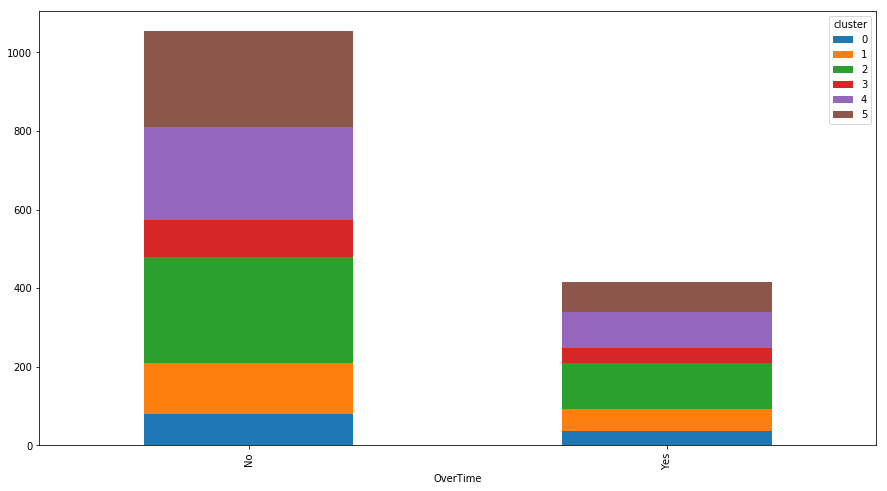

In [124]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=False)

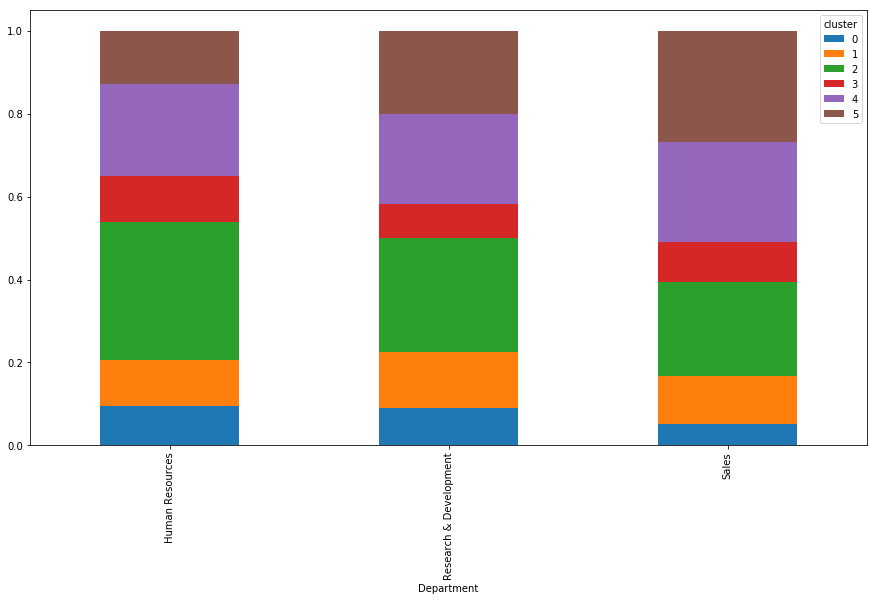

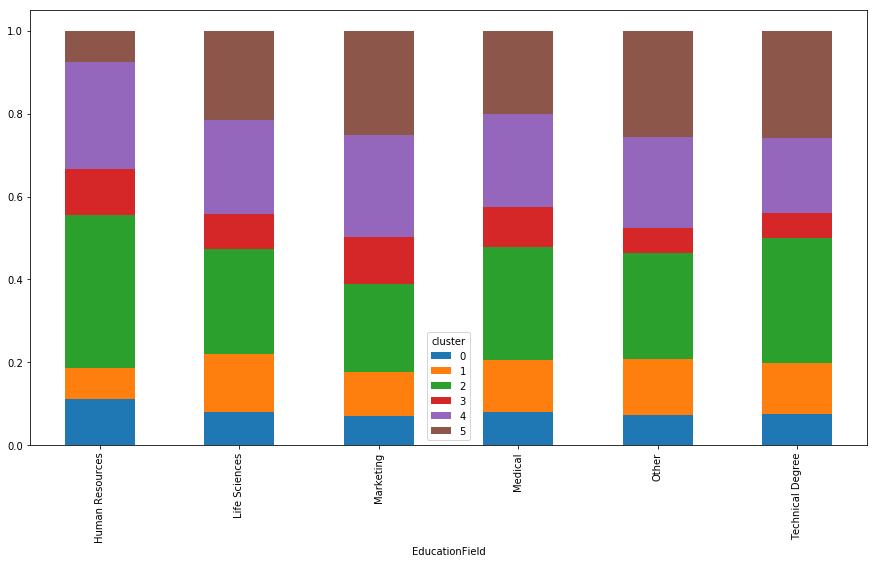

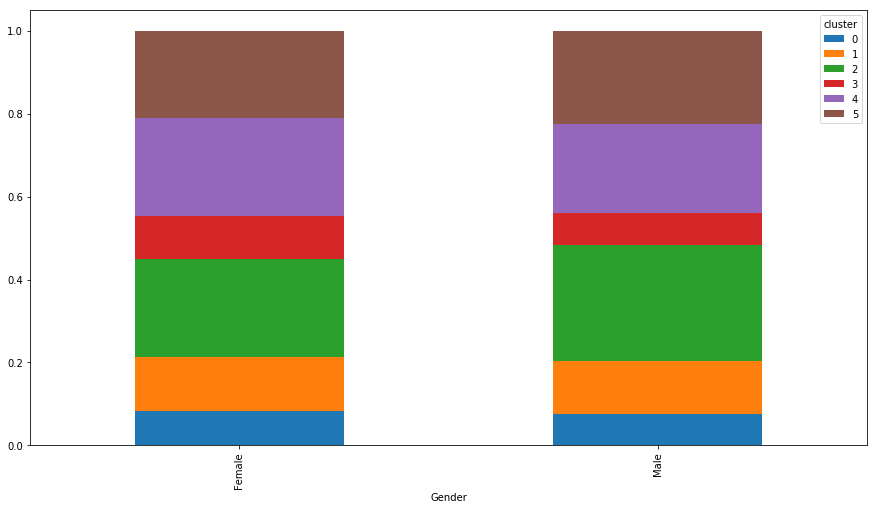

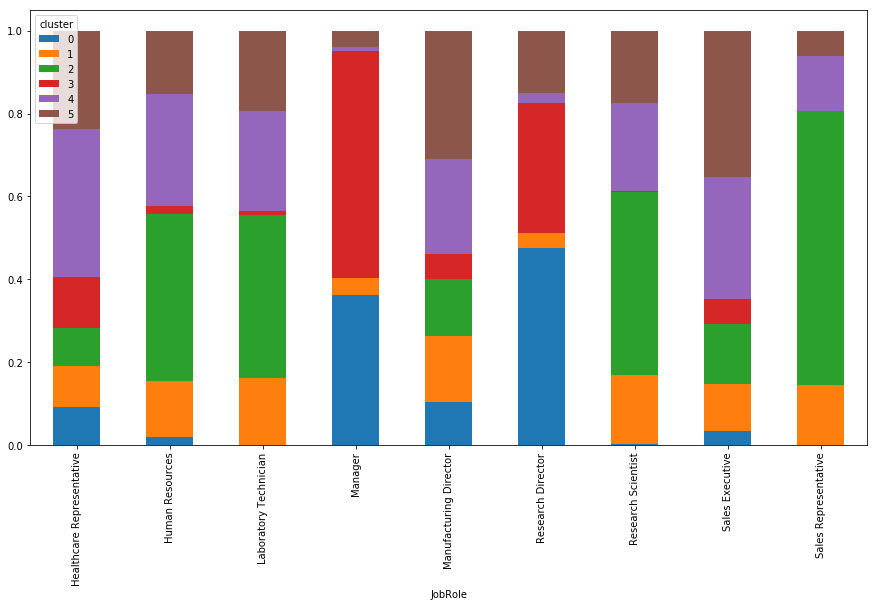

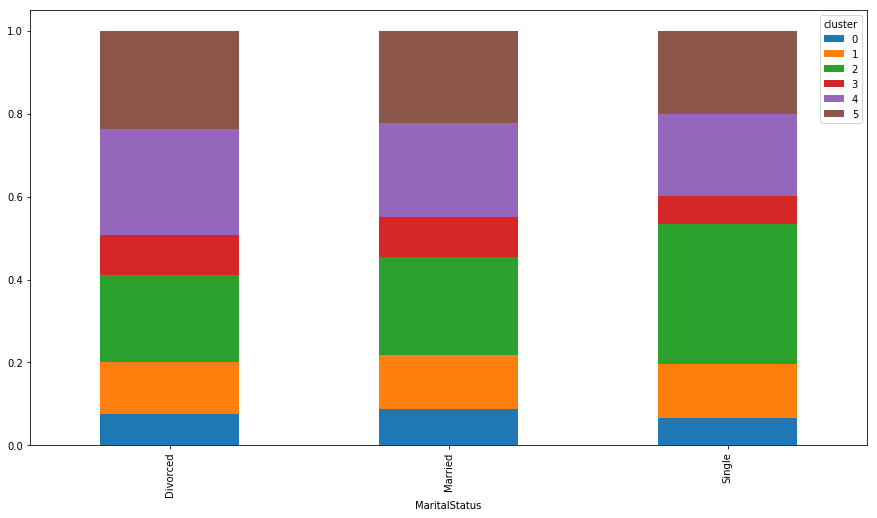

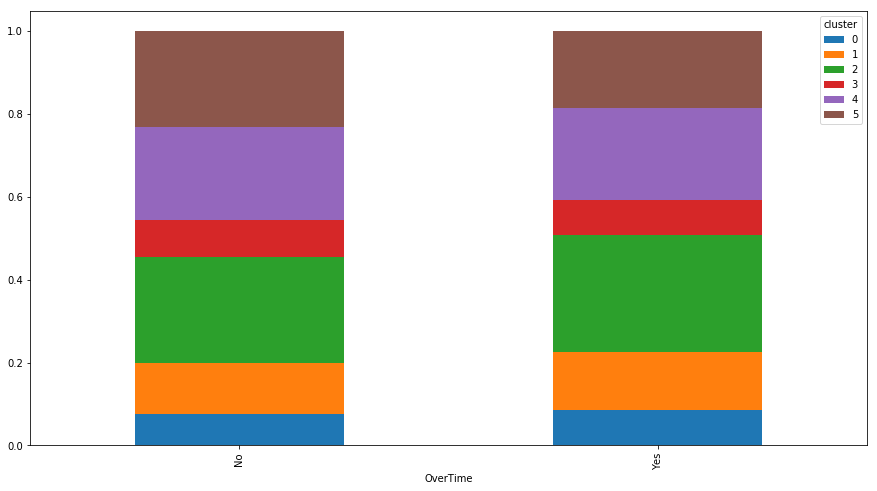

In [125]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=True)

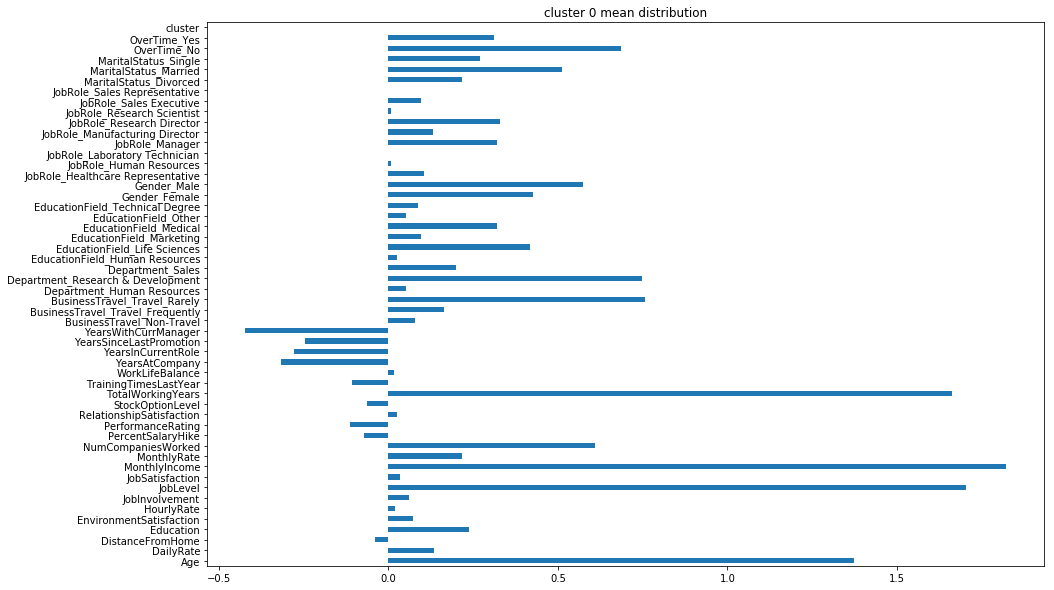

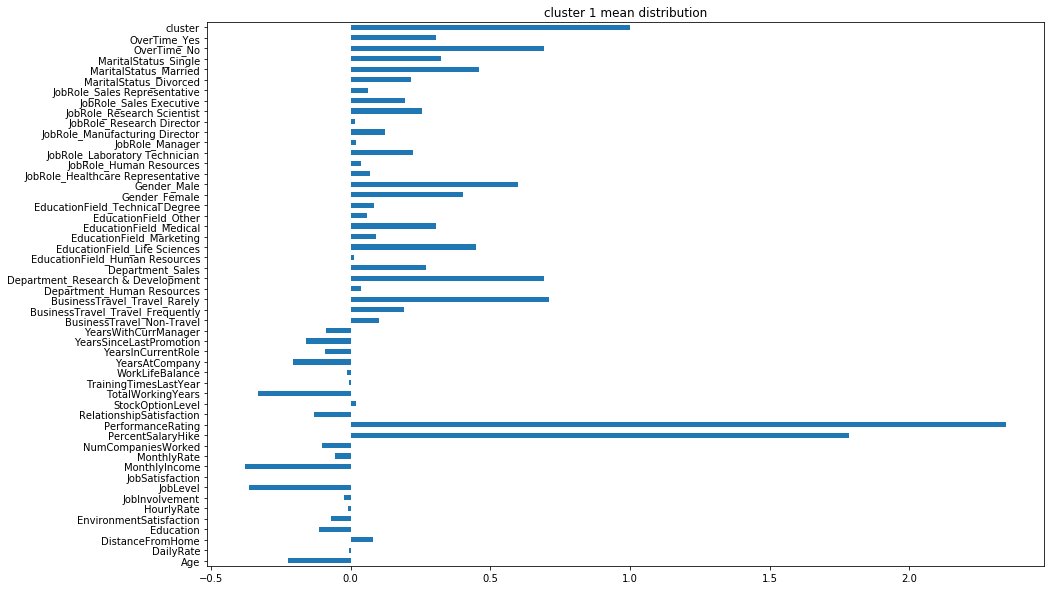

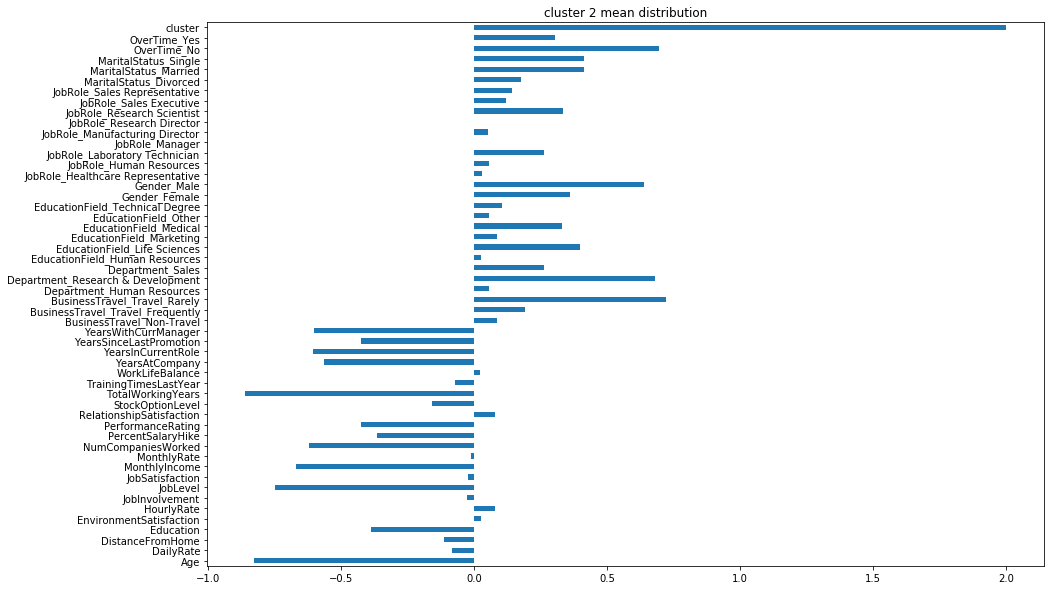

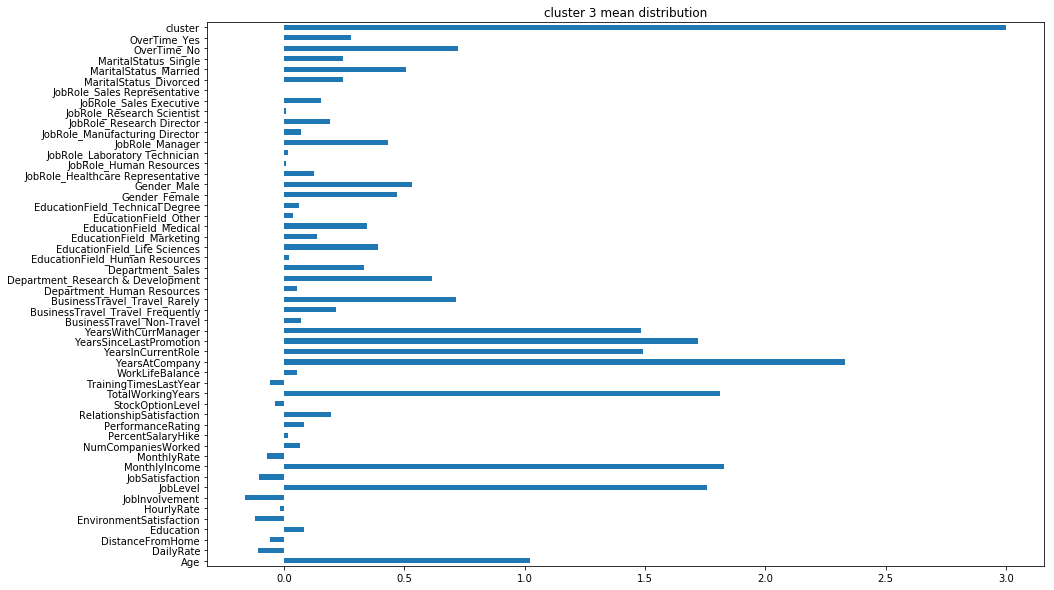

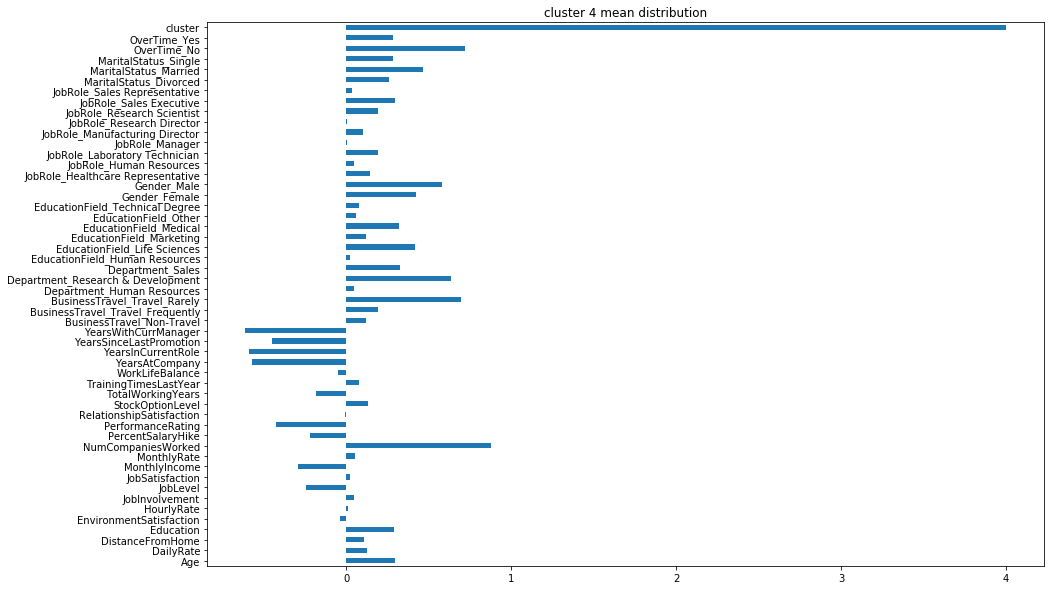

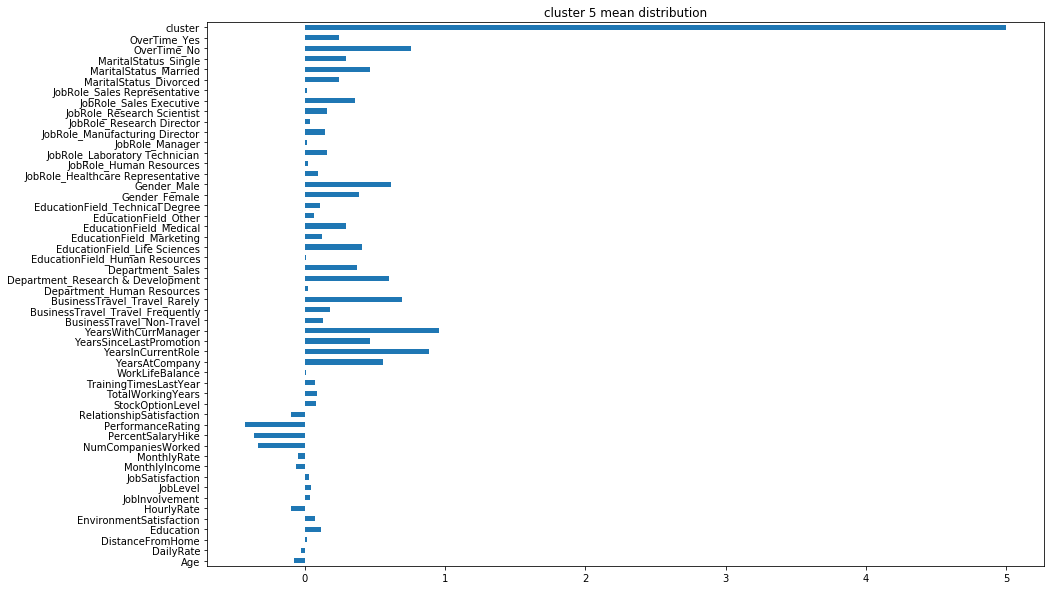

In [126]:
for cluster in range(0, 6):
    plt.figure(figsize=(15,10))
    plt.title('cluster {} mean distribution'.format(cluster))
    X_data[X_data['cluster'] == cluster].describe().T['mean'].plot(kind='barh')

- The clustering is not very specific, and the algorithm picked certain groups based on euclidean distance.

<b> K based on Silhouette Score </b>

Silhouette score is another way of evaluating the number of clusters. Lets look at the Silhouette score for different k. We will use principal components for visulization and acutal data for score.

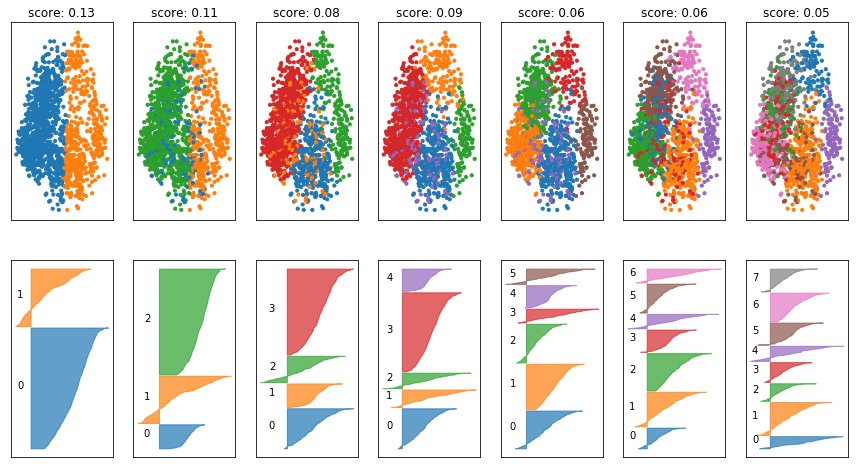

In [127]:
fig, axes = plt.subplots(2, 7, subplot_kw={'xticks': (), 'yticks':()}, figsize=(15, 8))
for ax, n_clusters in zip(axes.T, [2, 3, 4, 5, 6, 7, 8]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X_data[feature_cols])
    ax[0].scatter(X_data_pc['pc_1'], X_data_pc['pc_2'], c=plt.cm.tab10(km.labels_), s=10)
    silhouette_plot(X_data[feature_cols], km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X_data[feature_cols], km.labels_)))

With k = 2, we achieve the highest silhouette score but not that significant. So, lets build K-MEANS cluster with k = 2

<i> <b> K-MEANS with 2 clusters </b> </i>

In [128]:
k = 2
kmeans = KMeans(n_jobs = -1, n_clusters = k)
kmeans.fit(X_data[feature_cols])
pred = kmeans.predict(X_data[feature_cols])
X_data['cluster'] = pred
print('the cluster distribution: \n{}'.format(X_data.cluster.value_counts()))

the cluster distribution: 
1    995
0    475
Name: cluster, dtype: int64


Apply PCA (dimension reduction) for visualization.

In [129]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_data_transform)
print('The two components explains {0:.2f} of variance in the data set'.format(pca.explained_variance_ratio_.sum()))
X_data_pc = pd.DataFrame(data = components, columns = ['pc_1', 'pc_2'])
X_data_pc['cluster'] = pred

The two components explains 0.21 of variance in the data set


Visualizing the clusters

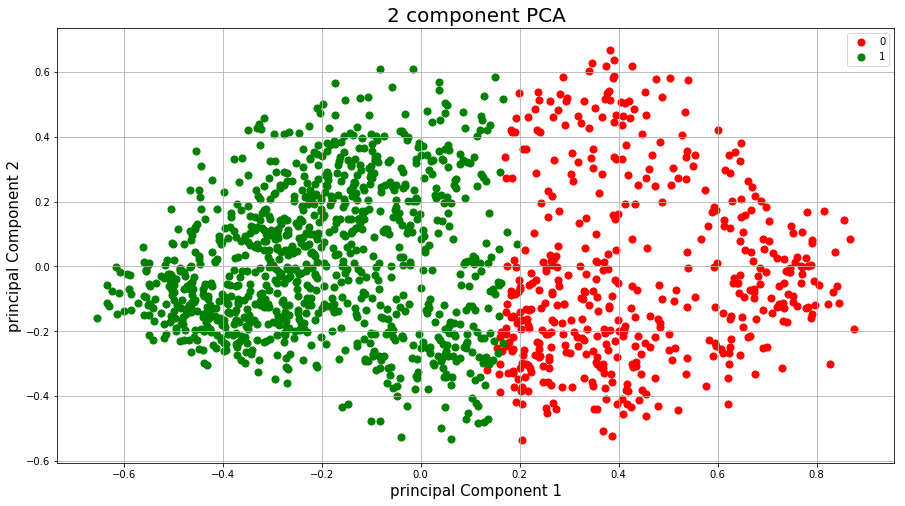

In [130]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal Component 1', fontsize = 15)
ax.set_ylabel('principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
clusters = range(k)
colors = ['r', 'g']
for cluster, color in zip(clusters, colors):
    indices = X_data_pc['cluster'] == cluster
    ax.scatter(X_data_pc.loc[indices, 'pc_1'], X_data_pc.loc[indices, 'pc_2'], c=color, s=50)
ax.legend(clusters)
ax.grid()

<i> <b> Understanding k=2 clusters </b> </i>

In [131]:
X_raw = X.copy(deep=True)
X_raw['cluster'] = pred

In [132]:
cat_features = X_raw.columns[X_raw.dtypes=='object']
num_columns = X_raw.columns[(X_raw.dtypes!='bool') & (X_raw.dtypes!='object')]

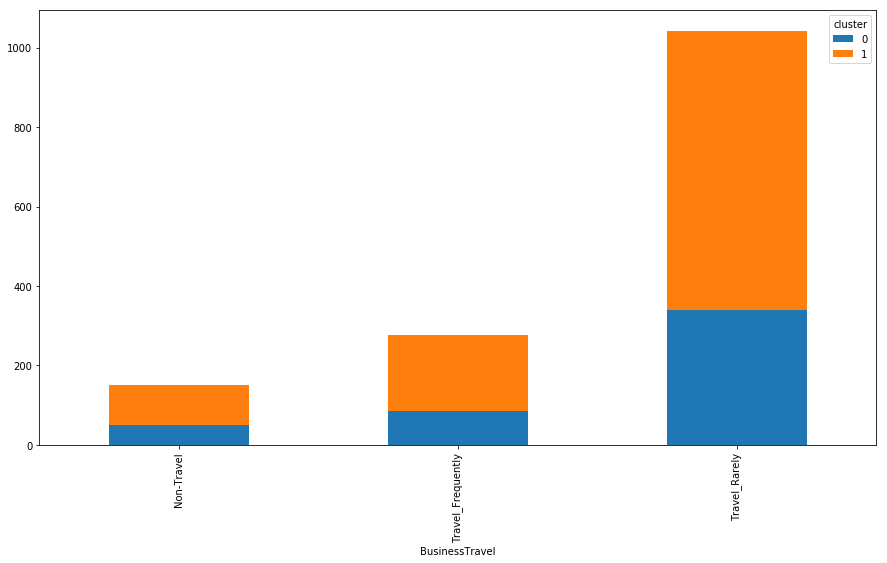

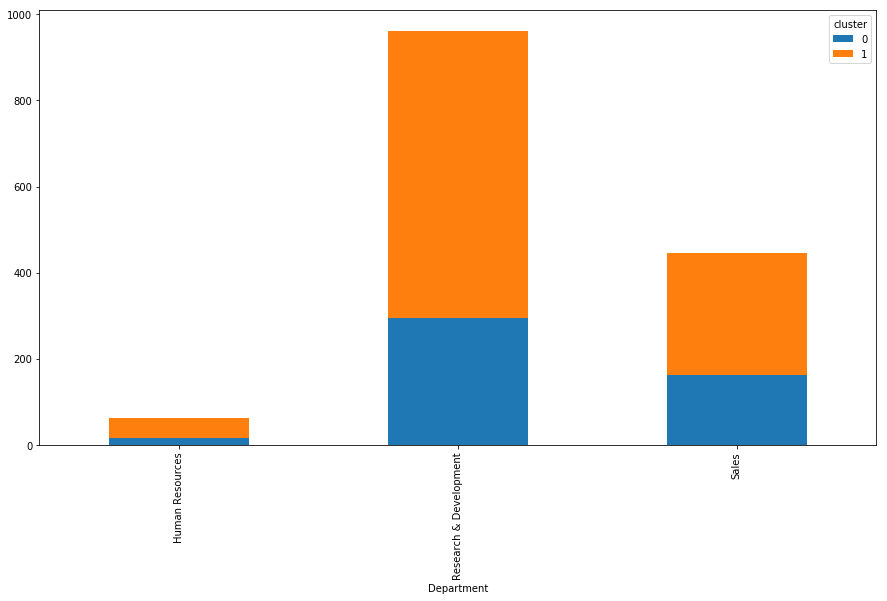

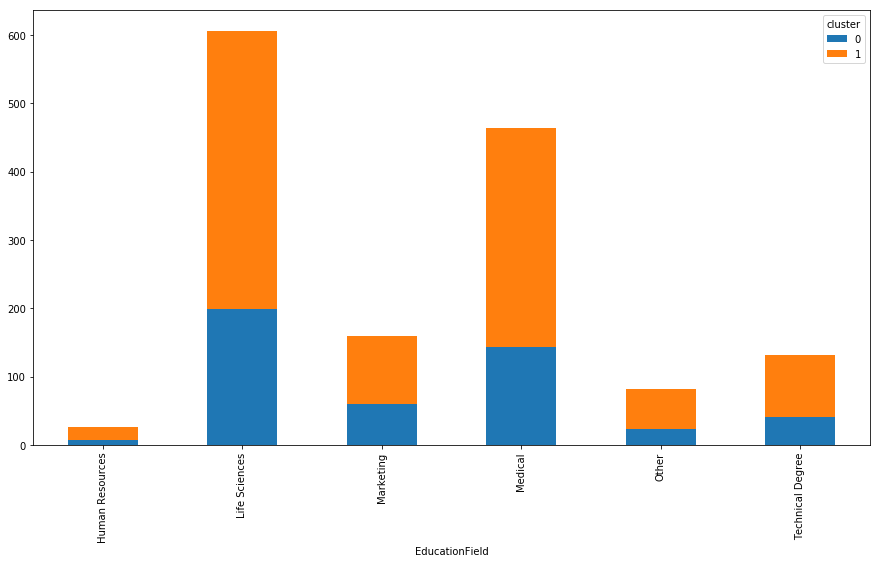

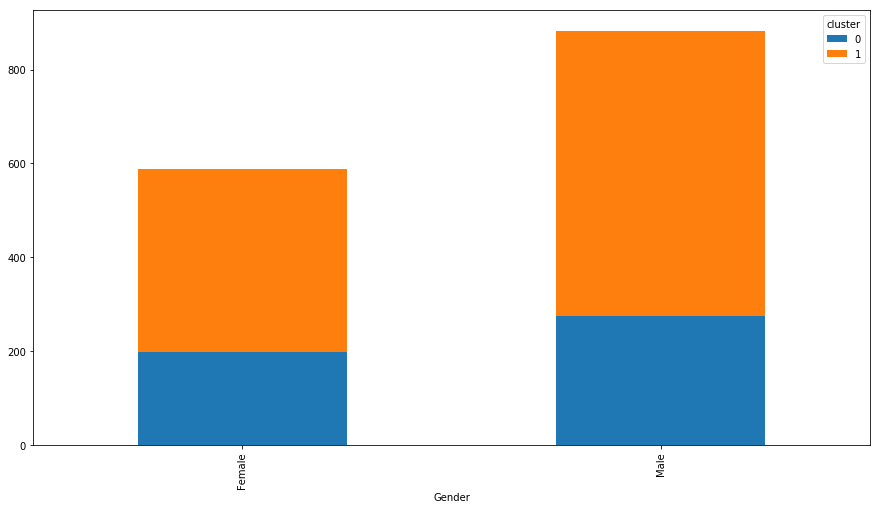

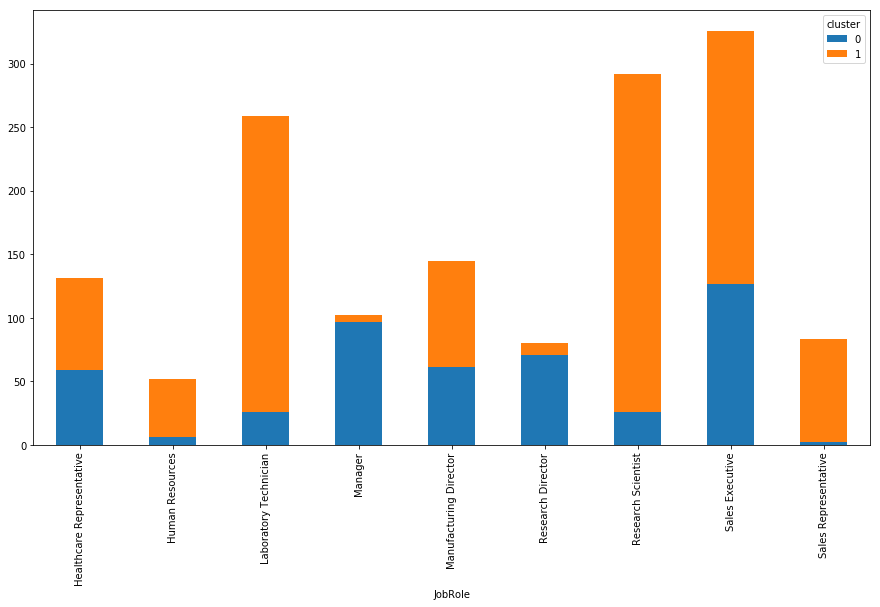

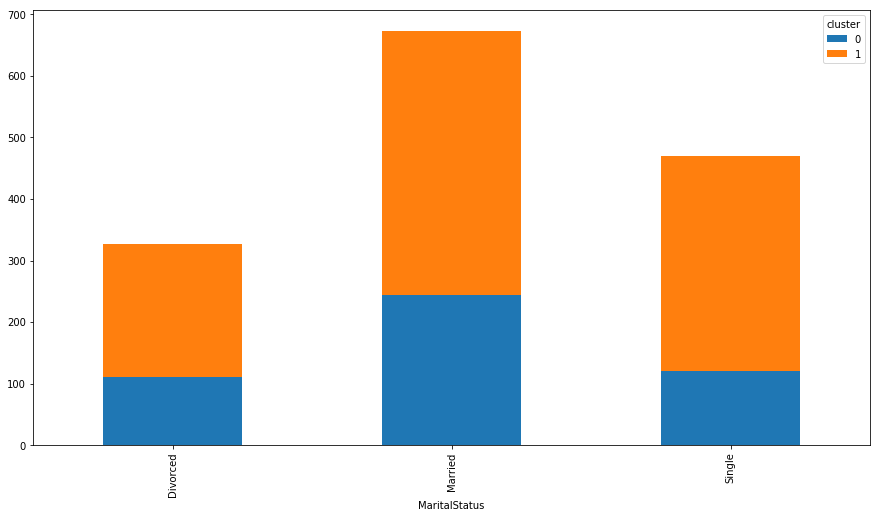

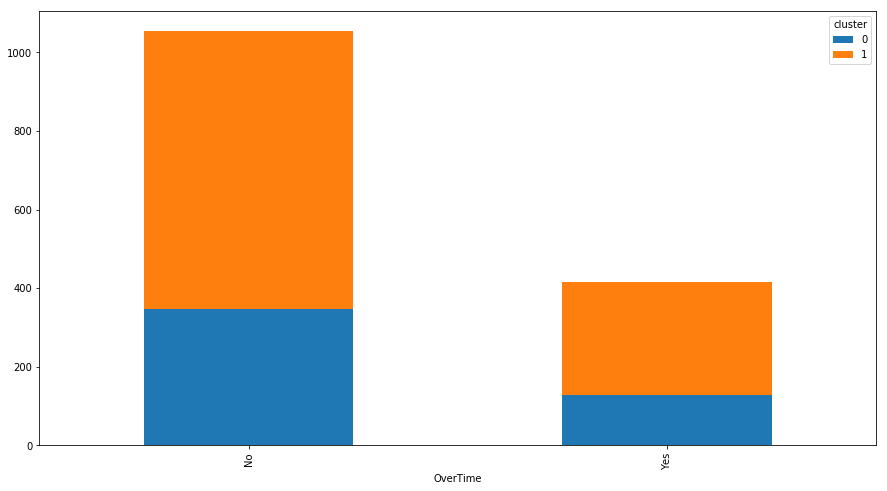

In [133]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=False)

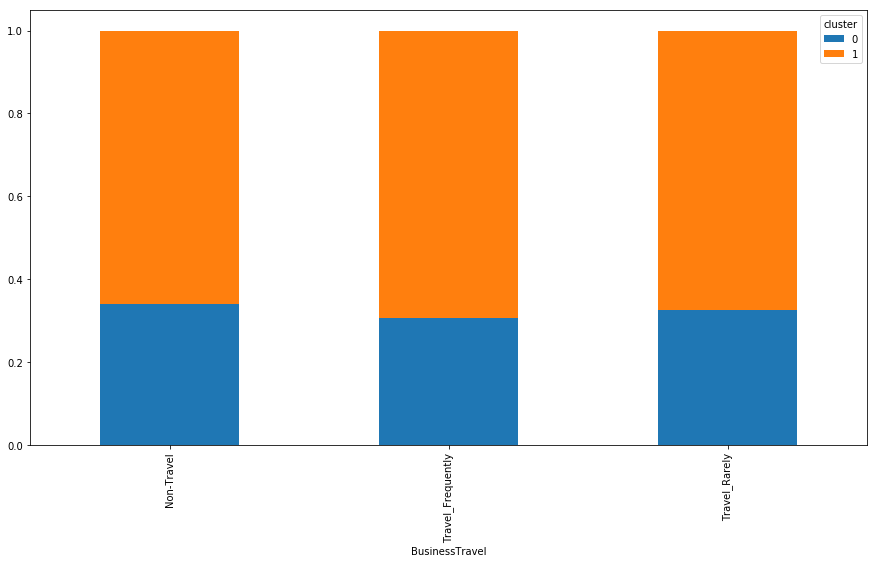

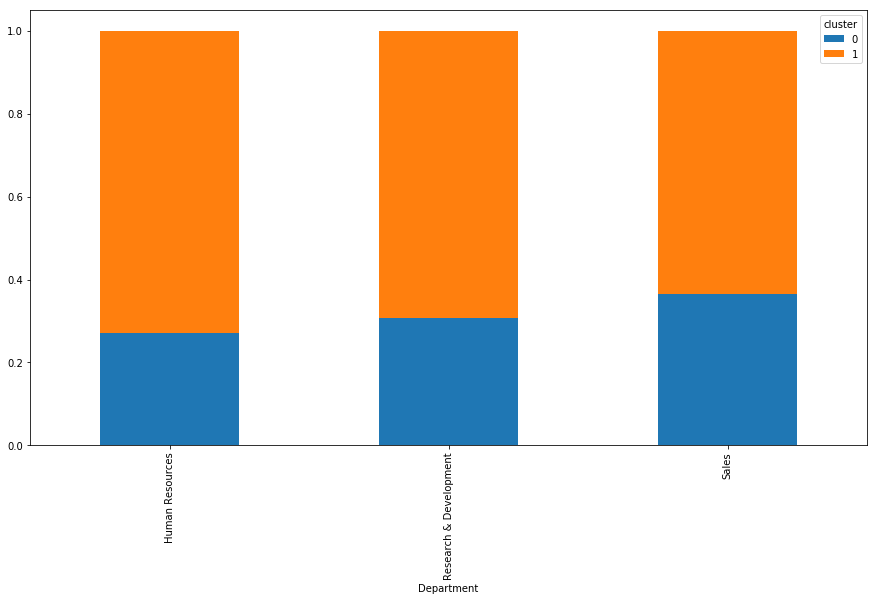

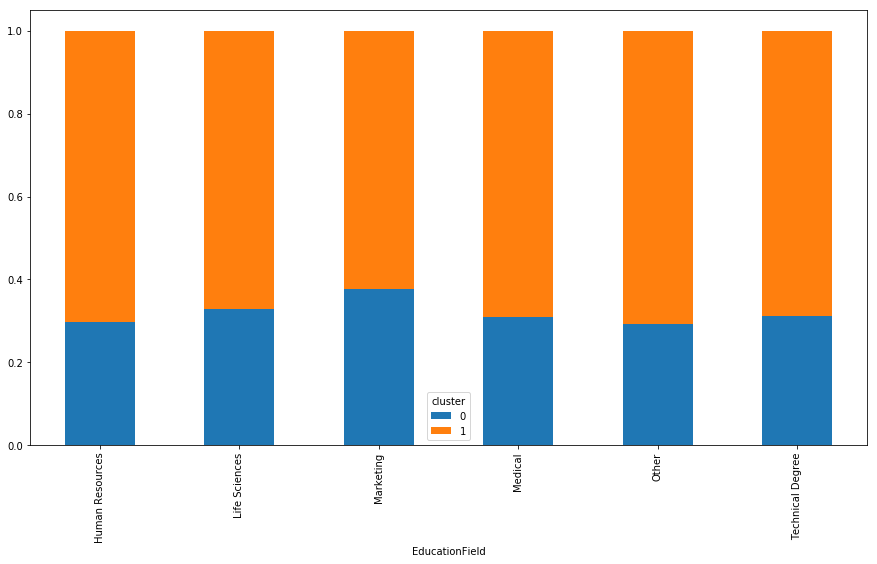

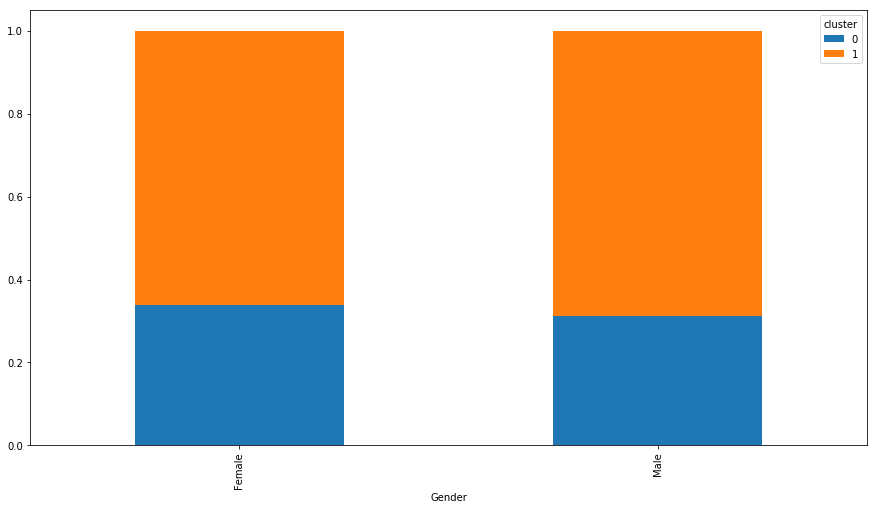

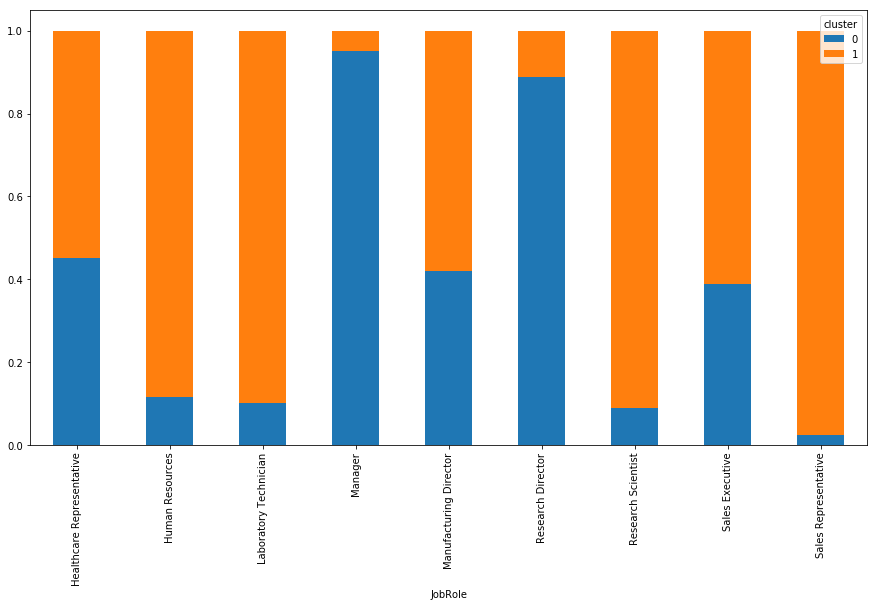

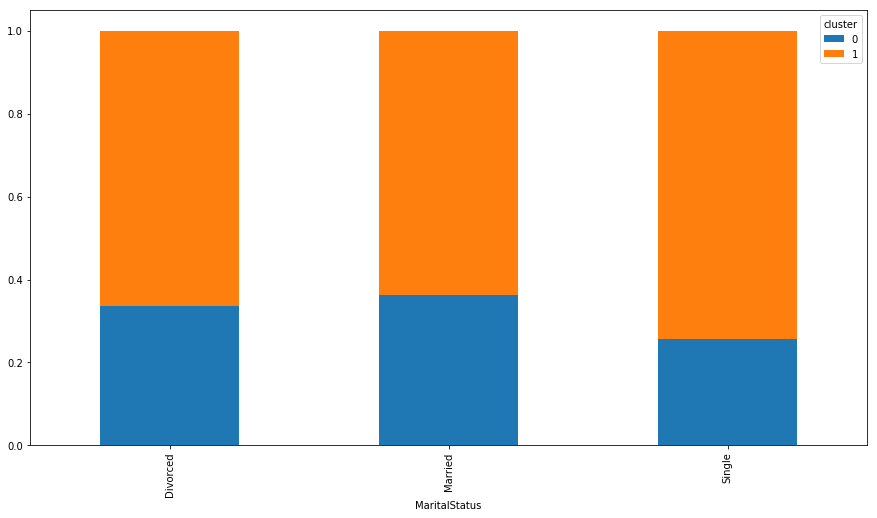

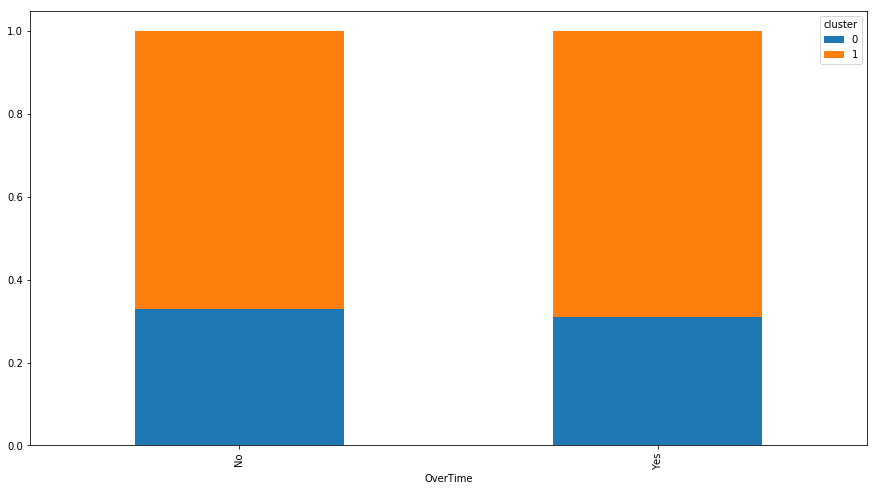

In [134]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=True)

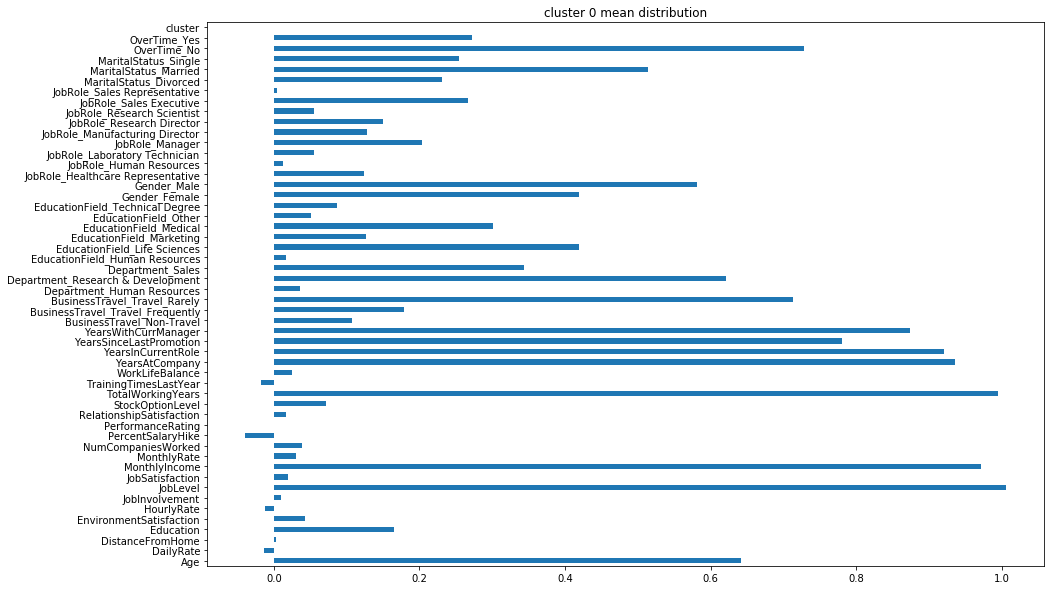

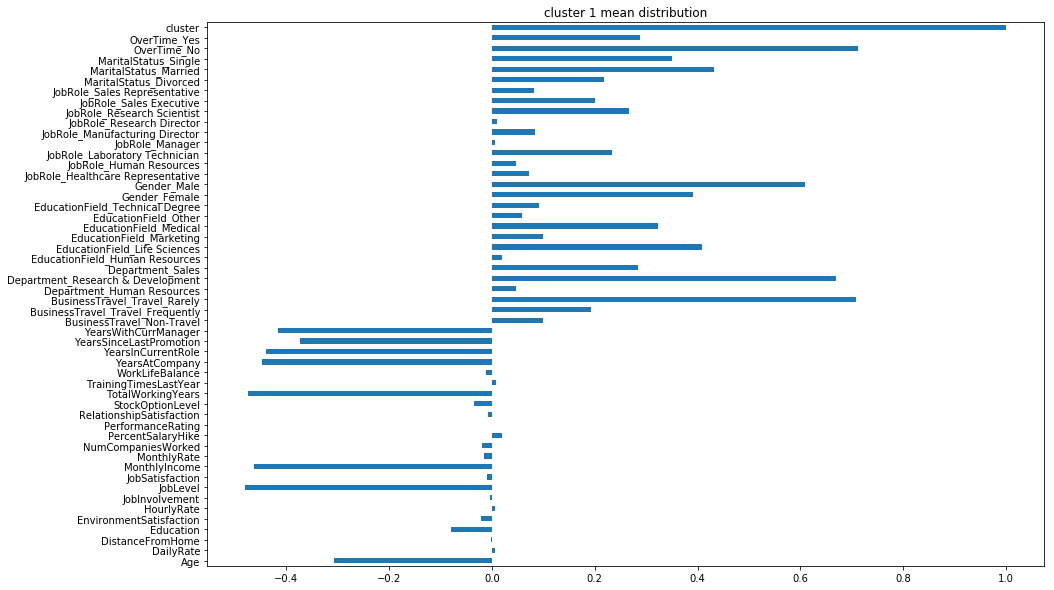

In [135]:
for cluster in range(0, 2):
    plt.figure(figsize=(15,10))
    plt.title('cluster {} mean distribution'.format(cluster))
    X_data[X_data['cluster'] == cluster].describe().T['mean'].plot(kind='barh')

- Based on the above plots, we obsereved that clustering is not based on Attrition and Not Attrition but based on certain features..
- Clustering is based on YearsWithCurrManager, YearsSinceLastPromotion, and Age etc... The data points YearsWithCurrManager, YearsSinceLastPromotion, and Age etc... are grouped into one cluster and other data points into another cluster.

###### <a> 4.3.2 DBSCAN </a>

In [136]:
db = DBSCAN(eps=5, min_samples=100)
db.fit(X_data[feature_cols])
labels = db.labels_
X_data['cluster'] = labels
print('The cluster distribution: \n{}'.format(pd.Series(labels).value_counts()))

The cluster distribution: 
 0    994
-1    476
dtype: int64


Apply PCA (dimension reduction) for visualization.

In [137]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_data_transform)
print('The two components explains {0:.2f} of variance in the data set'.format(pca.explained_variance_ratio_.sum()))
X_data_pc = pd.DataFrame(data = components, columns = ['pc_1', 'pc_2'])
X_data_pc['cluster'] = labels

The two components explains 0.21 of variance in the data set


Visualizing the clusters

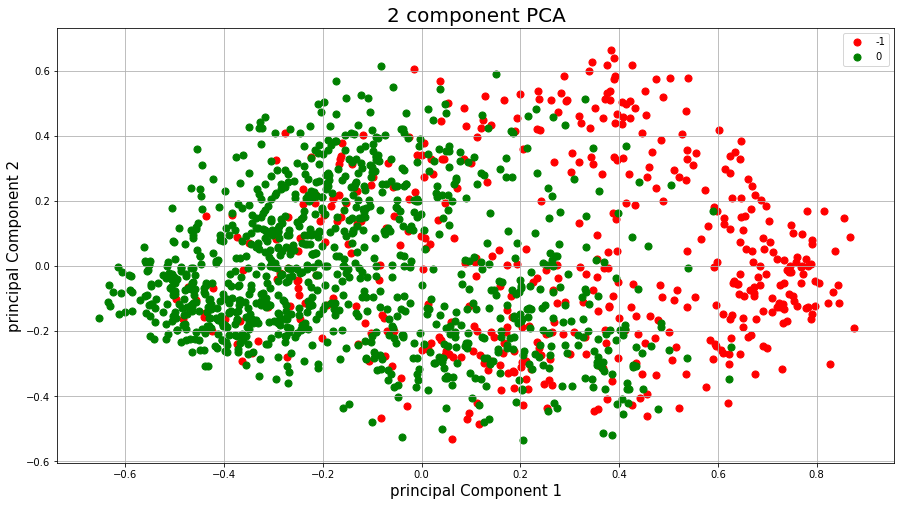

In [138]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal Component 1', fontsize = 15)
ax.set_ylabel('principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
clusters = [-1, 0]
colors = ['r', 'g']
for cluster, color in zip(clusters, colors):
    indices = X_data_pc['cluster'] == cluster
    ax.scatter(X_data_pc.loc[indices, 'pc_1'], X_data_pc.loc[indices, 'pc_2'], c=color, s=50)
ax.legend(clusters)
ax.grid()

<i> <b> Understanding k=2 clusters </b> </i>

In [139]:
X_raw = X.copy(deep=True)
X_raw['cluster'] = labels

In [140]:
cat_features = X_raw.columns[X_raw.dtypes=='object']
num_columns = X_raw.columns[(X_raw.dtypes!='bool') & (X_raw.dtypes!='object')]

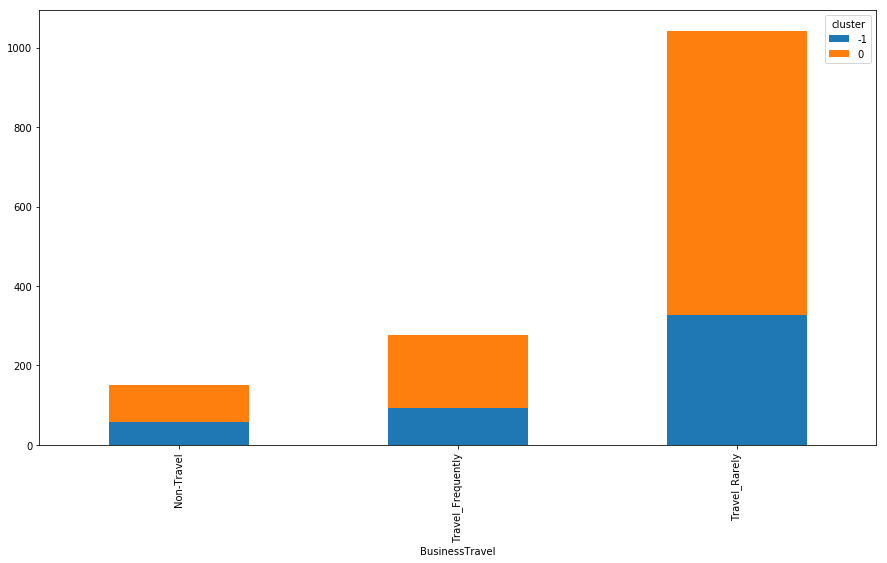

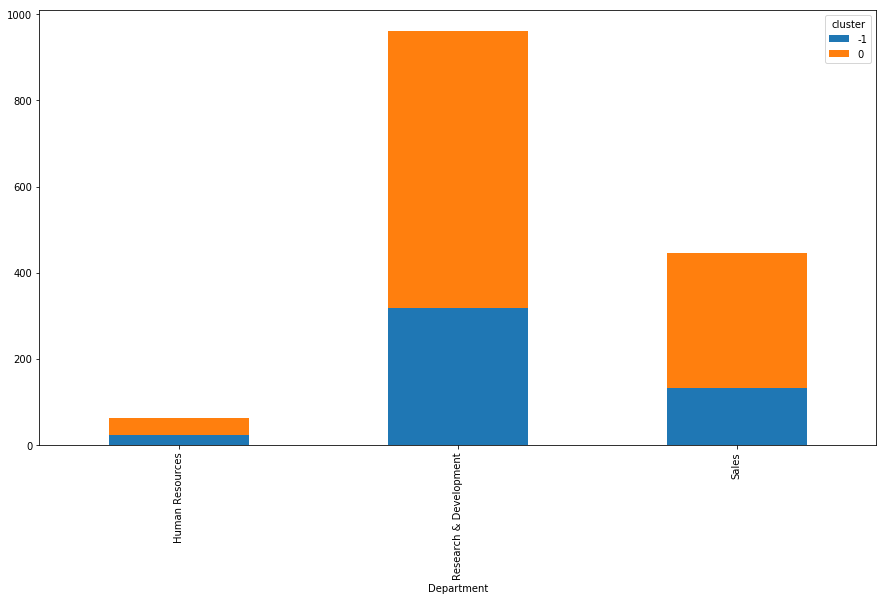

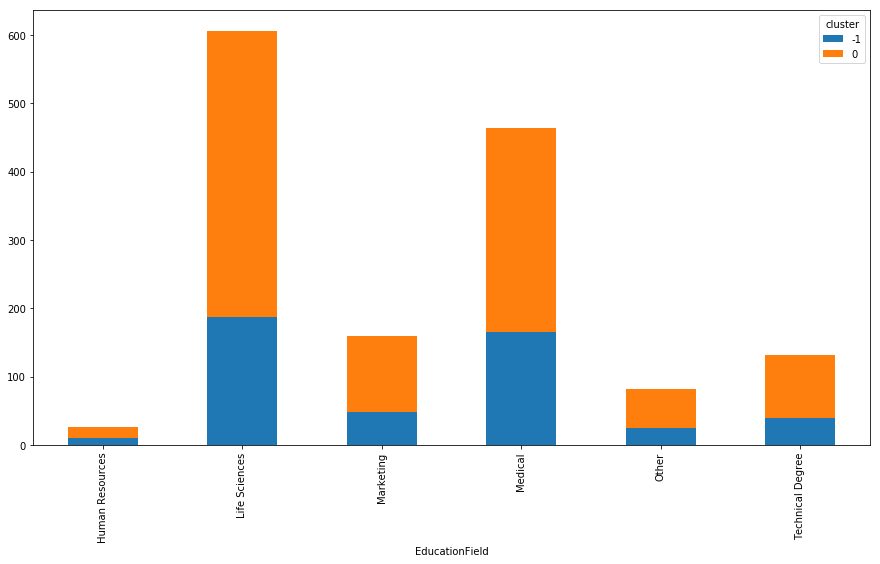

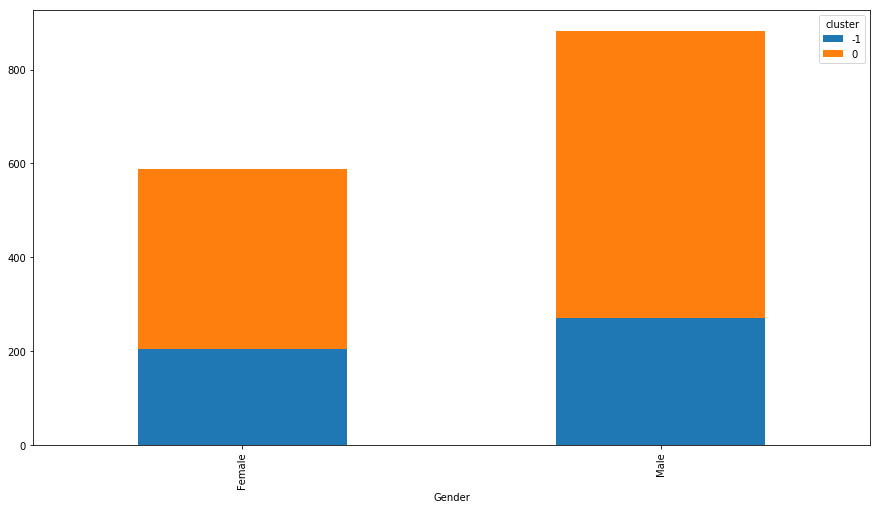

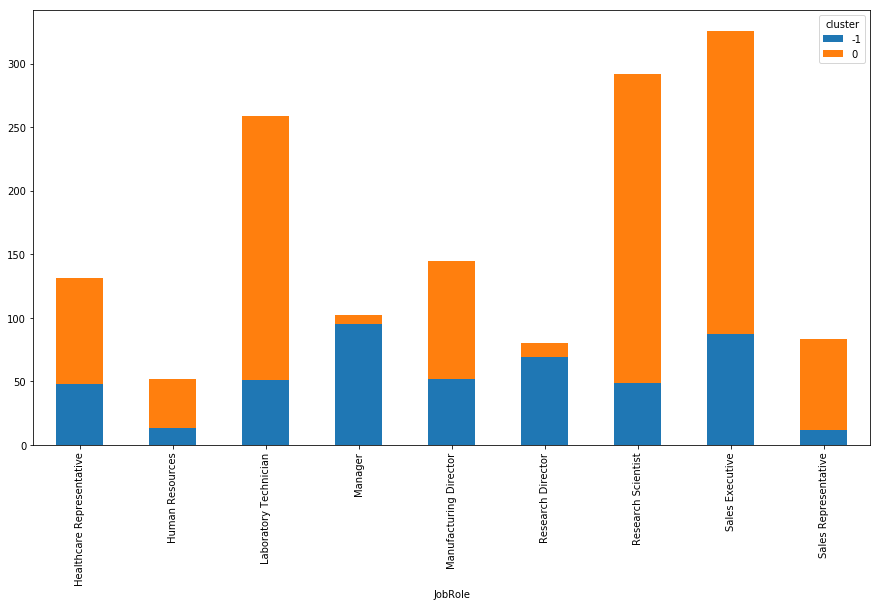

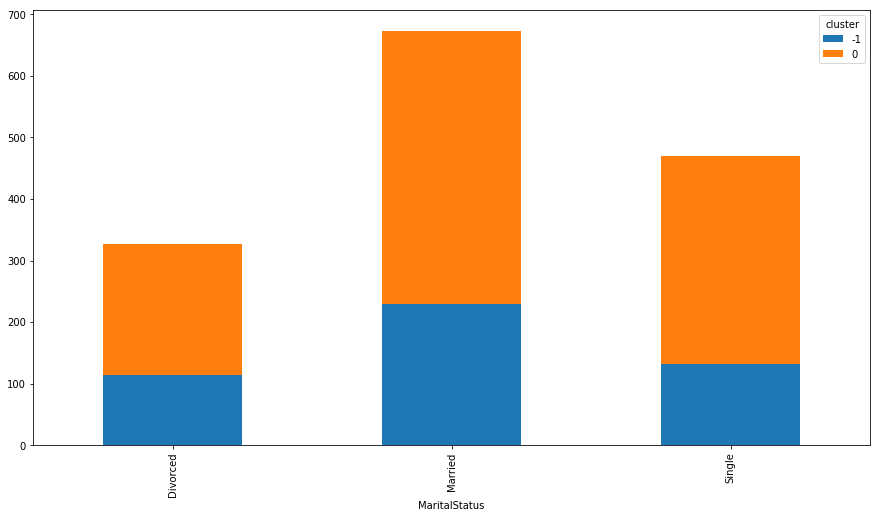

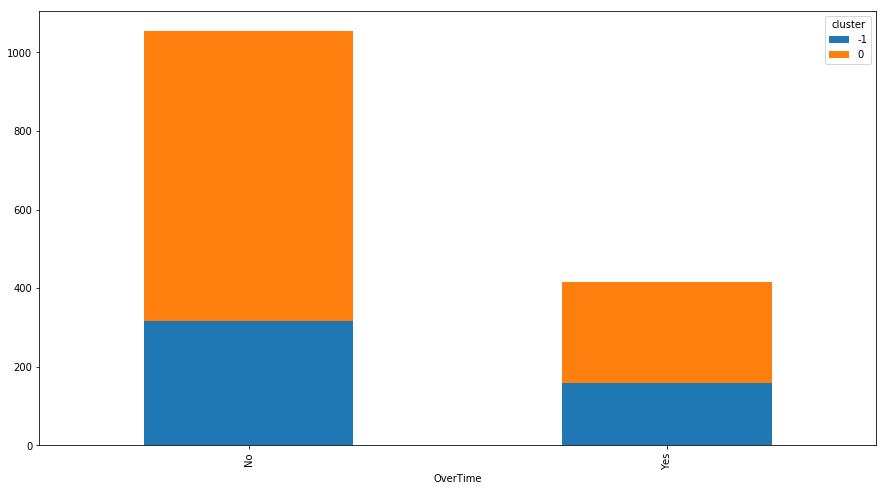

In [141]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=False)

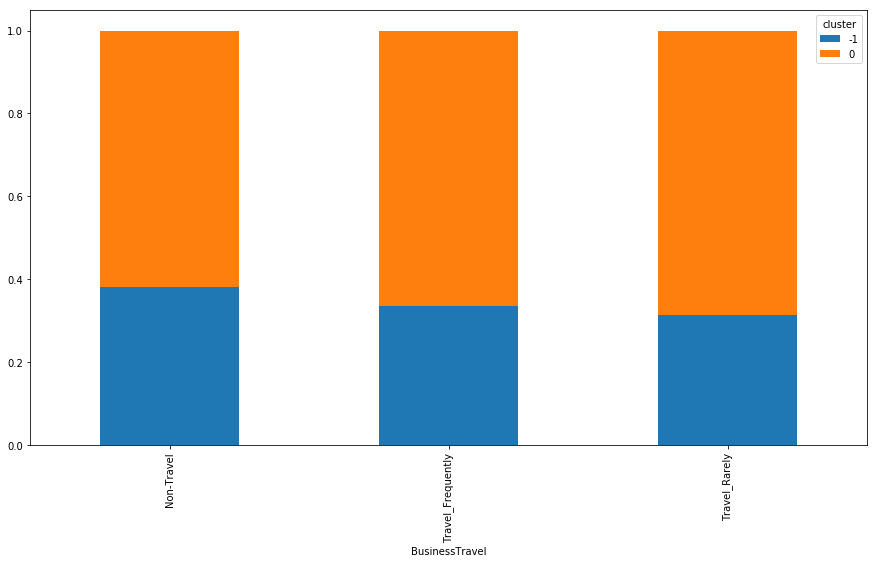

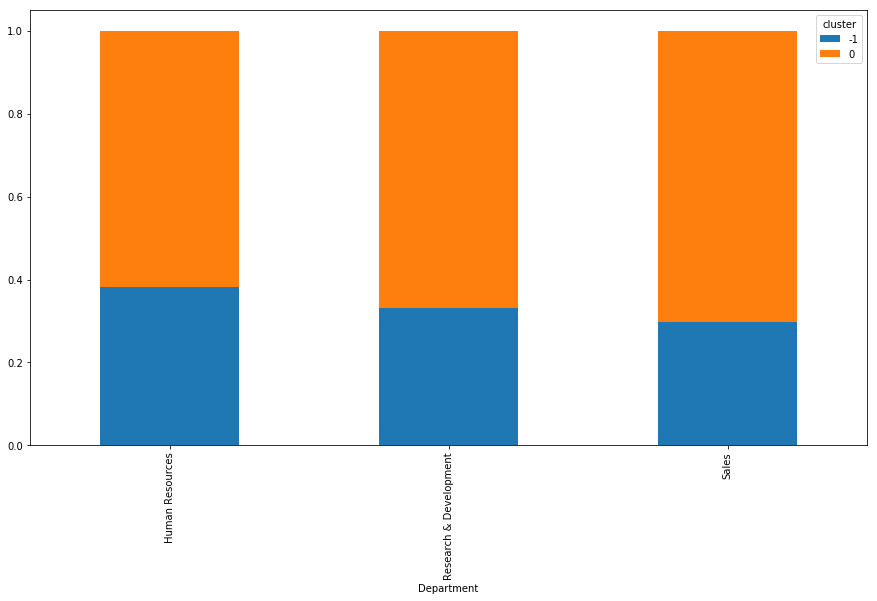

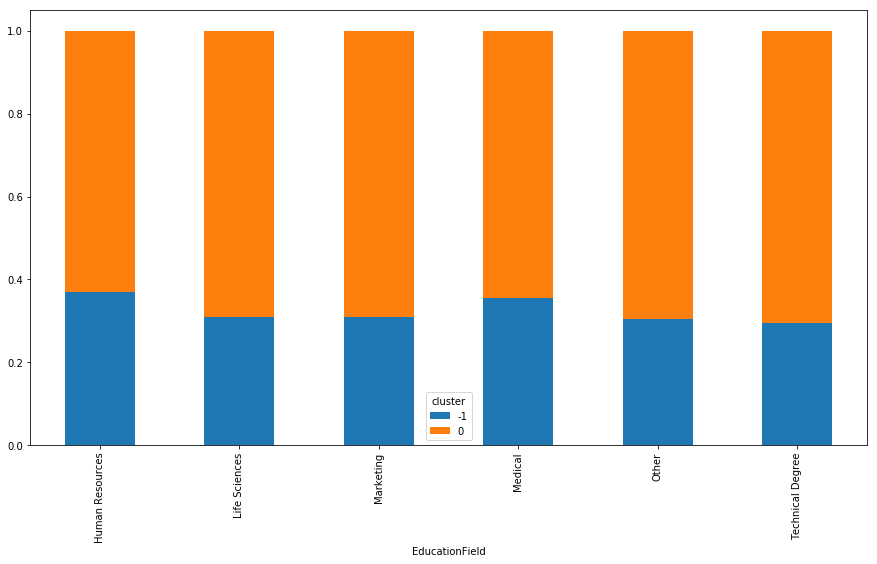

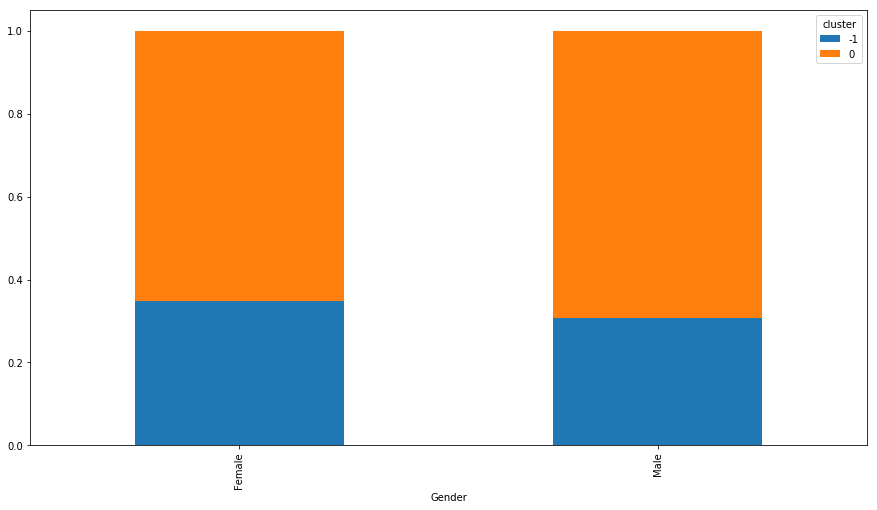

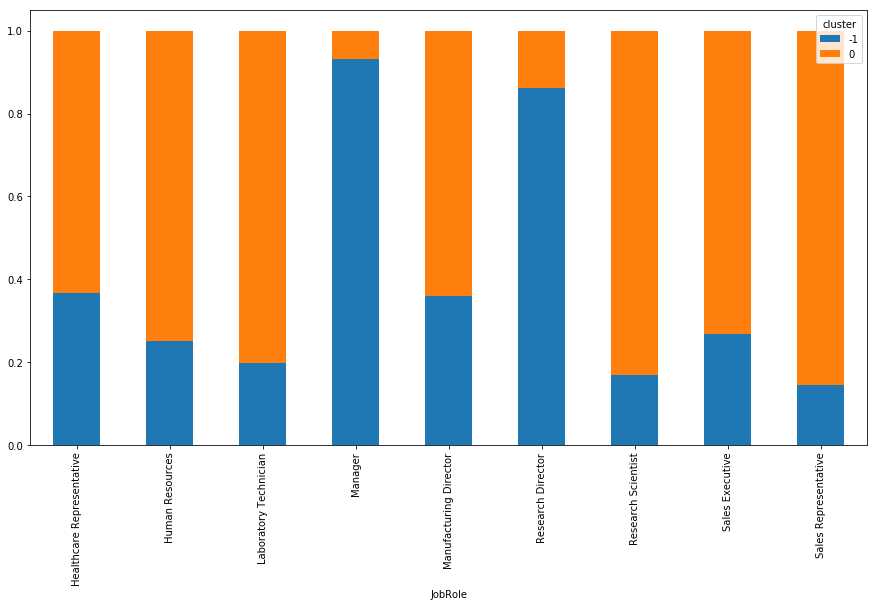

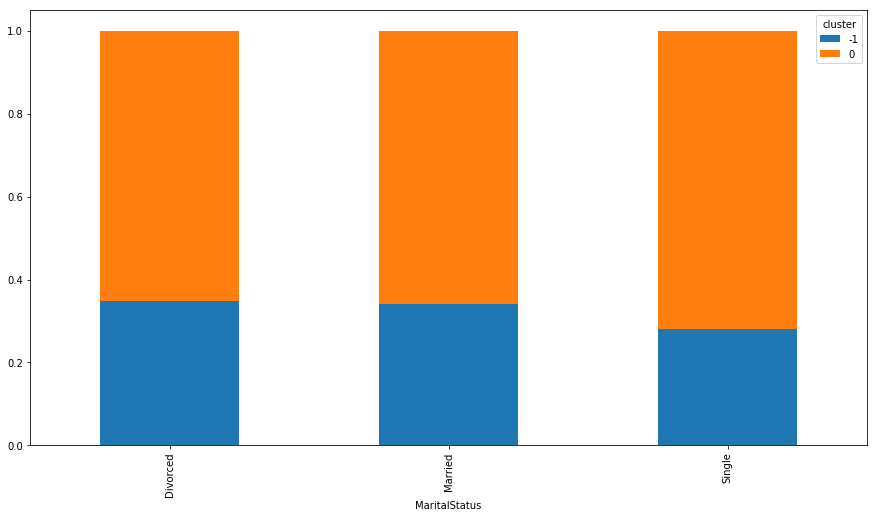

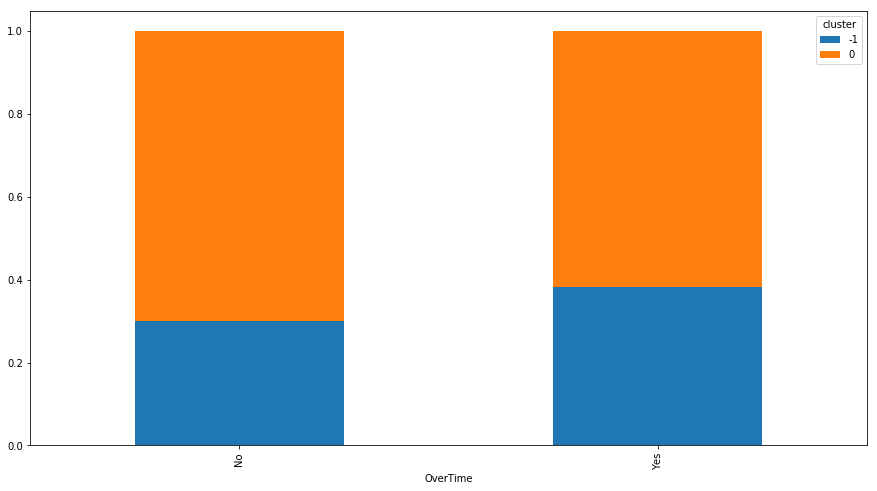

In [142]:
for column in cat_features:
    if column!='cluster':
        plot_categorical_col_vs_target(X_raw, column, 'cluster', normalized=True)

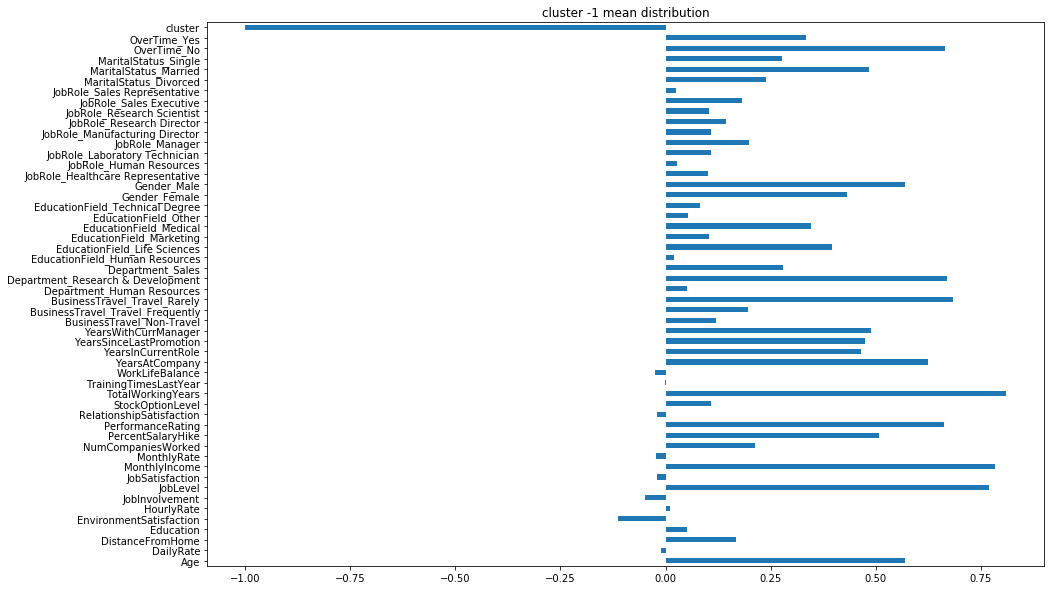

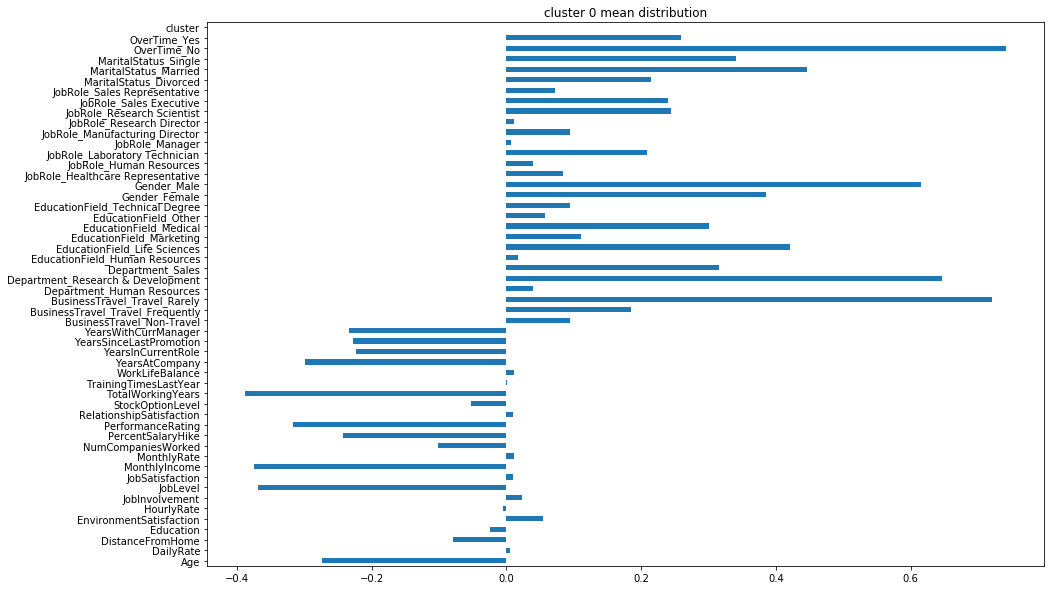

In [143]:
for cluster in [-1, 0]:
    plt.figure(figsize=(15,10))
    plt.title('cluster {} mean distribution'.format(cluster))
    X_data[X_data['cluster'] == cluster].describe().T['mean'].plot(kind='barh')

- Based on the above plots, we obsereved that clustering is not based on Attrition and Not Attrition but based on certain features, which is very to similar to the clusters derived from K-MEANS. One set of points are classified as noise in DBSCAN.
- Clustering is based on YearsWithCurrManager, YearsSinceLastPromotion, and Age etc... The data points YearsWithCurrManager, YearsSinceLastPromotion, and Age etc... are grouped into one cluster and other data points into another cluster.

#### <a> 5.Conclusion </a>

##### <a> 5.1 Binary classification </a>

We use the metric AUC (area under the curve), FNR (False Negative Rate), and FPR (False Positive Rate) to compare and evaluate different models.

| Model      | auc | FNR |FPR |
| ----------- | ----------- |-----------  |-----------  |
| Logistic Regression      | 0.64       |    0.31         |0.21         |
| LinearSVC   | 0.62        |      0.47       | 0.15       | 
| Random Forest Classifier   | 0.73        |    0.67         |0.04         |
| Logistic Regression (oversampling)   | 0.64        |   0.34          | 0.23          |
| Logistic Regression (polynomial)   | 0.66        |     0.49        |0.12        |

Based on the metrics, Logistic Regression minimizes FNR. Yet,  the model Random Forest performs good considering both auc and FPR metrics.